# The Italian Covid-19 emergency

_A brief data analysis and visualization document on the current situation in the Italian region_

REMINDER METTERE UN'IMMAGINETTA CARINA MAGARI

**Authors** 

_Roberto Ceraolo_ : robi.ceraolo@gmail.com +0039 3319999529
_Simone Giancola_ : simonegiancola09@gmail.com +0039 3314788683

We are absolutely not professionals, so any suggestion, either typo, code, writing, or analysis related is highly appreciated, and will be welcomed with enthusiasm. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Facts-in-short" data-toc-modified-id="Facts-in-short-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Facts in short</a></span></li><li><span><a href="#Purpose-and-reason-of-the-document" data-toc-modified-id="Purpose-and-reason-of-the-document-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Purpose and reason of the document</a></span></li><li><span><a href="#More-on-the-authors" data-toc-modified-id="More-on-the-authors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>More on the authors</a></span></li></ul></li><li><span><a href="#First-step:-data-exploration-and-cleaning" data-toc-modified-id="First-step:-data-exploration-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First step: data exploration and cleaning</a></span></li><li><span><a href="#Second-Step:-Analysis" data-toc-modified-id="Second-Step:-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Second Step: Analysis</a></span></li><li><span><a href="#Geographical-Plotting-attempt" data-toc-modified-id="Geographical-Plotting-attempt-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Geographical Plotting attempt</a></span></li><li><span><a href="#Approximation-attempt" data-toc-modified-id="Approximation-attempt-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Approximation attempt</a></span></li><li><span><a href="#Approximating-total_positives-al-over-the-country" data-toc-modified-id="Approximating-total_positives-al-over-the-country-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Approximating total_positives al over the country</a></span></li><li><span><a href="#Approximating-ICU-patients" data-toc-modified-id="Approximating-ICU-patients-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Approximating ICU patients</a></span></li><li><span><a href="#Recovered-and-deceased-analysis" data-toc-modified-id="Recovered-and-deceased-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Recovered and deceased analysis</a></span></li><li><span><a href="#Es-Simo---questa-roba-la-puoi-usare-o-cancellare" data-toc-modified-id="Es-Simo---questa-roba-la-puoi-usare-o-cancellare-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Es Simo - questa roba la puoi usare o cancellare</a></span></li></ul></div>

## Introduction

### Facts in short

On the 31st of december the Chinese government informed WHO authorities that they had discovered in the city of _Wuhan_ some strange _penumonia_ cases, due to a virus never seen before.

From that moment onwards, it only took one month for the virus to be found inside the Italian borders, with the first two "turist patients" in Rome. In the following months, almost unnoticed, the Sars-CoV-2 crawled slowly underneath our lives becoming in a relatively small portion of 2020 the most demanding challenge of the recent years.

A more detailed description of the timeline of the virus can be easily found at the following Wikipedia link:

 [2019-2020 Coronavirus Pandemic](https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic)

### Purpose and reason of the document

The following document is neither a statement of facts, nor an attempt to predict the future.
Any information of this kind extracted from the following pages is not a result of our purpose.
All the chapters, graphs, and text paragraphs are an attempt to gain a greater understanding of the italian situation, done by exploiting the database kindly offered by the [Italian Civil Protection](http://www.protezionecivile.gov.it/), which stores data that is shared with citizens concerning the Covid-19 emergency.

The target readers are not necessarily academics, since the concepts proposed are more citizen oriented, rather than for intellectuals. As a rule of thumb, it is an interesting read for someone who would like to stay informed, and see some graphs which are not usually showed on TV or journals, or at least not all in one. 
For this reason we also decided to add some interactive features which allow users to explore the database, and plot what they like, hoping that the server we exploit will do the work. 
In the event that the reader is currently looking at a PDF and would still enjoy some interaction with it, we suggest to click on the following link:

REMINDER, PUT BINDER LINK FOR SHARING

The whole notebook does not take into account approximation methods and error theory, we as authors are completely aware of that, and would've enjoyed not doing so. However, being Bachelor students, we decided not to risk being completely mistaken in the world of statistical estimation, which we will hopefully master at the end of our studies. 
Both of us saw this work as more of a python-oriented exercise rather than statistics-oriented. 

### More on the authors

**Roberto Ceraolo**: REMINDER PUT SOMETHING stronzo coglione e andicappato

**Simone Giancola**: REMINDER PUT SOMEHTING grande champion idol

## First step: data exploration and cleaning

**Disclaimer**: for those not interested in the coding part this chapter is (the only one) not necessary.

Judged as one of the main processes in Machine Learning and Data Analysis projects, data exploration and cleaning is for sure necessary to understand what the Civil Protection is offering in its database. The code below performs the download three datasets, each storing information on areas of the peninsula. 
In particular, the "nazione" dataset stores the cumulative statistics of Italy, the "regioni" dataset stores information related to the regions, while the "province" one has less detailed information concerning Provinces, as subareas of the regions. 

The first rows are used to import the packages that will be used across the notebook to study the data.

REMINDER: CLEAN PACKAGES AND REMOVE COMMENT ON WARNINGS

In [1]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn
%matplotlib inline
%config InlineBackend.figure_format ='retina'

######PER IGNORARE I WARNINGS#########
######da attivare a notebook finito per motivi estetici#######
#import warnings
#warnings.filterwarnings('ignore')
##############################################################


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/pcm-dpc/COVID-19"
COVID_PATH = os.path.join("datasets", "covid")
COVID_REGIONI_URL = DOWNLOAD_ROOT + "/master/dati-regioni/dpc-covid19-ita-regioni.csv"
COVID_PROVINCE_URL = DOWNLOAD_ROOT + "/master/dati-province/dpc-covid19-ita-province.csv"
COVID_NAZIONE_URL = DOWNLOAD_ROOT + "/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url_dict={'regioni.csv':COVID_REGIONI_URL,'province.csv':COVID_PROVINCE_URL,'nazione.csv':COVID_NAZIONE_URL}
def fetch_dati(url,file,path=COVID_PATH):
    os.makedirs(path, exist_ok=True)
    newpath=os.path.join(path, file)
    urllib.request.urlretrieve(url, newpath)
def load_dati(file,path=COVID_PATH):
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)

fetch_dati(COVID_REGIONI_URL,file='regioni.csv')
regions=load_dati('regioni.csv')
fetch_dati(COVID_PROVINCE_URL,file='province.csv')
provinces=load_dati('province.csv')
fetch_dati(COVID_NAZIONE_URL,file='nazione.csv')
country=load_dati('nazione.csv')

Below an overview of the datasets exported:

In [2]:
country

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0   2020-02-24T18:00:00   ITA                     101                 26   
1   2020-02-25T18:00:00   ITA                     114                 35   
2   2020-02-26T18:00:00   ITA                     128                 36   
3   2020-02-27T18:00:00   ITA                     248                 56   
4   2020-02-28T18:00:00   ITA                     345                 64   
5   2020-02-29T18:00:00   ITA                     401                105   
6   2020-03-01T18:00:00   ITA                     639                140   
7   2020-03-02T18:00:00   ITA                     742                166   
8   2020-03-03T18:00:00   ITA                    1034                229   
9   2020-03-04T18:00:00   ITA                    1346                295   
10  2020-03-05T18:00:00   ITA                    1790                351   
11  2020-03-06T18:00:00   ITA                    2394                462   
12  2020-03-07T18:00:00   ITA                    2651                567   
13  2020-03-08T18:00:00   ITA                    3557                650   
14  2020-03-09T18:00:00   ITA                    4316                733   
15  2020-03-10T18:00:00   ITA                    5038                877   
16  2020-03-11T17:00:00   ITA                    5838               1028   
17  2020-03-12T17:00:00   ITA                    6650               1153   
18  2020-03-13T17:00:00   ITA                    7426               1328   
19  2020-03-14T17:00:00   ITA                    8372               1518   
20  2020-03-15T17:00:00   ITA                    9663               1672   
21  2020-03-16T17:00:00   ITA                   11025               1851   
22  2020-03-17T17:00:00   ITA                   12894               2060   
23  2020-03-18T17:00:00   ITA                   14363               2257   
24  2020-03-19T17:00:00   ITA                   15757               2498   
25  2020-03-20T17:00:00   ITA                   16020               2655   
26  2020-03-21T17:00:00   ITA                   17708               2857   
27  2020-03-22T17:00:00   ITA                   19846               3009   
28  2020-03-23T17:00:00   ITA                   20692               3204   
29  2020-03-24T17:00:00   ITA                   21937               3396   
30  2020-03-25T17:00:00   ITA                   23112               3489   
31  2020-03-26T17:00:00   ITA                   24753               3612   
32  2020-03-27T17:00:00   ITA                   26029               3732   
33  2020-03-28T17:00:00   ITA                   26676               3856   
34  2020-03-29T17:00:00   ITA                   27386               3906   
35  2020-03-30T17:00:00   ITA                   27795               3981   
36  2020-03-31T17:00:00   ITA                   28192               4023   
37  2020-04-01T17:00:00   ITA                   28403               4035   
38  2020-04-02T17:00:00   ITA                   28540               4053   
39  2020-04-03T17:00:00   ITA                   28741               4068   
40  2020-04-04T17:00:00   ITA                   29010               3994   
41  2020-04-05T17:00:00   ITA                   28949               3977   

    totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                    127                      94              221   
1                    150                     162              311   
2                    164                     221              385   
3                    304                     284              588   
4                    409                     412              821   
5                    506                     543             1049   
6                    779                     798             1577   
7                    908                     927             1835   
8                   1263                    1000             2263   
9                   1641                    1065            

In [3]:
regions

data stato  codice_regione denominazione_regione  \
0    2020-02-24T18:00:00   ITA              13               Abruzzo   
1    2020-02-24T18:00:00   ITA              17            Basilicata   
2    2020-02-24T18:00:00   ITA               4          P.A. Bolzano   
3    2020-02-24T18:00:00   ITA              18              Calabria   
4    2020-02-24T18:00:00   ITA              15              Campania   
..                   ...   ...             ...                   ...   
877  2020-04-05T17:00:00   ITA               9               Toscana   
878  2020-04-05T17:00:00   ITA               4           P.A. Trento   
879  2020-04-05T17:00:00   ITA              10                Umbria   
880  2020-04-05T17:00:00   ITA               2         Valle d'Aosta   
881  2020-04-05T17:00:00   ITA               5                Veneto   

           lat       long  ricoverati_con_sintomi  terapia_intensiva  \
0    42.351222  13.398438                       0                  0   
1    40.639471  15.805148                       0                  0   
2    46.499335  11.356624                       0                  0   
3    38.905976  16.594402                       0                  0   
4    40.839566  14.250850                       0                  0   
..         ...        ...                     ...                ...   
877  43.769231  11.255889                    1111                276   
878  46.068935  11.121231                     352                 80   
879  43.106758  12.388247                     159                 45   
880  45.737503   7.320149                      96                 23   
881  45.434905  12.338452                    1674                329   

     totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                       0                       0                0   
1                       0                       0                0   
2                       0                       0                0   
3                       0                       0                0   
4                       0                       0                0   
..                    ...                     ...              ...   
877                  1387                    3798             5185   
878                   432                    1363             1795   
879                   204                     694              898   
880                   119                     457              576   
881                  2003                    7406             9409   

     variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
0                             0               0                0         0   
1                             0               0                0         0   
2                             0               0                0         0   
3                             0               0                0         0   
4                             0               0                0         0   
..                          ...             ...              ...       ...   
877                         131             176              337       325   
878                          42              65              273       217   
879                         -29              29              298        43   
880                          16              34              115        91   
881                         316             402             1186       631   

     totale_casi  tamponi note_it note_en  
0              0        5     NaN     NaN  
1              0        0     NaN     NaN  
2              0        1     NaN     NaN  
3              0        1     NaN     NaN  
4              0       10     NaN     NaN  
..           ...      ...     ...     ...  
877         5847    51006     NaN     NaN  
878         2285    10476     NaN     NaN  
879         1239    12448     NaN     NaN  
880          782     2390     NaN     NaN  
881        11226   140910   

In [4]:
provinces

data stato  codice_regione denominazione_regione  \
0     2020-02-24T18:00:00   ITA              13               Abruzzo   
1     2020-02-24T18:00:00   ITA              13               Abruzzo   
2     2020-02-24T18:00:00   ITA              13               Abruzzo   
3     2020-02-24T18:00:00   ITA              13               Abruzzo   
4     2020-02-24T18:00:00   ITA              13               Abruzzo   
...                   ...   ...             ...                   ...   
5371  2020-04-05T17:00:00   ITA               5                Veneto   
5372  2020-04-05T17:00:00   ITA               5                Veneto   
5373  2020-04-05T17:00:00   ITA               5                Veneto   
5374  2020-04-05T17:00:00   ITA               5                Veneto   
5375  2020-04-05T17:00:00   ITA               5                Veneto   

      codice_provincia               denominazione_provincia sigla_provincia  \
0                   69                                Chieti              CH   
1                   66                              L'Aquila              AQ   
2                   68                               Pescara              PE   
3                   67                                Teramo              TE   
4                  979  In fase di definizione/aggiornamento             NaN   
...                ...                                   ...             ...   
5371                26                               Treviso              TV   
5372                27                               Venezia              VE   
5373                23                                Verona              VR   
5374                24                               Vicenza              VI   
5375               999  In fase di definizione/aggiornamento             NaN   

            lat       long  totale_casi note_it note_en  
0     42.351032  14.167546            0     NaN     NaN  
1     42.351222  13.398438            0     NaN     NaN  
2     42.464584  14.213648            0     NaN     NaN  
3     42.658918  13.704400            0     NaN     NaN  
4      0.000000   0.000000            0     NaN     NaN  
...         ...        ...          ...     ...     ...  
5371  45.667546  12.245074         1712     NaN     NaN  
5372  45.434905  12.338452         1425     NaN     NaN  
5373  45.438390  10.993527         2688     NaN     NaN  
5374  45.547497  11.545971         1647     NaN     NaN  
5375   0.000000   0.000000          286     NaN     NaN  

[5376 rows x 12 columns]

As always, for the purposes of the document not all the variables are needed, so to carry on our analysis it is easier to remove some of them, adjust the day variable, and translate everything in English.

Here the "data" (day in English feature) is modified and then translated

In [5]:
#regions
day=regions.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
    #Per estrarre mese e giorno prendiamo i caratteri dal 5 al 9 inclusi della feature "data"
regions.insert(0,column='day', value=day)

#provinces
day=provinces.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
provinces.insert(0,column='day', value=day)

#country
day=country.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
country.insert(0,column='day', value=day)

Some features are useless and are here dropped out of the tables

In [6]:
regions=regions.drop(['data','stato', 'codice_regione', 'note_it', 'note_en'],axis=1, errors="ignore")
provinces=provinces.drop(['data','stato','codice_regione', 'codice_provincia', 'note_it', 'note_en'],axis=1, errors="ignore")
country=country.drop(['data','stato', 'note_it', 'note_en'],axis=1, errors="ignore")

Since the datasets' columns are in Italian, we decided to translate them, and to create a legend dataframe, which stores explanations, both in Italian and English, of each variable. 

In [7]:
eng_nation=['day','hospitalized_symptoms','ICU','total_hospitalized','home_isolation','total_positive',
                 'variation_total_positive','new_positive','recovered','deceased','total_cases','tests']
eng_prov=['day','region','province','initials','lat','long','total_cases']
eng_reg=['day','region','lat','long','hospitalized_symptoms','ICU','total_hospitalized','home_isolation',
         'total_positive','variation_total_positive','new_positive','recovered','deceased','total_cases','tests']

#trans_dic={'Italian':}
it=list(regions.columns)
it.append('provincia')
eng=eng_reg+['province']
itex=['giorno di registrazione del dato','regione della rilevazione','latitudine','longitudine',
      'pazienti ricoverati in ospedale con sintomi','pazienti in terapia intensiva','totale dei pazienti ricoverati',
      'pazienti in isolamento domiciliare','totale dei positivi',
      'variazione del totale dei positivi rispetto alla rilevazione precedente','nuovi positivi effettivi',
      'negativi almeno due volte al virus, e quindi legalmente guariti','deceduti e positivi al virus','totale dei casi',
     'totale dei tamponi effettuati','provincia della rilevazione']
engex=['day in which data was gathered','region of interest','latitude','longitude','patients hospitalised with symptoms',
      'patients in the Intensive Care Unit','total number of patients hospitalised','patients isolated at home',
       'total number of positive cases','variation of the total number of positive cases with respect to the last time it was recorded',
      'actual number of new positive cases','patients which due to having tested negative twice have "legally" recovered',
      'patients which at the time of their death were virus positive','total number of cases','total number of tests',
        'province of interest']
data={'Variabile':it,'Note':itex,'Variable':eng,'Notes':engex}
legend=pd.DataFrame(data)

######ATTENZIONE##########
#DA QUESTA CELLA IN POI è TUTTO IN INGLESE#
regions.columns=eng_reg
country.columns=eng_nation
provinces.columns=eng_prov

Below a brief explanation of the variables stored in English.

In [8]:
for i in range(len(eng)):
    print(eng[i],':',engex[i],'\n')

day : day in which data was gathered 

region : region of interest 

lat : latitude 

long : longitude 

hospitalized_symptoms : patients hospitalised with symptoms 

ICU : patients in the Intensive Care Unit 

total_hospitalized : total number of patients hospitalised 

home_isolation : patients isolated at home 

total_positive : total number of positive cases 

variation_total_positive : variation of the total number of positive cases with respect to the last time it was recorded 

new_positive : actual number of new positive cases 

recovered : patients which due to having tested negative twice have "legally" recovered 

deceased : patients which at the time of their death were virus positive 

total_cases : total number of cases 

tests : total number of tests 

province : province of interest 



While in the next cell we print the Italian legend for those interested. 

In [9]:
for i in range(len(it)):
    print(it[i],':',itex[i],'\n')

day : giorno di registrazione del dato 

denominazione_regione : regione della rilevazione 

lat : latitudine 

long : longitudine 

ricoverati_con_sintomi : pazienti ricoverati in ospedale con sintomi 

terapia_intensiva : pazienti in terapia intensiva 

totale_ospedalizzati : totale dei pazienti ricoverati 

isolamento_domiciliare : pazienti in isolamento domiciliare 

totale_positivi : totale dei positivi 

variazione_totale_positivi : variazione del totale dei positivi rispetto alla rilevazione precedente 

nuovi_positivi : nuovi positivi effettivi 

dimessi_guariti : negativi almeno due volte al virus, e quindi legalmente guariti 

deceduti : deceduti e positivi al virus 

totale_casi : totale dei casi 

tamponi : totale dei tamponi effettuati 

provincia : provincia della rilevazione 



now we will shorten the dataframe so that we store in another dataframe the longitude and latitude coordinates which do not change at all

In [10]:
#QUESTA CELLA LA ELIMINEREI
'''
def combine_to_datfr(df,row,col,upto):
    ind=[row[i] for i in range(upto)]
    dt=[]
    for i in range(upto):
        d=[]
        for feat in col:
            el=df.at[i,feat]
            d.append(el)
        dt.append(d)
    ret=pd.DataFrame(data=dt,index=ind,columns=col)
    return ret
def create_geo_loc(df):
    geo_loc=regions.region.copy()
    geo_loc=pd.DataFrame(data=geo_loc)
    geo_loc["lat"]=regions.lat.copy()
    geo_loc["long"]=regions.long.copy()
    num=len(geo_loc)-21
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc


def create_geo_loc_2(df):
    if "provinces" in df.columns:
        denom="provinces"
        cont=80
    else:
        denom="region"
        cont=21
    geo_loc=pd.DataFrame(data=df,columns=[denom, "lat", "long"])
    #geo_loc.drop(geo_loc.loc[geo_loc['lat'] == 0])
    num=len(geo_loc)-cont
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc

#TODO: Sceglierne una (io voto per create_geo_loc_2  :) )


new=combine_to_datfr(regions,regions.region,['lat','long'],21)
#new=combine_to_datfr(provinces,provinces.province,['lat','long'],80)
#Anche qua provinces ha qualche problema, suppongo per problema intrinseco al dataset

#nemmeno il mio funziona con le provinces al momento

new=create_geo_loc_2(provinces)

#new

'''


'\ndef combine_to_datfr(df,row,col,upto):\n    ind=[row[i] for i in range(upto)]\n    dt=[]\n    for i in range(upto):\n        d=[]\n        for feat in col:\n            el=df.at[i,feat]\n            d.append(el)\n        dt.append(d)\n    ret=pd.DataFrame(data=dt,index=ind,columns=col)\n    return ret\ndef create_geo_loc(df):\n    geo_loc=regions.region.copy()\n    geo_loc=pd.DataFrame(data=geo_loc)\n    geo_loc["lat"]=regions.lat.copy()\n    geo_loc["long"]=regions.long.copy()\n    num=len(geo_loc)-21\n    geo_loc.drop(geo_loc.tail(num).index,inplace=True)\n    return geo_loc\n\n\ndef create_geo_loc_2(df):\n    if "provinces" in df.columns:\n        denom="provinces"\n        cont=80\n    else:\n        denom="region"\n        cont=21\n    geo_loc=pd.DataFrame(data=df,columns=[denom, "lat", "long"])\n    #geo_loc.drop(geo_loc.loc[geo_loc[\'lat\'] == 0])\n    num=len(geo_loc)-cont\n    geo_loc.drop(geo_loc.tail(num).index,inplace=True)\n    return geo_loc\n\n#TODO: Sceglierne una (i

After some manipulation our dataframes are ready to be analyzed in the next chapter.

## Second Step: Analysis

as we can see, we have each day a number of measurements for 21 regions (numbered from 1 to 20)

we can simply extract the number of observations of the civil protection by dividing the shape of the dataframe by 21

In [11]:
#the following is a function to extract data from a single instance, as day, region, provinces or anything else
def get_instance(dataset,instance,some,avoid=None):
    #unclear the "Avoid" part
    dt=dataset.copy()
    new=dt.loc[dt[instance]==some]
    if avoid!=None:
        if not isinstance(avoid,list):
            avoid=list(avoid)
        new.drop(avoid,axis=1,inplace=True)
    new=new.reset_index(drop=True)
    return new

#the following is a function to extract a single regione
def get_region(name, df=regions):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['region'] == name]
    dati_regione.drop(["region", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to extract data about a single day
def get_day(df, day):
    return df.loc[df['day'] == day]

#the following is a function to extract a single provinces
def get_province(name, df=provinces): 
    df_copy=df.copy()
    dati_provincia = df_copy.loc[df_copy['province'] == name]
    dati_provincia.drop(["region", "lat", "long", "province", "initials"], axis=1, inplace=True)
    dati_provincia=dati_provincia.reset_index(drop=True)
    return dati_provincia

#the following is a function to get the whole region data for each provinces
def get_region_by_provinces(name,df=provinces):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['region'] == name]
    dati_regione.drop(["region", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to get the list of provinces of a region
def get_provinces_list(reg,df=provinces):
    a=get_region_by_provinces(reg,df=provinces)
    return a.provinces.unique()


get_instance(regions,"region","Toscana").tail()




day   region        lat       long  hospitalized_symptoms  ICU  \
37  04-01  Toscana  43.769231  11.255889                   1120  297   
38  04-02  Toscana  43.769231  11.255889                   1135  295   
39  04-03  Toscana  43.769231  11.255889                   1149  288   
40  04-04  Toscana  43.769231  11.255889                   1129  286   
41  04-05  Toscana  43.769231  11.255889                   1111  276   

    total_hospitalized  home_isolation  total_positive  \
37                1417            3015            4432   
38                1430            3359            4789   
39                1437            3472            4909   
40                1415            3639            5054   
41                1387            3798            5185   

    variation_total_positive  new_positive  recovered  deceased  total_cases  \
37                       206           259        182       253         4867   
38                       357           406        216       268         5273   
39                       120           226        300       290         5499   
40                       145           172        310       307         5671   
41                       131           176        337       325         5847   

    tests  
37  36575  
38  40724  
39  44460  
40  47886  
41  51006

In the next cell we find some function which may later become useful

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


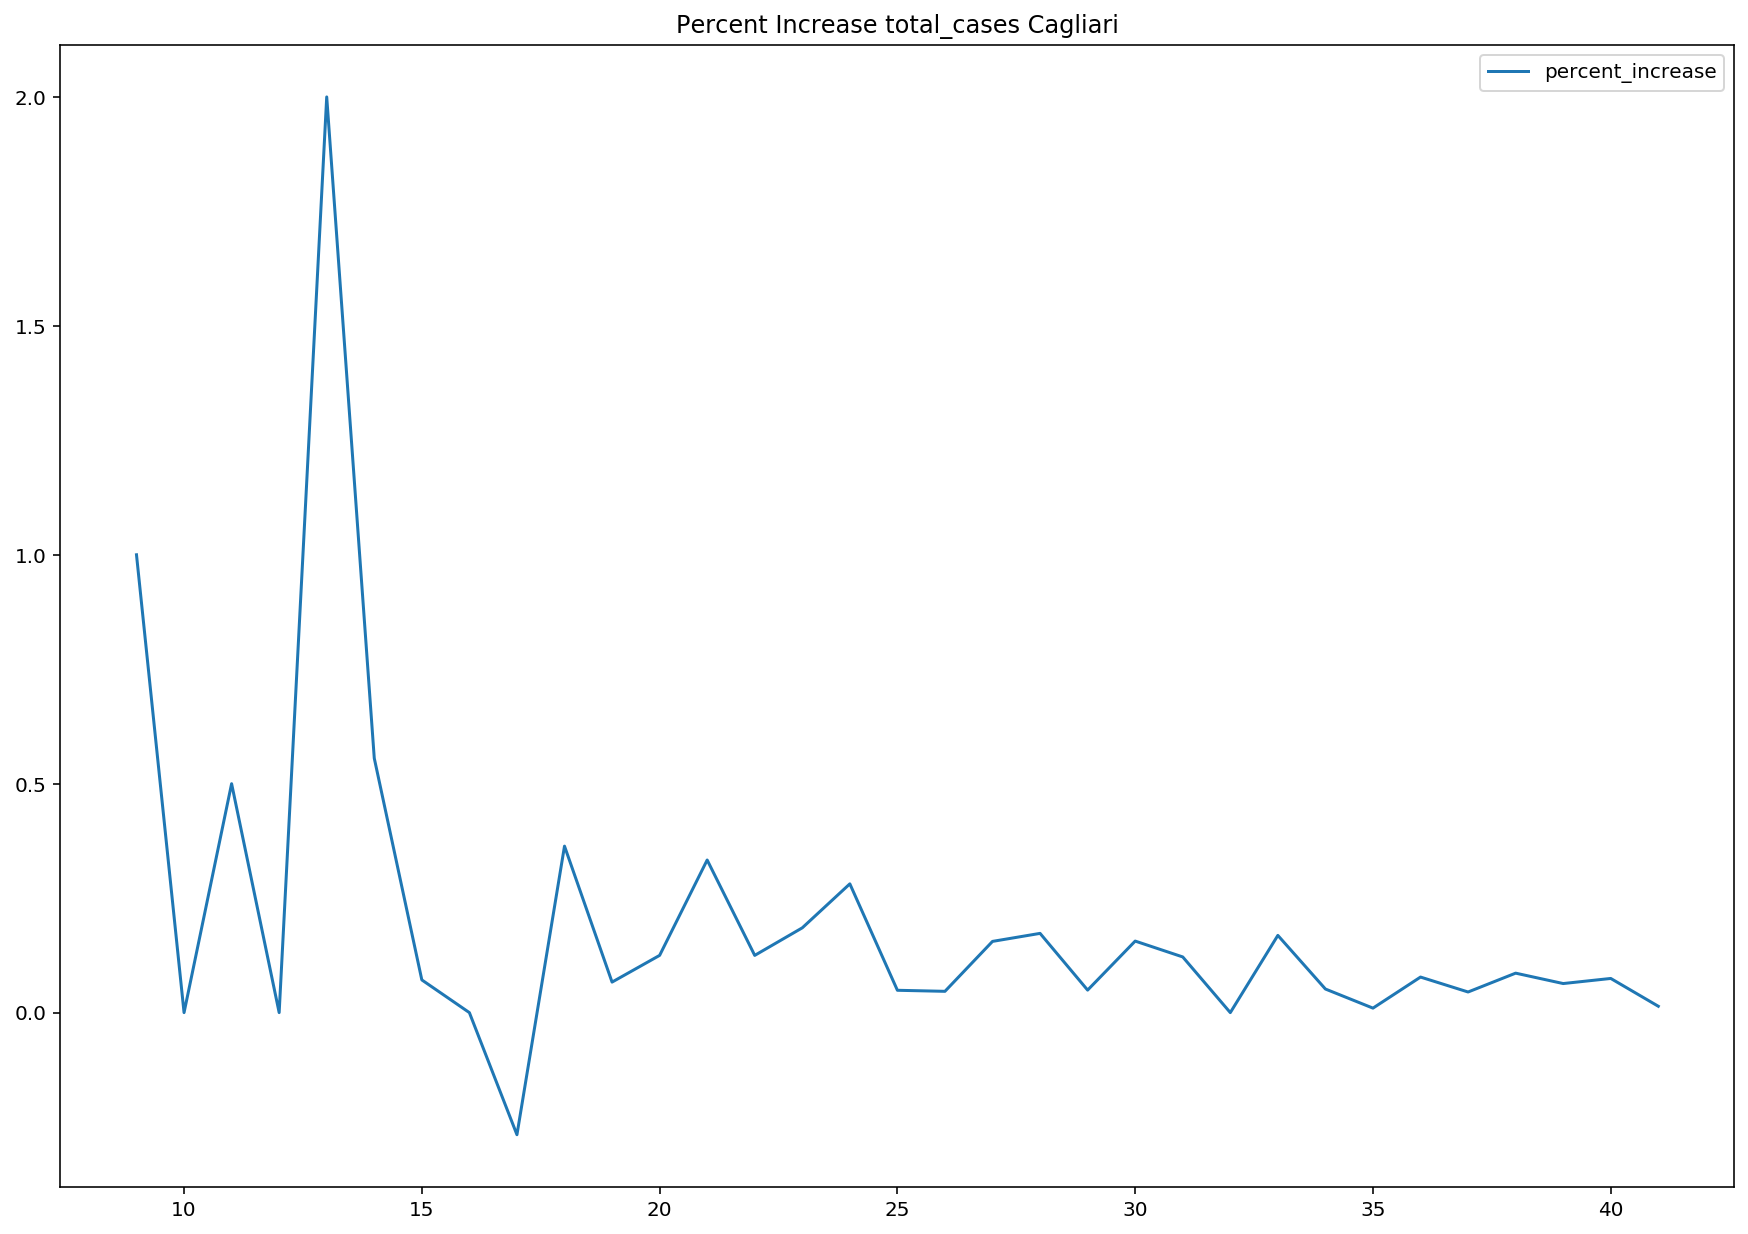

In [12]:
#def compute_perc_increase(df,feature):
#    feat = df[feature].copy()
#    feat=feat.pct_change()
#    increase=pd.DataFrame(data=feat, index=df.index)
#    increase.set_axis(['percent_increase'], axis=1, inplace=True)
#    if not increase.columns.any=='day':
#        increase.insert(0,column='day',value=df['day']) #->non è generale, in alcuni casi day c'è già, quindi dà errore
#    increase.fillna(0,inplace=True)
#    return increase


def compute_increase(df,feature):
    feat = df[feature].copy()
    feat=np.array(feat)
    incr=feat.copy()
    incr[1:]=feat[1:]-feat[:-1]
    increase=pd.DataFrame(data=incr, index=df.index)
    increase.set_axis(['increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    return increase



def compute_perc_increase(df_name,feature, where=None):
    if df_name=="provinces":
        df=get_province(where)
    elif df_name=="regions":
        df=get_region(where)
    else:
        df=country
    increase=pd.DataFrame(data=df[feature].pct_change(), index=df.index)
    increase.set_axis(['percent_increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    increase.fillna(0,inplace=True)
    if not np.isfinite(increase['percent_increase']).all():
        aux=increase.loc[increase['percent_increase'] == np.inf]
        to_del=np.arange(aux.iloc[0].name+1)
        increase.drop(to_del, inplace=True)
    #increase.set_index("day", inplace=True)
    inds_X=np.arange(len(increase))[::2]
    return increase, inds_X

df="provinces"
feature="total_cases"
where="Cagliari"
inds_X=np.arange(len(df))

increase, inds_X=compute_perc_increase(df,feature, where)
increase.plot(figsize=(15,10.5), title="Percent Increase " + feature + " " + where)

Below there are the plots of two insightful indexes.
The first one is the percentage ratio between the number of new infected people each day in the whole Nation over the total number of people with the virus in that moment. It gives a grasp on the size of the new inffections per fday with respect to the total positives.

The second one is the percentage ratio between the number of patients in intensive care ovre the total bumber of positives. It gives a grasp on how many of the positive people have the need to go to the intensive care unit with respect to the total number of total positives.

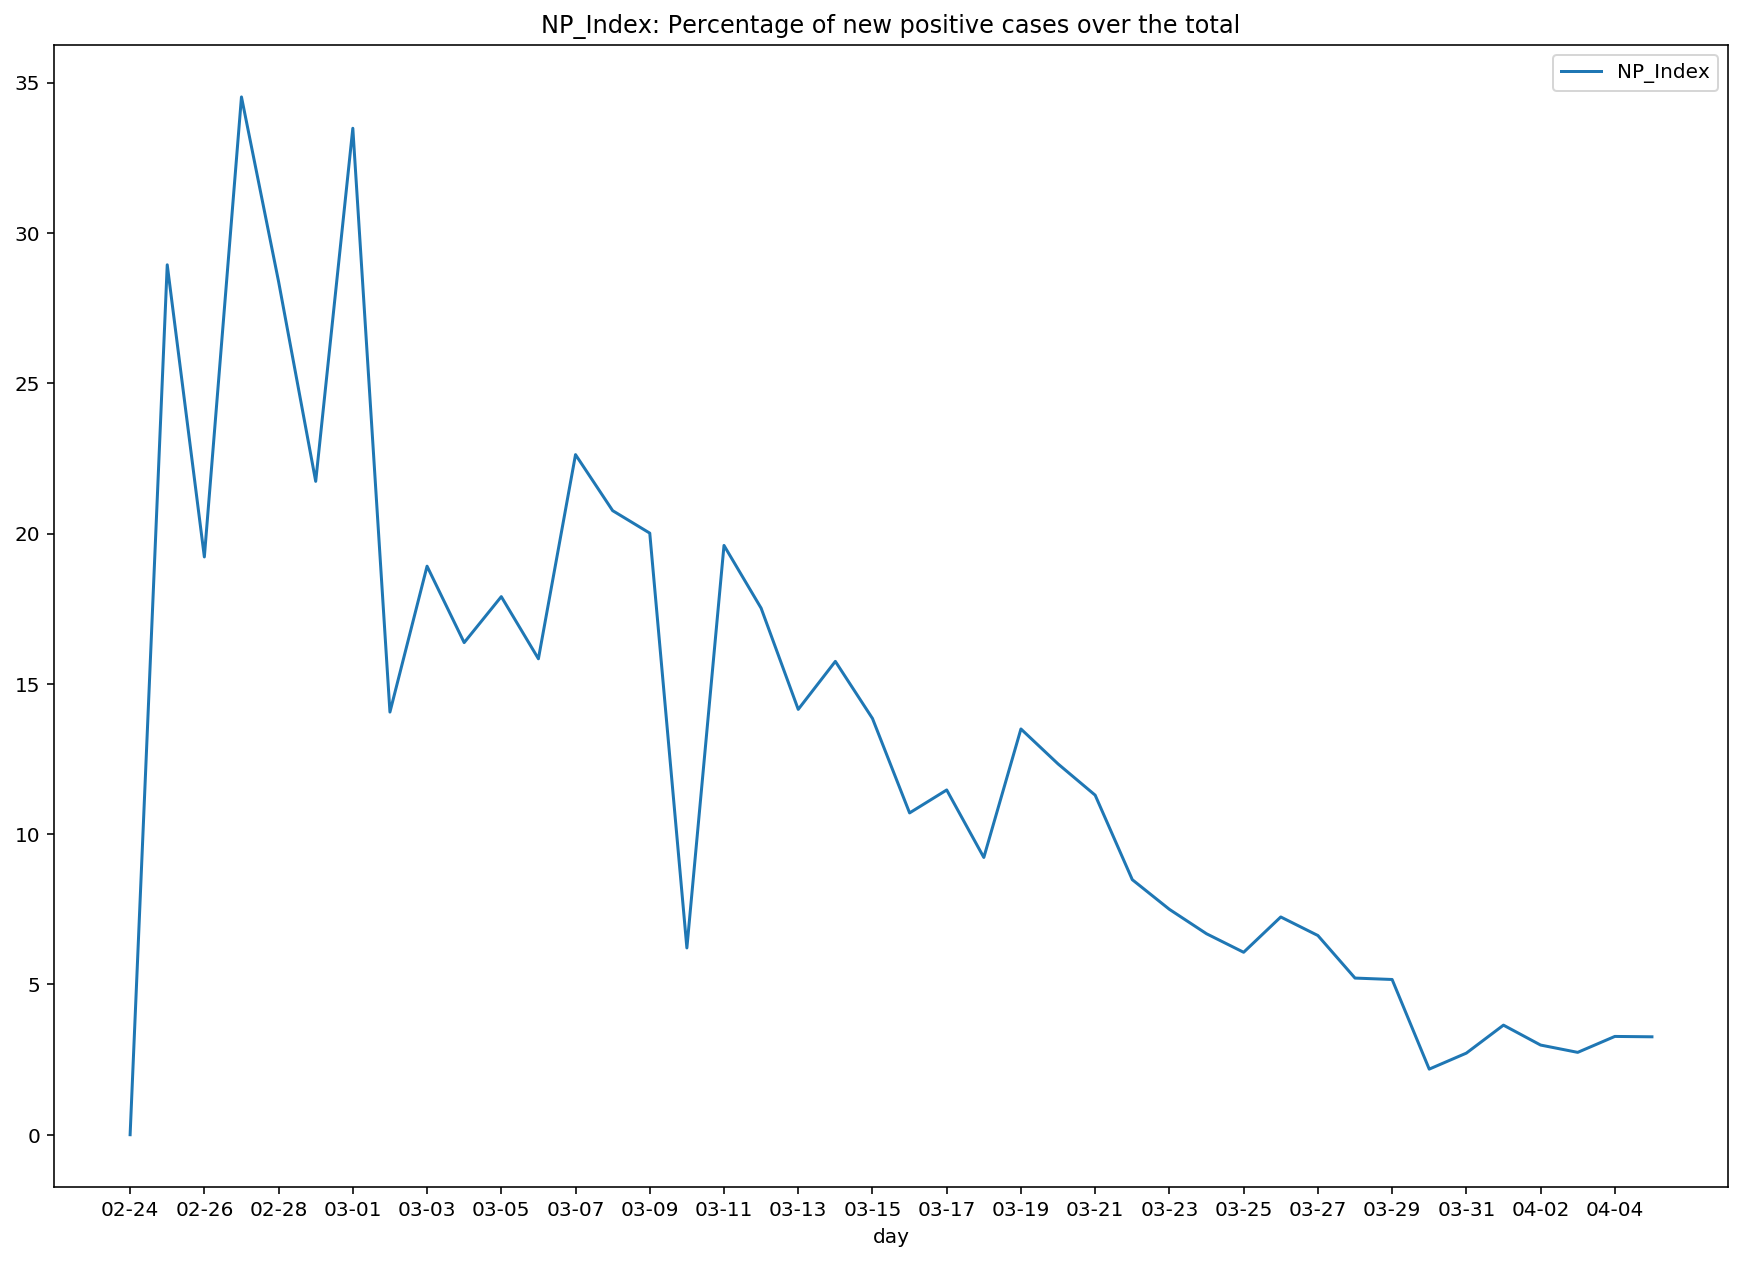

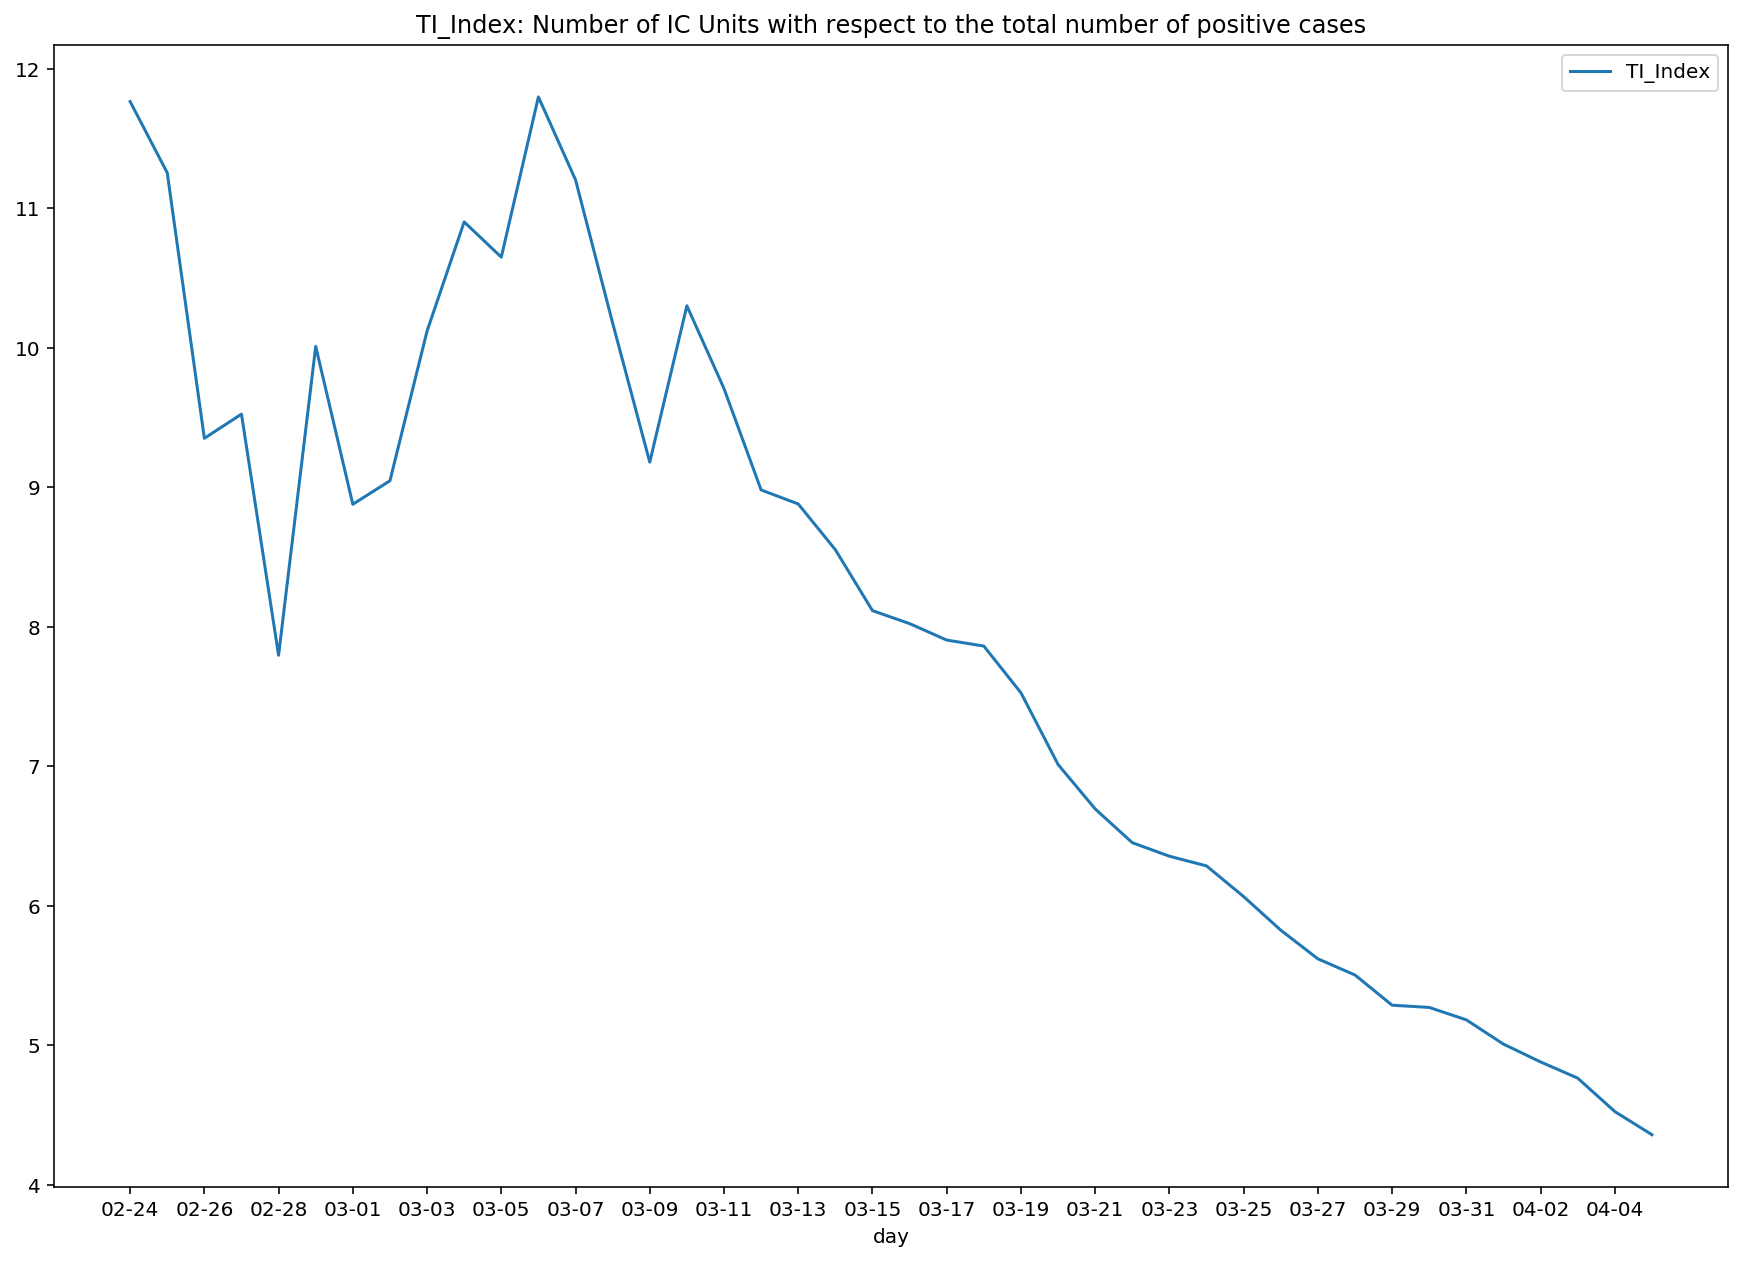

In [13]:
#Indice: rapporto fra il numero di nuovi positivi (NP) e il numero totale di attualmente positivi

ind_NP=pd.DataFrame(data=country, columns=["day"])
ind_NP["NP_Index"]=country["variation_total_positive"]/country["total_positive"]*100
ind_NP.set_index("day", inplace=True)
inds_X=np.arange(len(ind_NP))[::2]
ind_NP.plot(figsize=(15,10.5), xticks=inds_X, title="NP_Index: Percentage of new positive cases over the total")


#Indice di terapia intensiva: quanti dei malati vanno in TI?
ind_TI=country["ICU"]/country["total_positive"]*100
ti=pd.DataFrame(data=ind_TI, columns=["TI_Index"])
ti["day"]=country["day"].copy()
ti.set_index("day", inplace=True)
inds_X=np.arange(len(ti))[::2]
ti.plot(figsize=(15,10.5), xticks=inds_X, title="TI_Index: Number of IC Units with respect to the total number of positive cases")

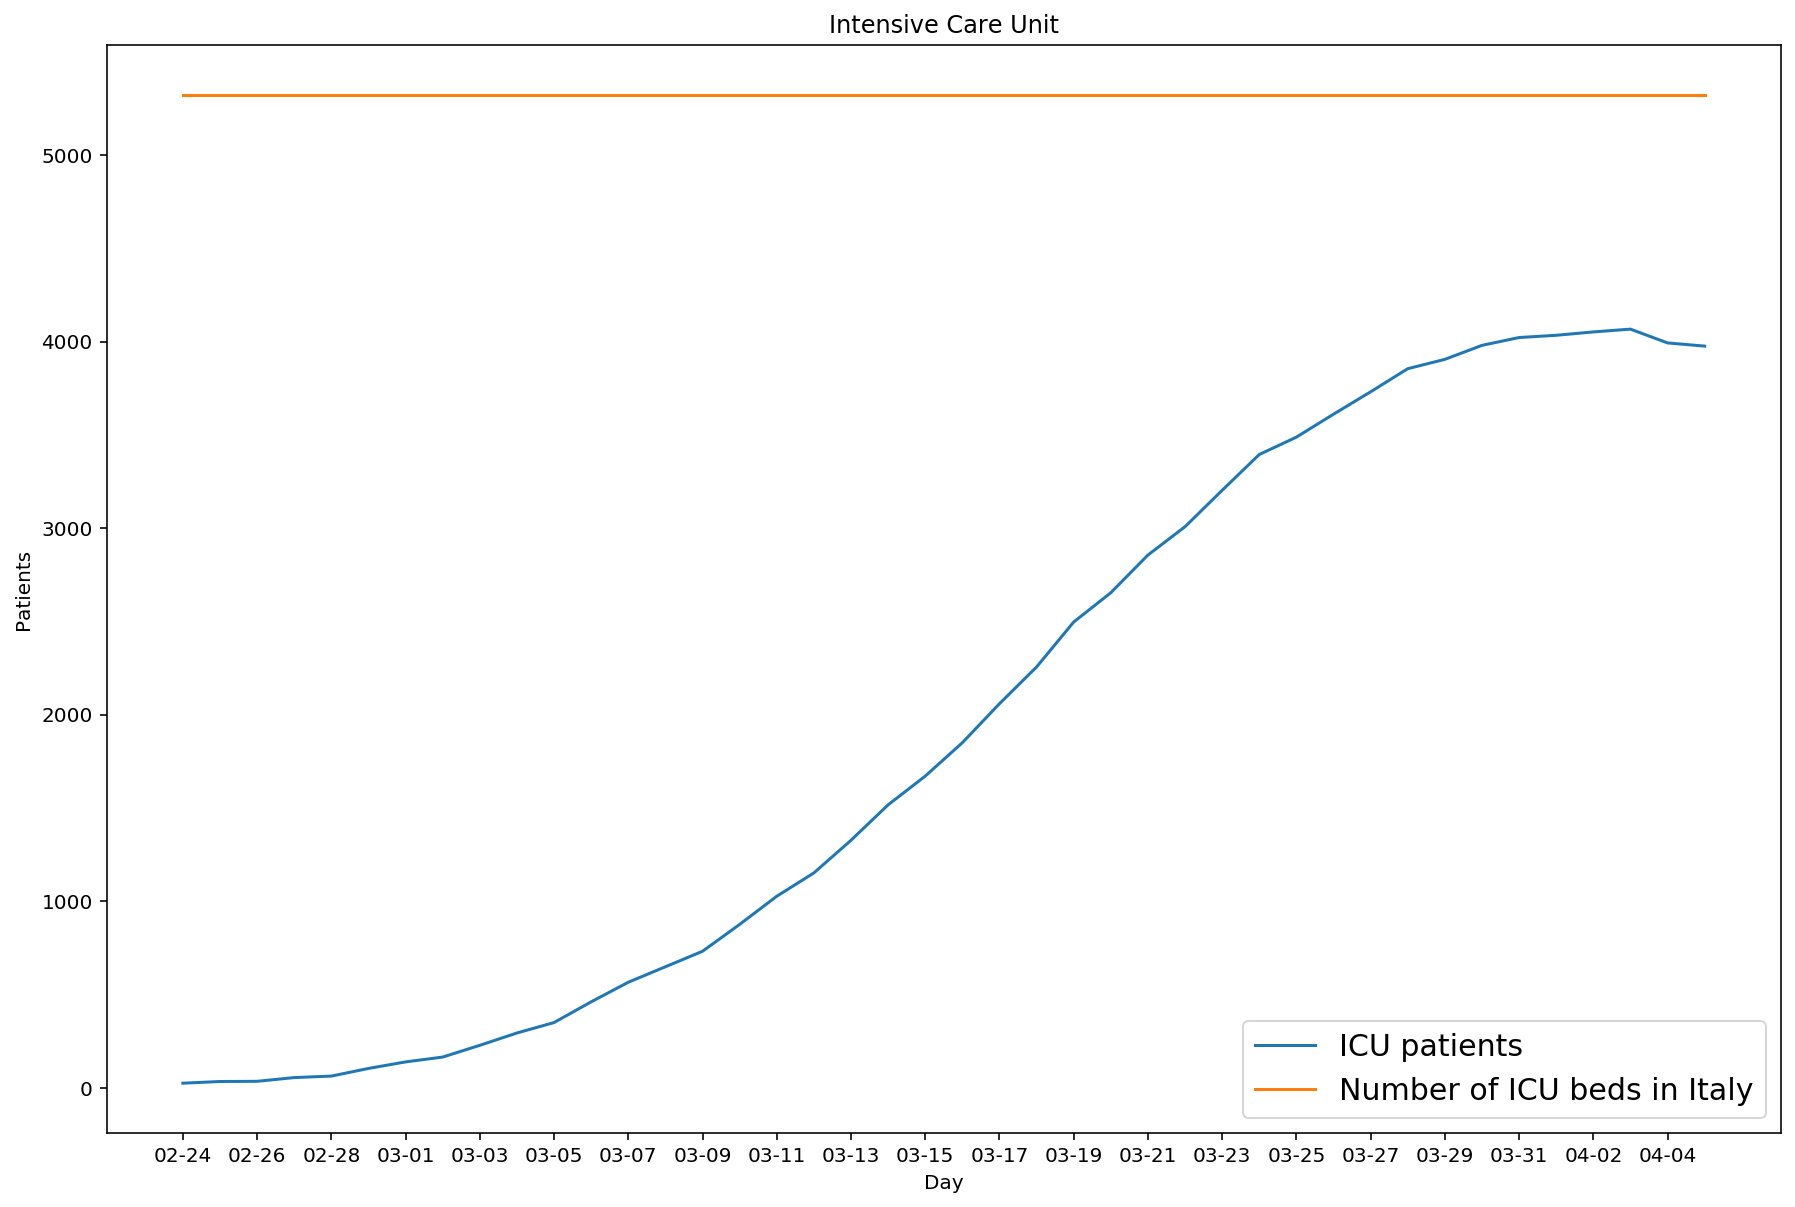

In [14]:
#5324 at the beginning of the epidemy
max_icu=[5324 for i in range(len(country))]
fig,ax1=plt.subplots(figsize=(15,10))
plt.title('Intensive Care Unit')
ax1.set_xlabel("Day")
ax1.set_ylabel("Patients")
ax1.set_xticks(np.arange(len(country))[::2])
ax1.plot(country["day"],country["ICU"], label="ICU patients")
ax1.plot(max_icu, label="Number of ICU beds in Italy")
ax1.legend(loc='lower right',fontsize=15)


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


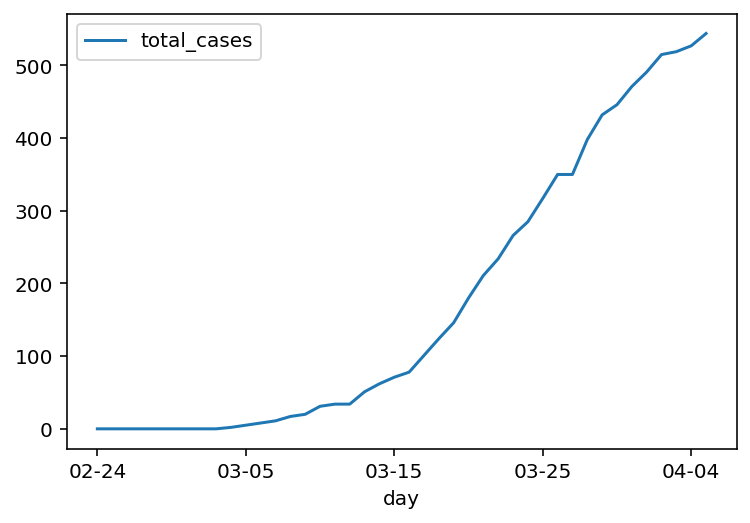

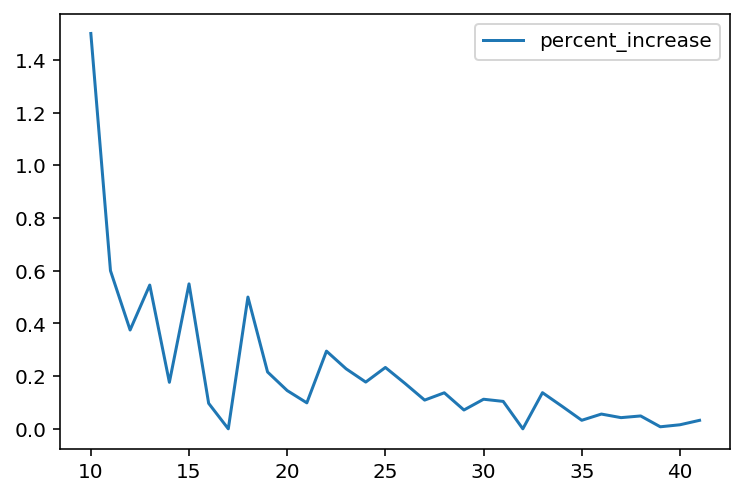

In [15]:
pisa=get_province("Pisa",provinces)
pisa.set_index("day", inplace=True)
pisa.plot()
increase, inds_X=compute_perc_increase("provinces","total_cases", "Pisa")
increase.plot()

## Geographical Plotting attempt

In [16]:
#Hack to fix missing PROJ4 env var
import os
import conda
import numpy as np
import matplotlib.pyplot as plt

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

    
def plotMap(coloredGraph=False):
    plt.figure(figsize=(20,20))
    if coloredGraph:
        m = Basemap(resolution='l', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514, epsg=4265)
        #m.bluemarble() -> Più veloce ma low res
        m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= False)
        #m.shadedrelief()
        frameon=True
    else:
        m = Basemap(resolution='i', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514)
        m.drawmapboundary(fill_color='#85A6D9')
        m.fillcontinents(color='white',lake_color='#85A6D9')
        m.drawcoastlines(color='#6D5F47', linewidth=.4)
        m.drawcountries(color='#6D5F47', linewidth=.4)
        frameon=False
        #m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
        #m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')


    #Pulizia database
    prov_today=get_day(provinces, "03-28")
    prov_today=prov_today.reset_index(drop=True)
    inds=np.flatnonzero(prov_today["lat"]==0)
    prov_today = prov_today.drop(inds, axis=0)

    #Numpyzzazione
    lats = prov_today.lat.to_numpy()
    lngs = prov_today.long.to_numpy()
    
    #Scaling
    populations = prov_today["total_cases"].to_numpy()/5
    x,y = m(lngs,lats)
    
    #Scattering
    m.scatter(
        x,
        y,
        s=populations, #size
        c='red', #color
        marker='o', #symbol
        alpha=0.7, #transparency
        zorder = 2, #plotting order
        )

    #Prendo i quantili per la legenda
    quant_25=int(prov_today.quantile(0.25)["total_cases"])
    quant_50=int(prov_today.quantile(0.5)["total_cases"])
    quant_75=int(prov_today.quantile(0.75)["total_cases"])

    for a in [quant_25, quant_50, quant_75]:
        a=a-a%10
        plt.scatter([], [], c='red', alpha=0.5, s=a,
                    label=str(a) + ' casi')
    plt.legend(scatterpoints=1, frameon=frameon,
               labelspacing=2, loc='lower left', fontsize="large");

    plt.title('Geographical representation')
    plt.show()
    
plotMap(True)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

With the above functions we can analyze the provinces of Pisa for example

Since we will need a lot of plotting, we now define a function to plot any two variables from the dataframe

In [17]:
def plot_df(df,asc,ords,kind='line'):
    plt.clf()
    if asc=='day':
        inds_x=np.arange(len(df))[::2]
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
    else:
        inds_x=np.linspace(min(df[asc]),max(df[asc]),num=20)
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
        
    ax=df.plot(x=asc,y=ords,label=ords+' vs '+asc,figsize=(15,10.5),xticks=inds_x,yticks=inds_y,kind=kind)
    
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

def multi_plot_df(dlist,asc,ords,names=None,kind='line'):
    plt.clf()
    if names==None:
        names=[str(i+1) for i in range(len(dlist))] 
    if asc=='day':
        inds_x=np.arange(len(dlist[0][asc]))[::2]
    ax=dlist[0].plot(x=asc,y=ords,label=names[0],figsize=(15,10.5),kind=kind)
    dlist.remove(dlist[0])
    names.remove(names[0])
    for df in dlist:
        df.plot(ax=ax,x=asc,y=ords,label=names[dlist.index(df)],figsize=(15,10.5),kind=kind)
    
    plt.title(ords+' vs '+asc,fontsize=20)
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

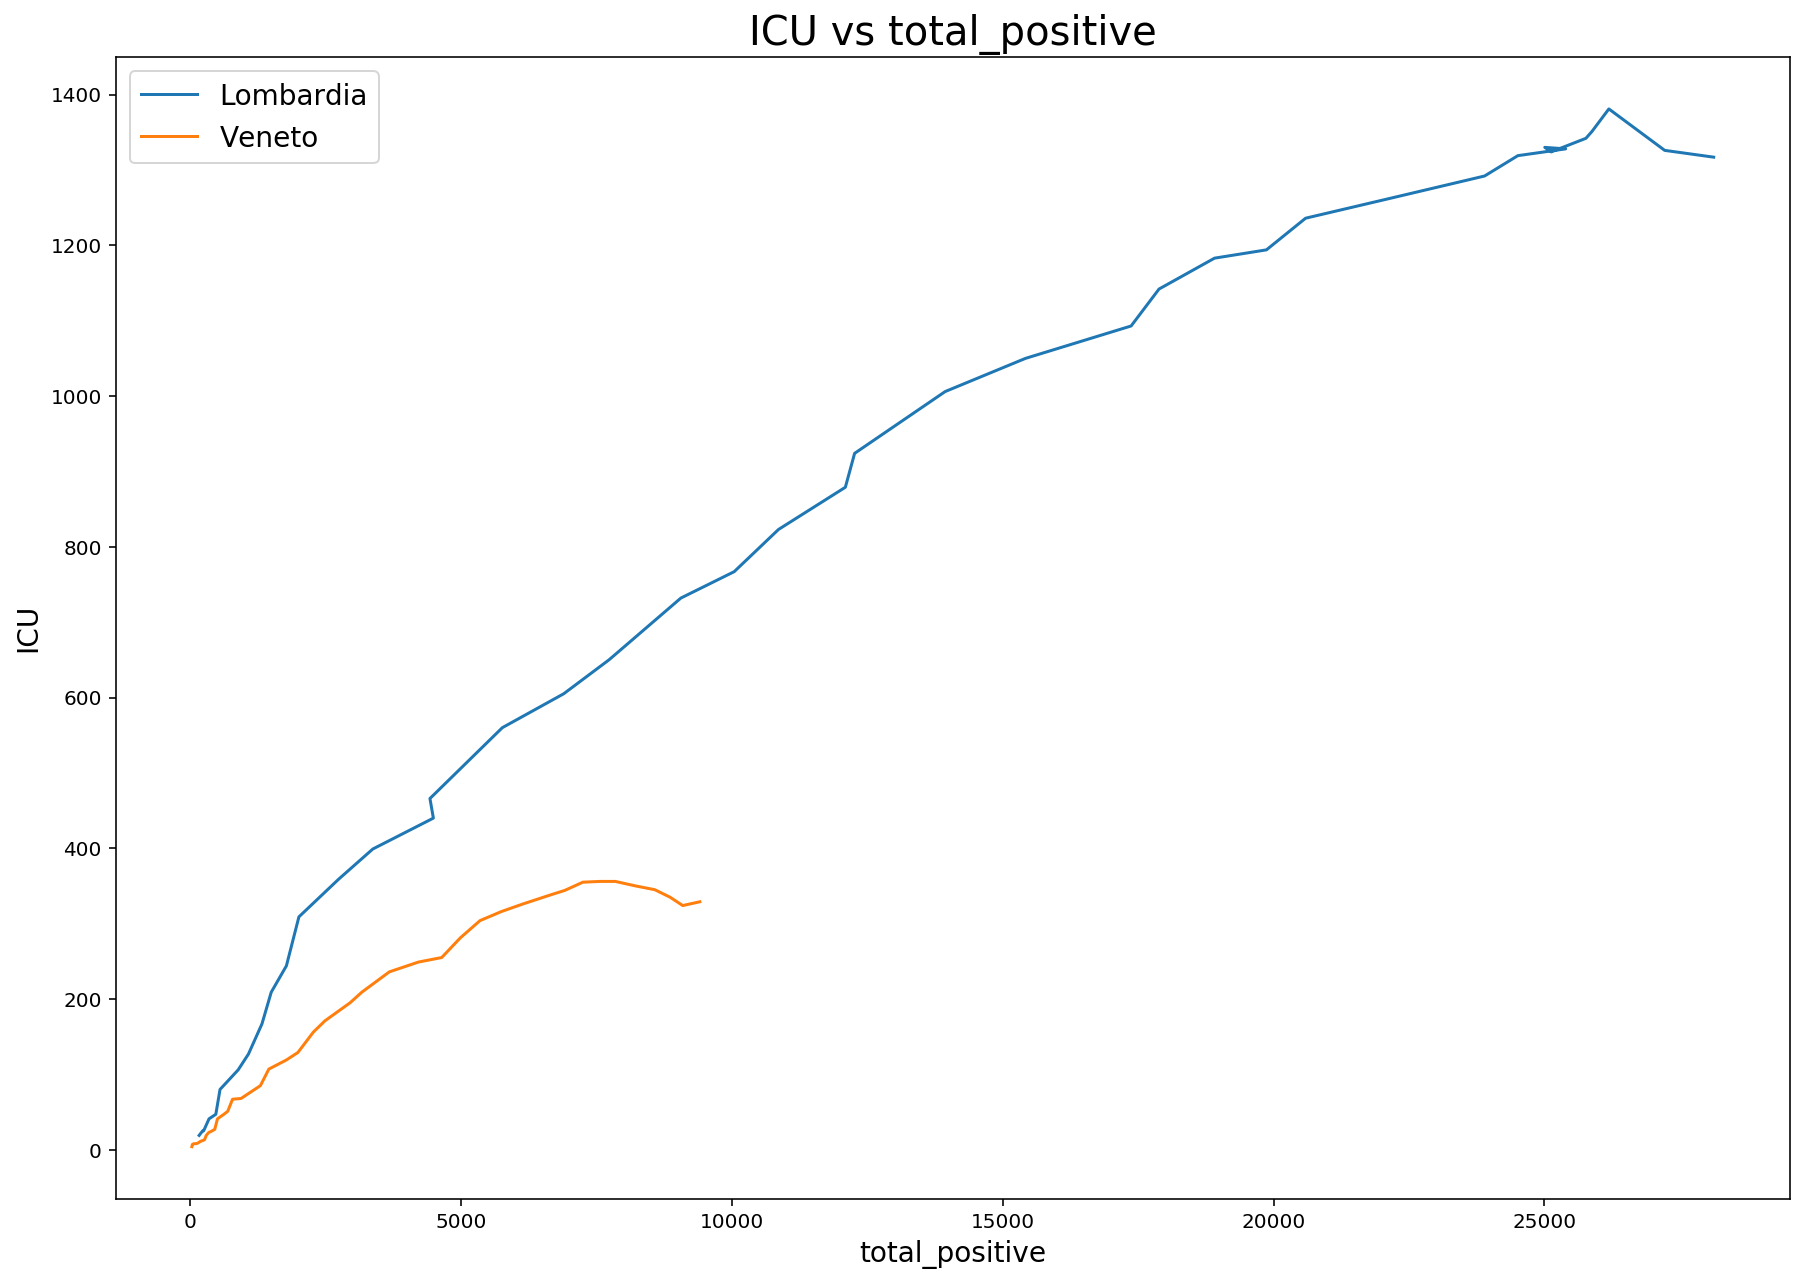

In [18]:
#SECONDO ME DELETE O CAMBIARE VARIABILI

Lom=get_region('Lombardia',regions)
Ven=get_region('Veneto',regions)
multi_plot_df([Lom,Ven],'total_positive','ICU', names=['Lombardia','Veneto'])



/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

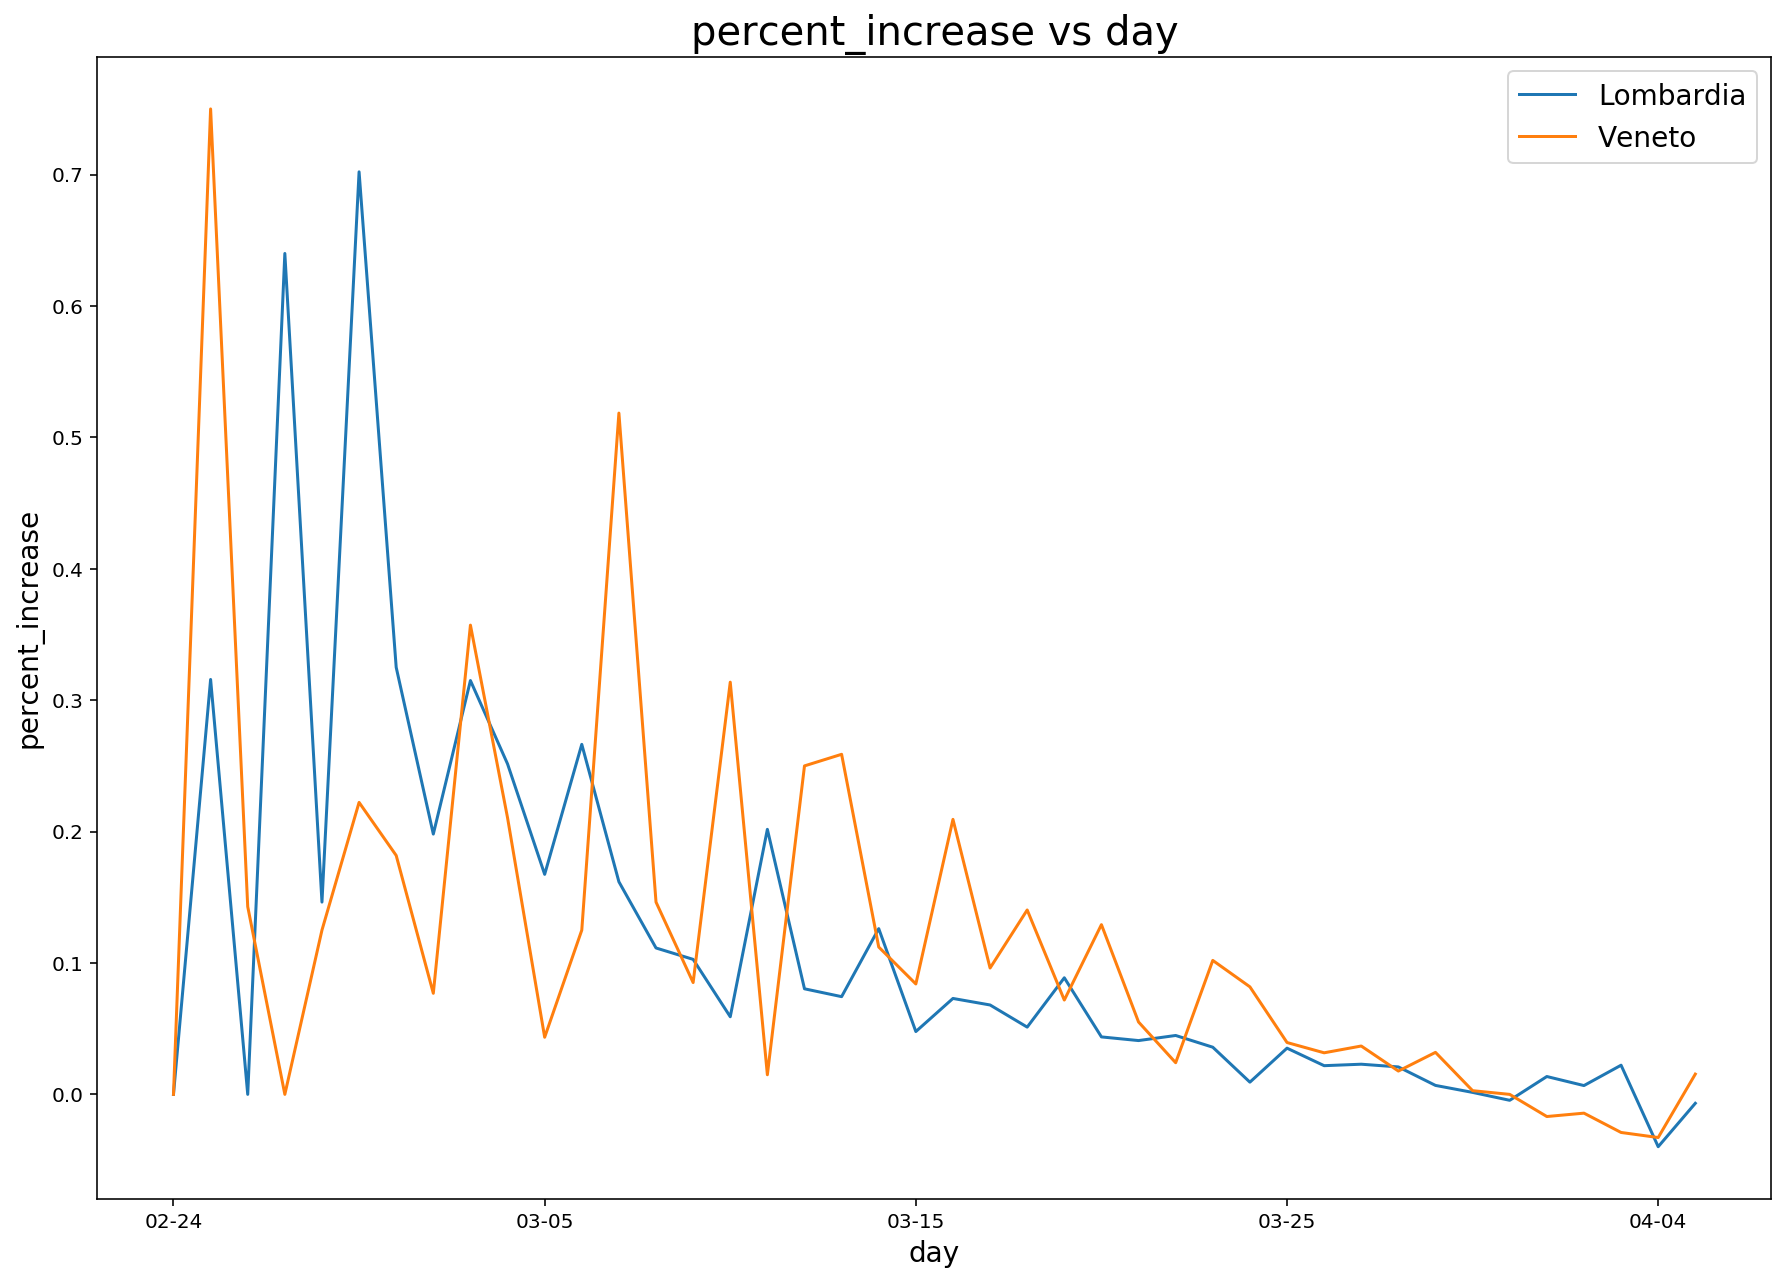

In [19]:
multi_plot_df([compute_perc_increase("regions",'ICU', "Lombardia")[0],compute_perc_increase("regions", "ICU", "Veneto")[0]],
              'day','percent_increase',names=['Lombardia','Veneto'])

We now try to guess if the current decrease in positive cases is good news in Lombardy & the whole Italy

In [20]:
country.head()

day  hospitalized_symptoms  ICU  total_hospitalized  home_isolation  \
0  02-24                    101   26                 127              94   
1  02-25                    114   35                 150             162   
2  02-26                    128   36                 164             221   
3  02-27                    248   56                 304             284   
4  02-28                    345   64                 409             412   

   total_positive  variation_total_positive  new_positive  recovered  \
0             221                         0           221          1   
1             311                        90            93          1   
2             385                        74            78          3   
3             588                       203           250         45   
4             821                       233           238         46   

   deceased  total_cases  tests  
0         7          229   4324  
1        10          322   8623  
2        12          400   9587  
3        17          650  12014  
4        21          888  15695

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


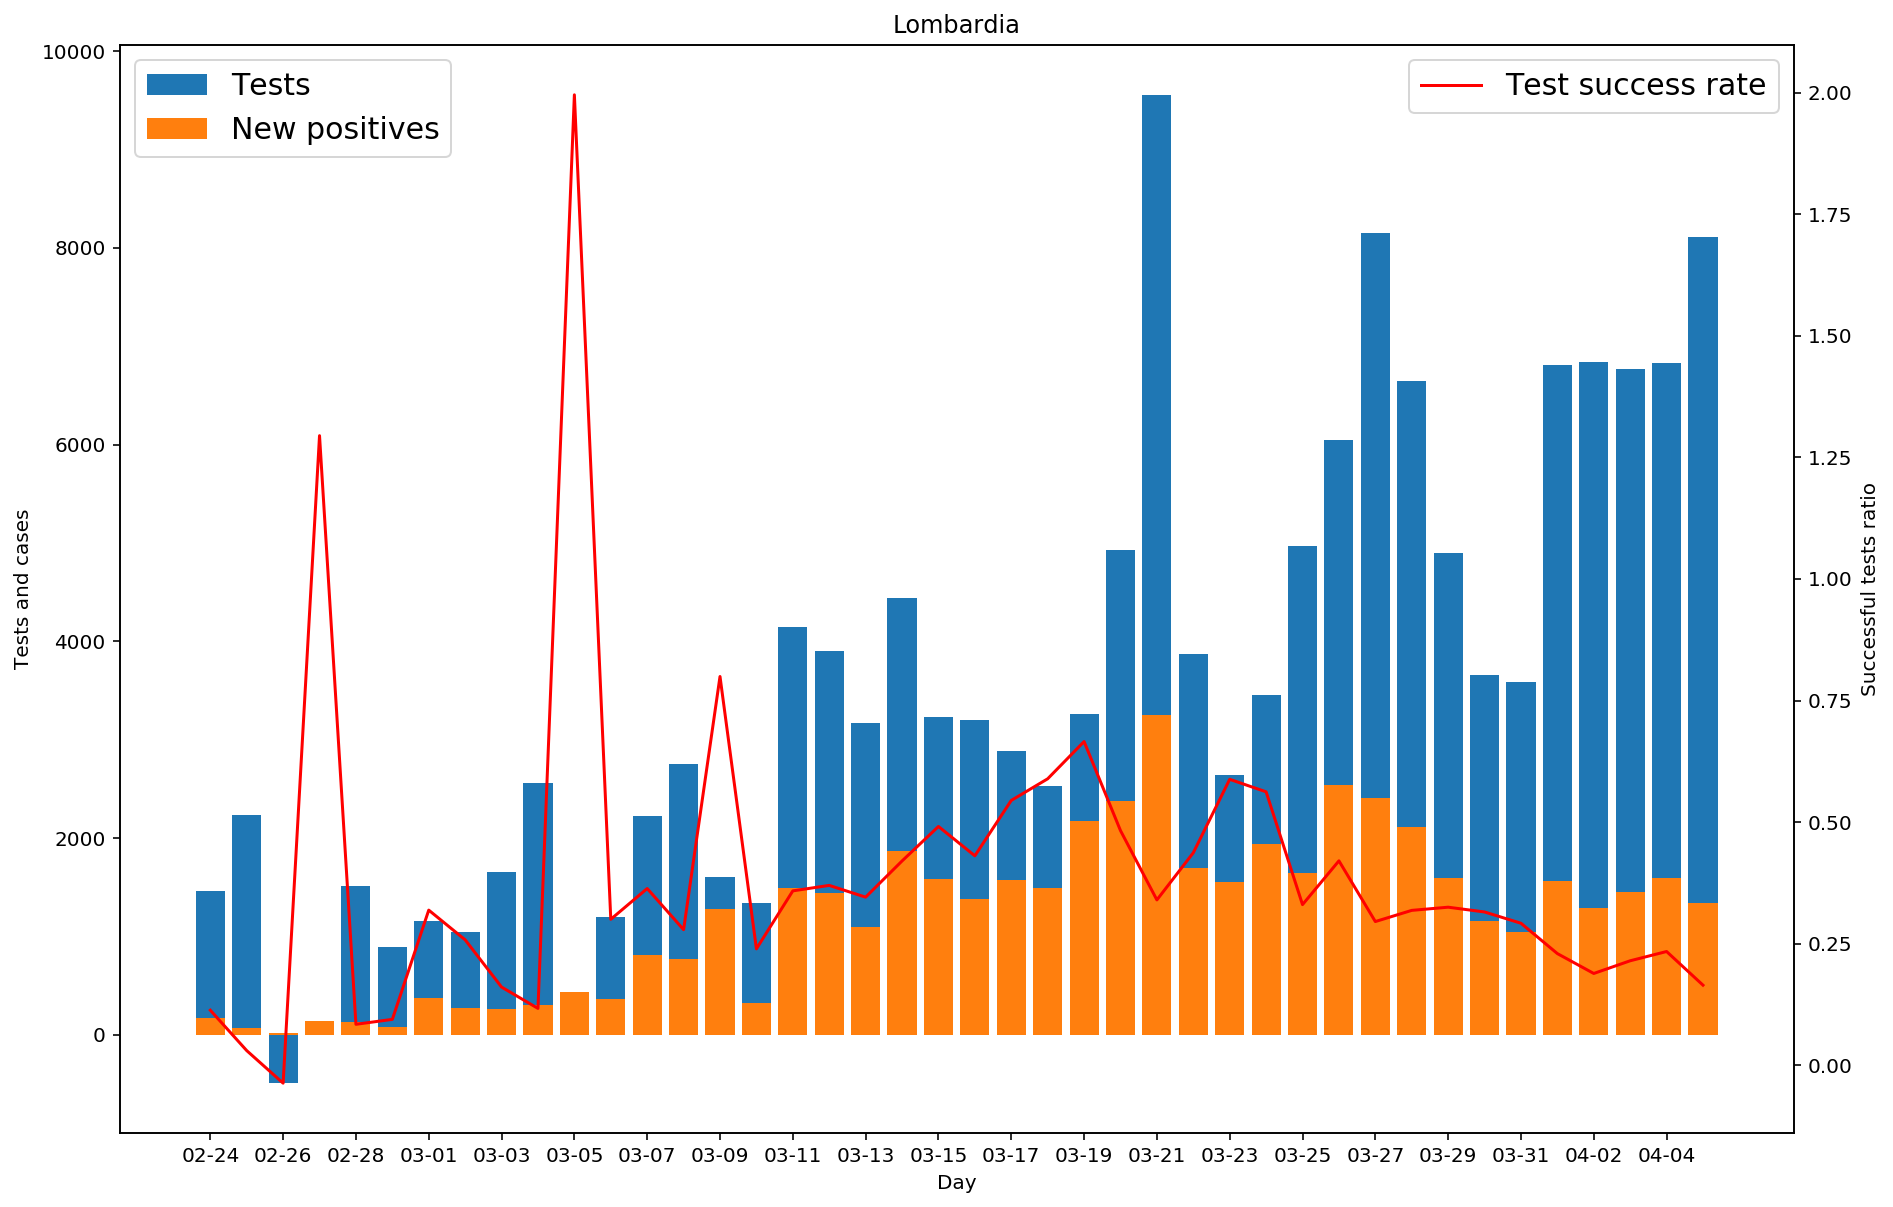

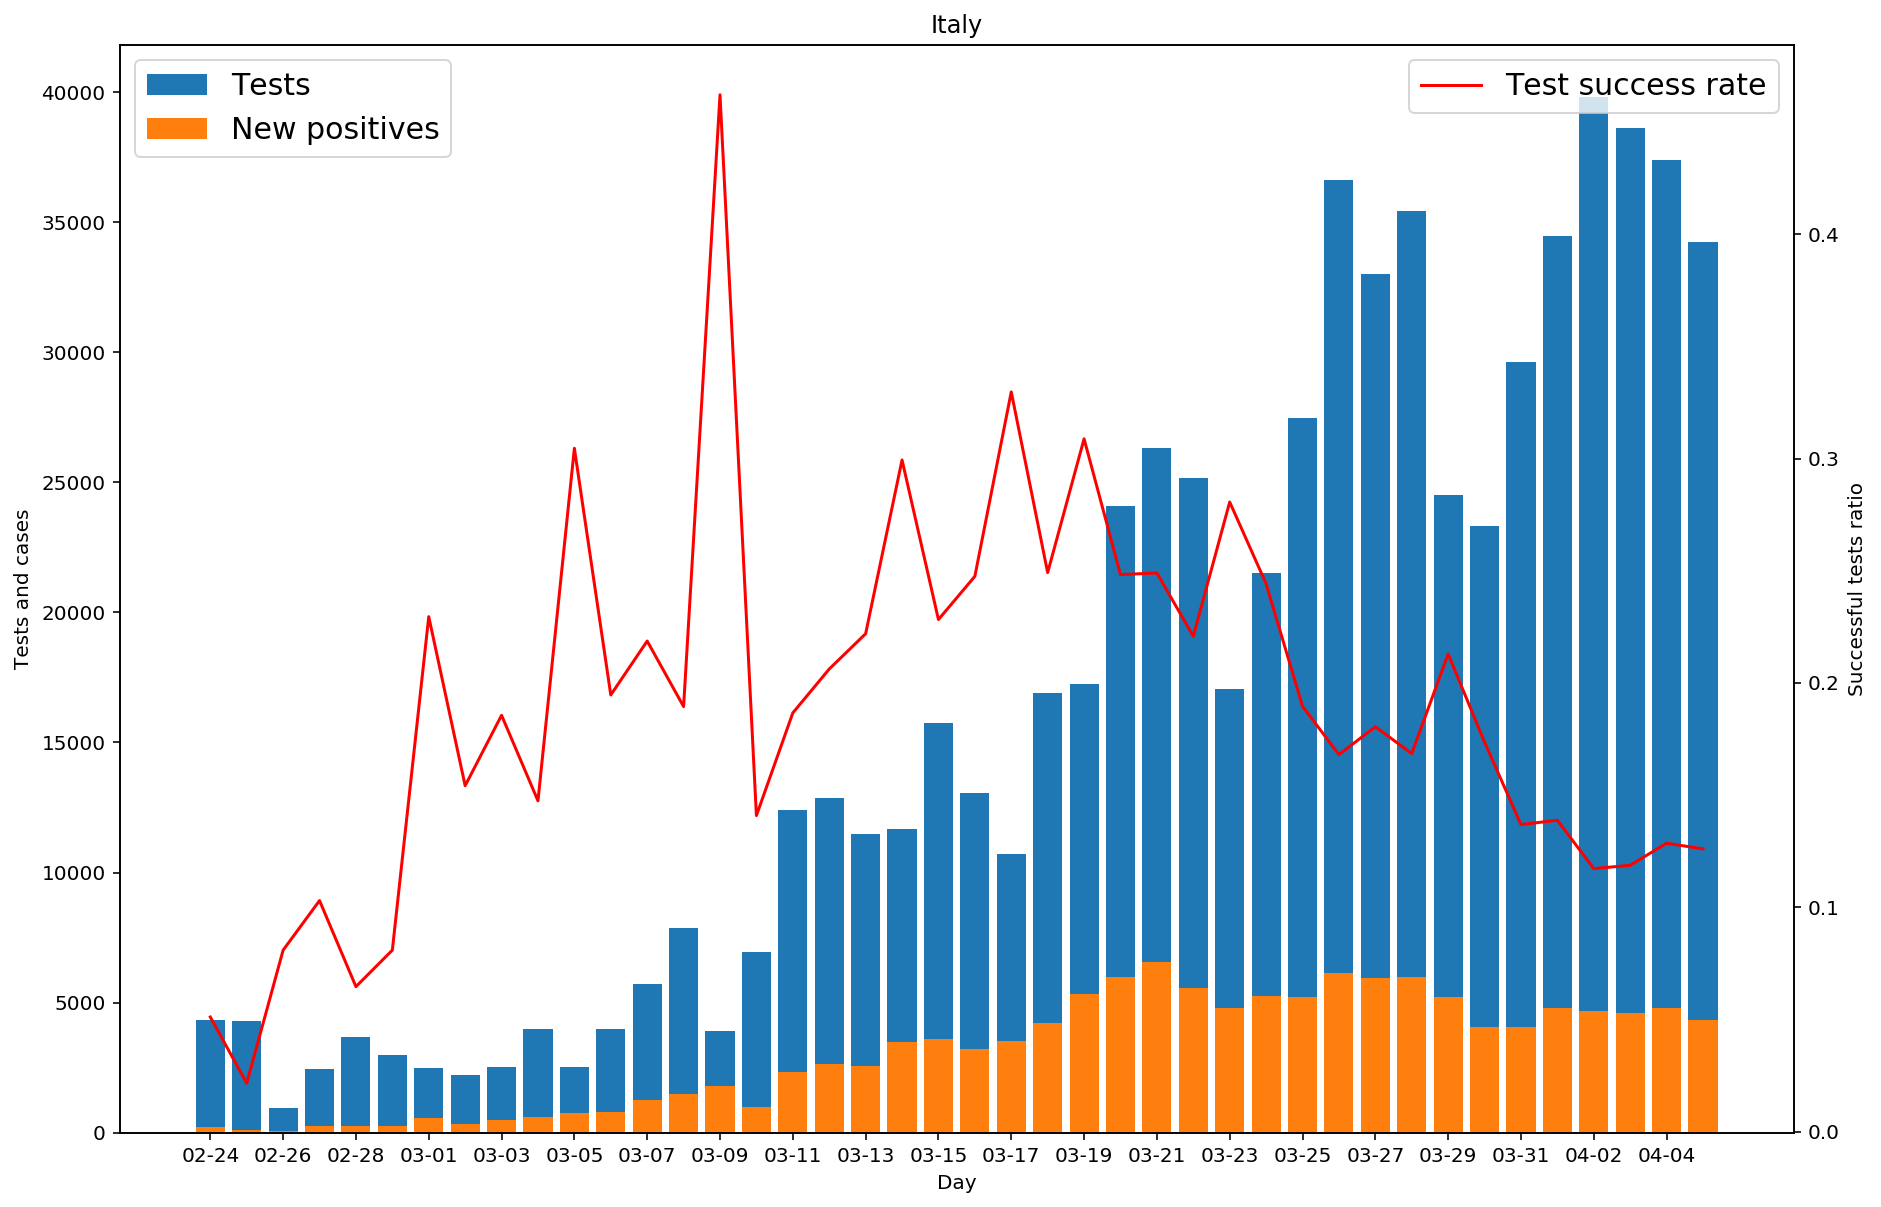

In [21]:
#definitivo

%matplotlib inline
Lom=get_region('Lombardia',regions)
tamp_lom=compute_increase(Lom,'tests')
tamp_nat=compute_increase(country,'tests')
succ_nat=country['new_positive']/tamp_nat['increase'] #NUOVI,NON VAR TOT
succ_lom=Lom['new_positive']/tamp_lom['increase']

fig,ax1=plt.subplots(figsize=(15,10))
plt.title('Lombardia')
ax1.set_xlabel("Day")
ax1.set_ylabel("Tests and cases")
ax1.bar(tamp_lom['day'],tamp_lom['increase'],label='Tests')
ax1.bar(Lom['day'],Lom['new_positive'],label='New positives')
ax1.set_xticks(np.arange(len(tamp_lom['day']))[::2])
ax1.legend(loc='upper left',fontsize=15)
ax2=ax1.twinx()
ax2.set_xticks((np.arange(len(tamp_lom['day']))[::2]))
ax2.set_xlabel("Day")
ax2.set_ylabel("Successful tests ratio")
ax2.plot(Lom['day'],succ_lom,label='Test success rate',c='r')
ax2.legend(loc='upper right',fontsize=15)


fig2,bx1=plt.subplots(figsize=(15,10))
plt.title('Italy')
bx1.set_xlabel("Day")
bx1.set_ylabel("Tests and cases")
bx1.bar(tamp_nat['day'],tamp_nat['increase'],label='Tests')
bx1.bar(country['day'],country['new_positive'],label='New positives')
bx1.set_xticks(np.arange(len(tamp_nat['day']))[::2])
bx1.legend(loc='upper left',fontsize=15)
bx2=bx1.twinx()
bx2.set_xticks((np.arange(len(tamp_nat['day']))[::2]))
bx2.set_xlabel("Day")
bx2.set_ylabel("Successful tests ratio")
bx2.plot(country['day'],succ_nat,label='Test success rate',c='r')
bx2.legend(loc='upper right',fontsize=15)



Now we will try to plot the increment of positive cases vs the total number or positive cases. 

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

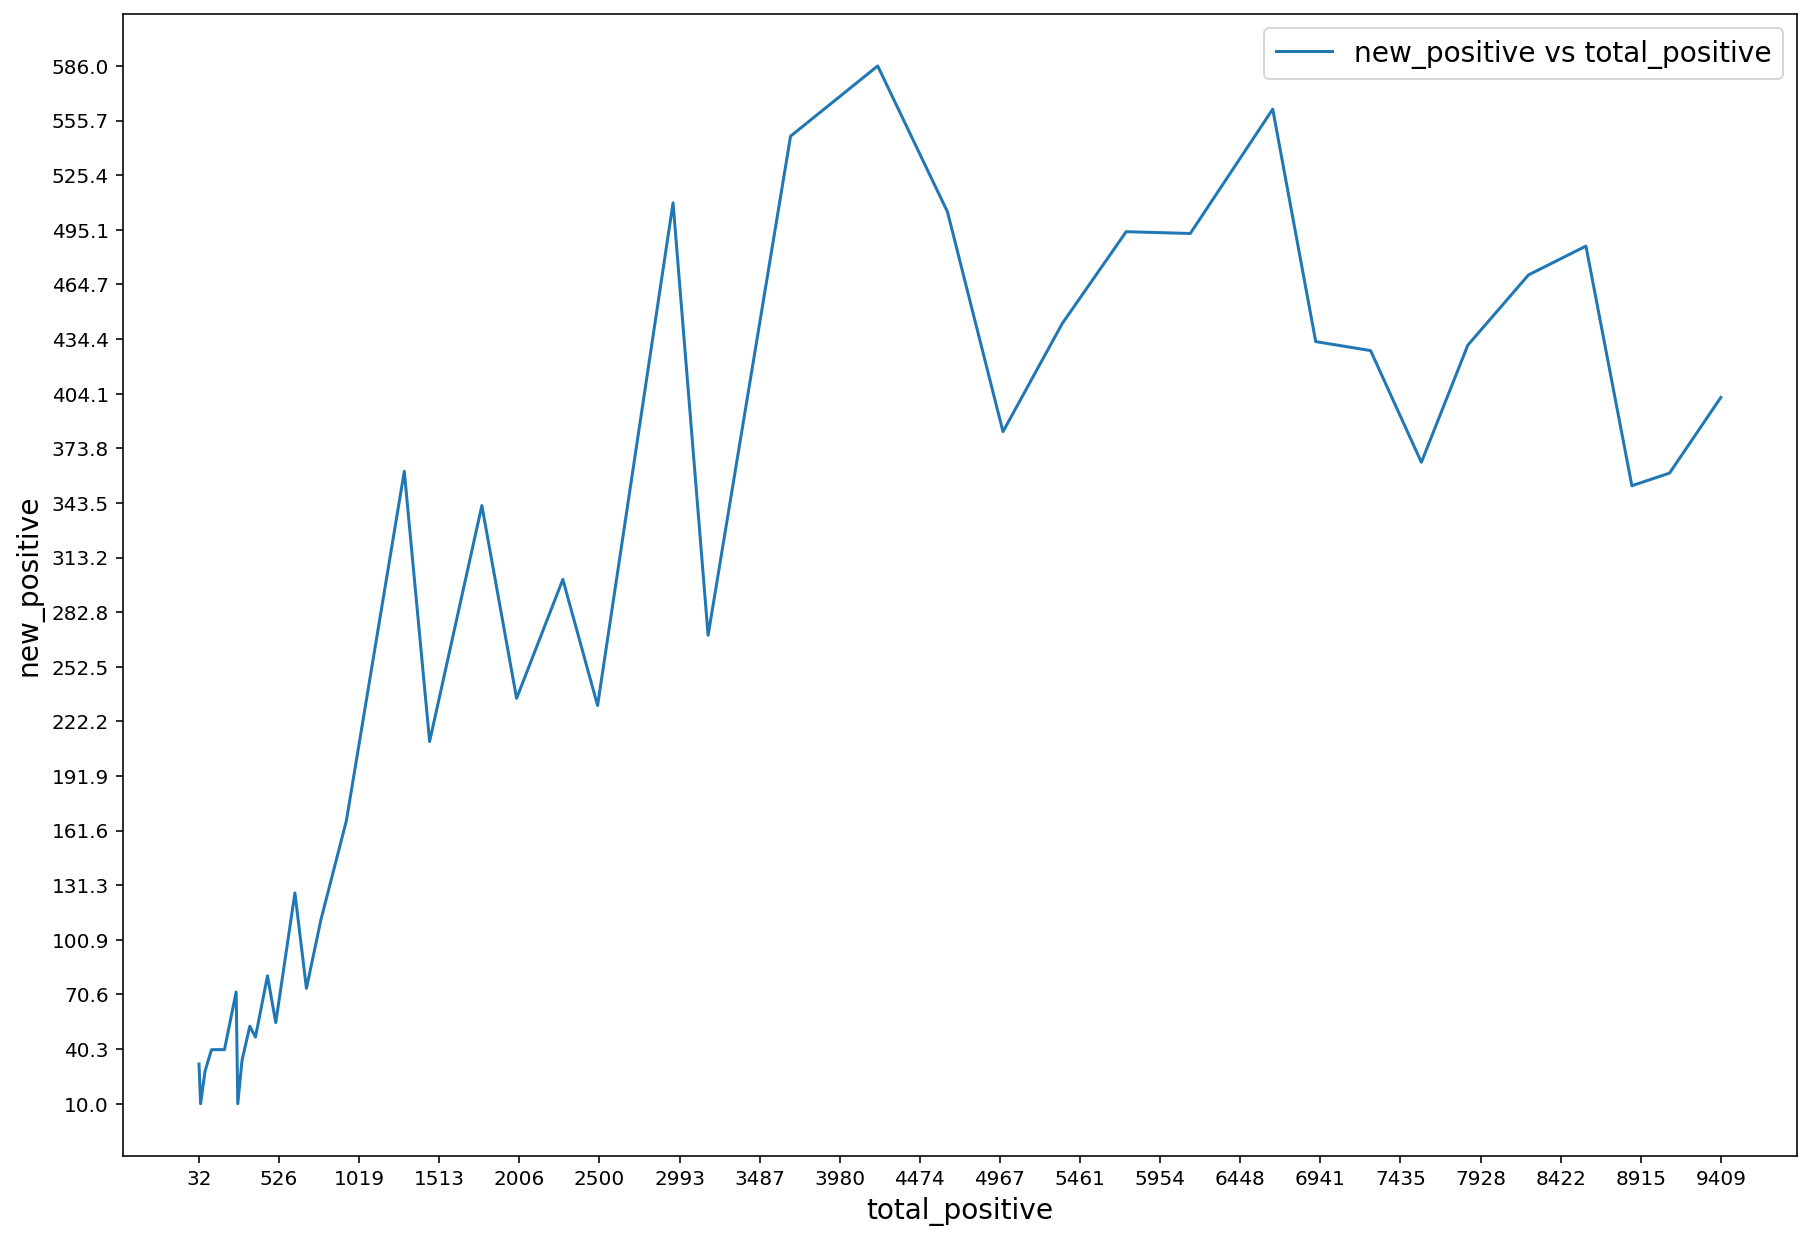

<Figure size 432x288 with 0 Axes>

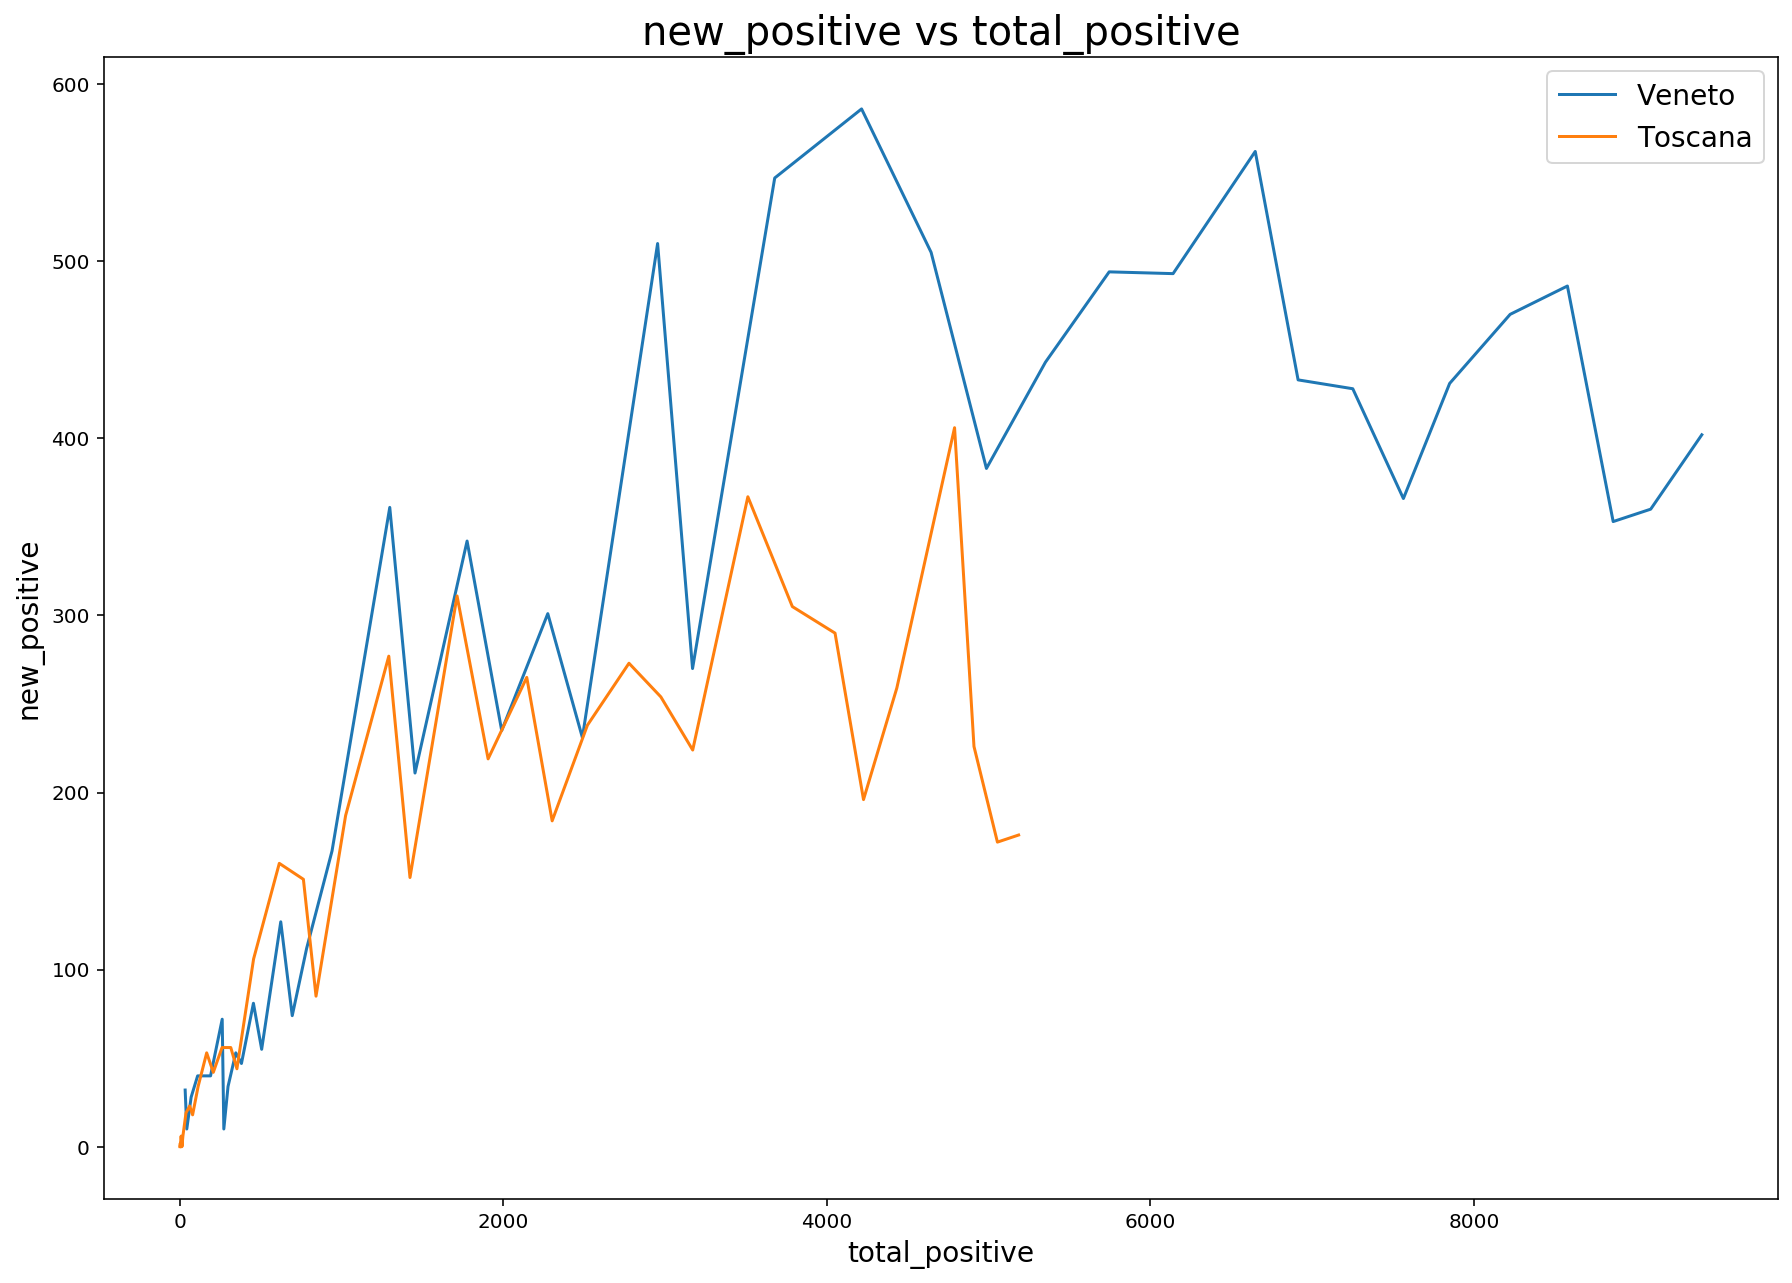

In [22]:
Ven=get_region('Veneto',regions)
Tosc=get_region('Toscana',regions)
inc=compute_increase(Ven,'total_cases')
plot_df(Ven,'total_positive','new_positive')
multi_plot_df([Ven,Tosc],'total_positive','new_positive',names=['Veneto','Toscana'])

Undoubtly, the number of new cases is a good indicator of the national trend in the spreading of the virus. Nevertheless, its relevance can be altered depending on the number of tests that have been carried out. Indeed, a strong increase in the number of positive with respect to the previous day can be caused only by an increrase in the number of tests.
So we are now plotting a percentage ratio between the number of new positives and the number of tests carried out.

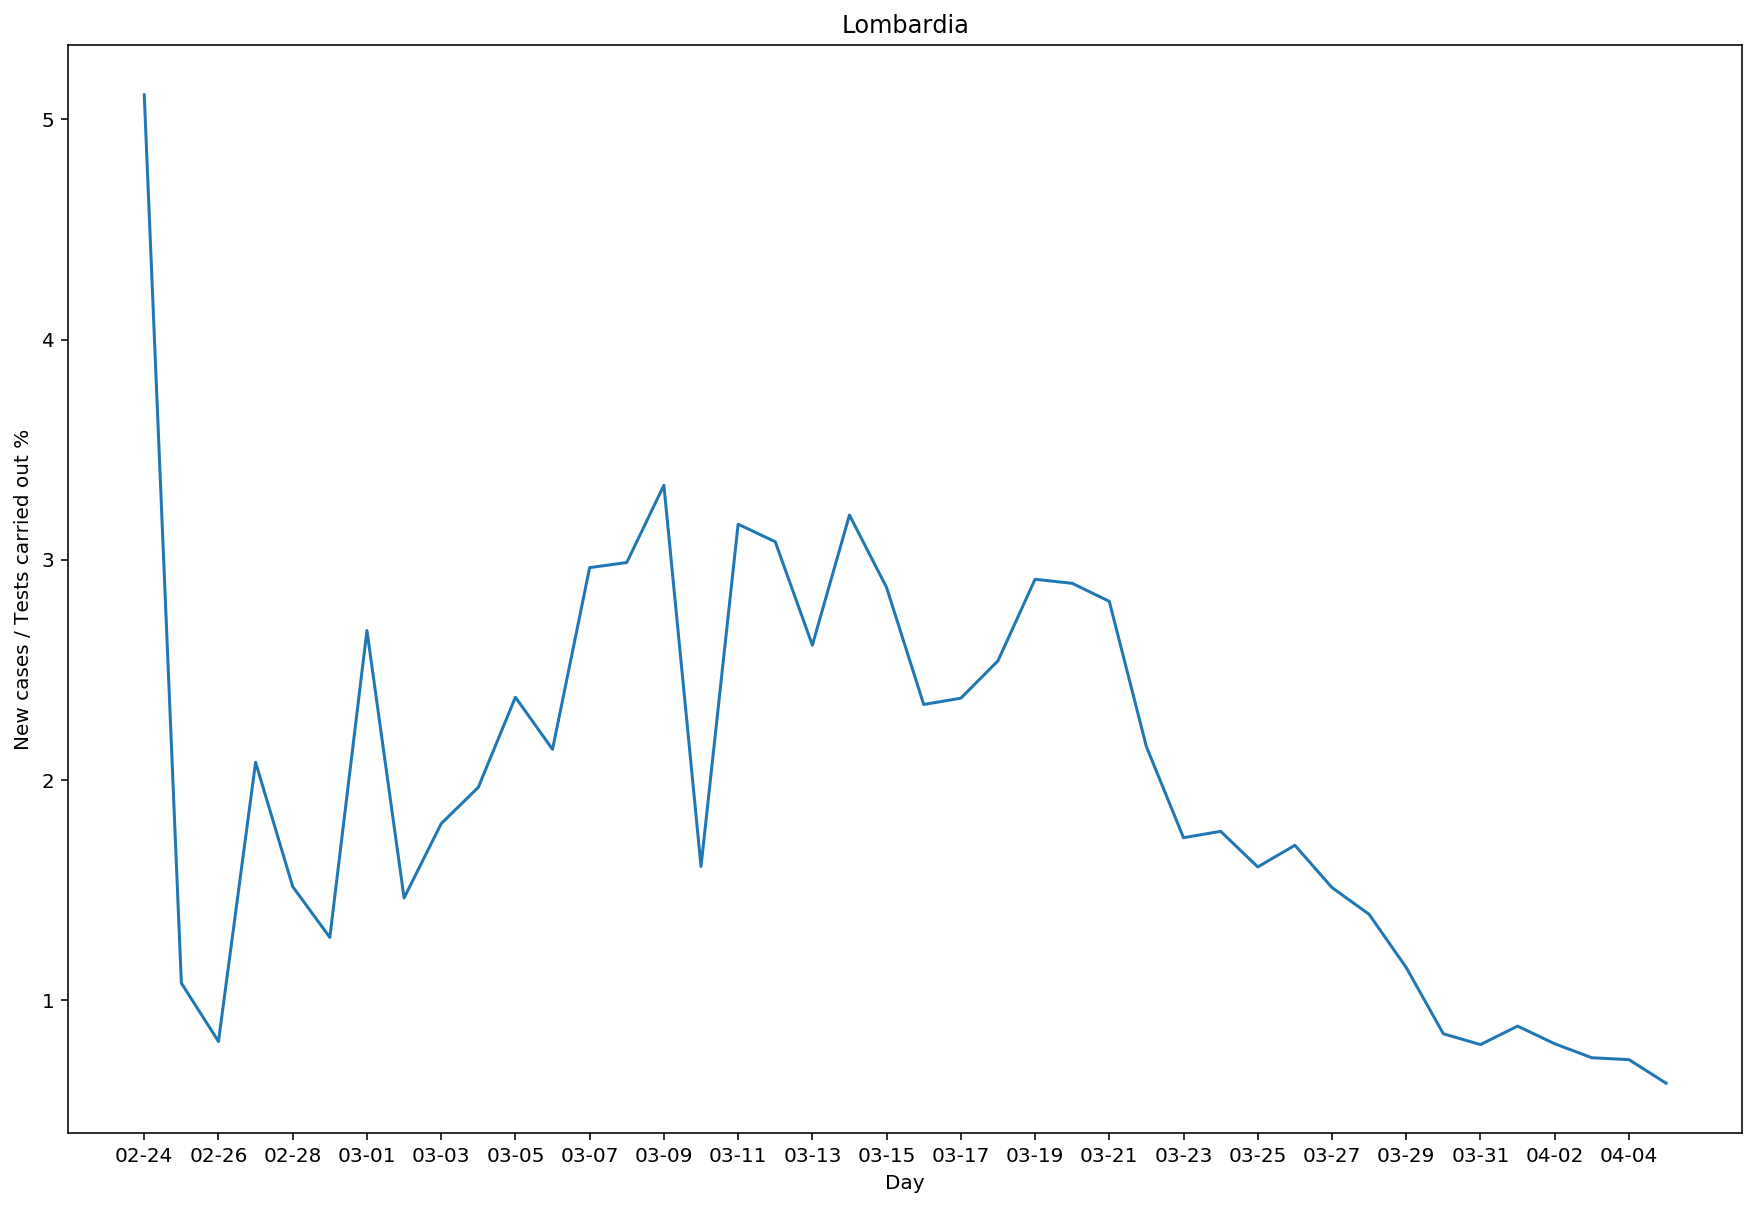

In [23]:
d=(country["new_positive"]/country["tests"])*100
fig,ax1=plt.subplots(figsize=(15,10))
plt.title('Lombardia')
ax1.set_xlabel("Day")
ax1.set_ylabel("New cases / Tests carried out %")
ax1.set_xticks(np.arange(len(country['day']))[::2])
ax1.plot(country["day"],d)

## Approximation attempt

we now try to approximate the function to a polynomial or to a logistic function in the first case we also have to assess the correct grade of the polynomial

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.pipeline import Pipeline

In [25]:
#Added plot feature: if True, prints the plots, if False, just computes the errors
#Added verbose feature: if True, prints the errors, if False, just computes the errors
#Ticks and lables fixed

def plot_learning_curves(model,X,y, size=(20,20), plot=True, verbose=True):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_err,val_err=[],[]
    for i in range(1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_pred=model.predict(X_train[:i])
        y_val_pred=model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:i],y_train_pred[:i]))
        val_err.append(mean_squared_error(y_val[:i],y_val_pred[:i]))
    if plot:
        plt.figure(figsize=size)    
        plt.ylabel("Error", fontsize=20)
        plt.xlabel("Size of training sample", fontsize=20)
        plt.xticks(fontsize=20)
        maxim=max(np.sqrt(train_err))
        step=maxim//10
        step=step-step%10
        #np.arange(maxim, step=step),
        plt.yticks( fontsize=20)
        plt.plot(np.sqrt(train_err),'r-+',linewidth=2,label='train')
        plt.plot(np.sqrt(val_err),'b-',linewidth=2,label='validation')
        plt.legend(fontsize="xx-large")
    if verbose:
        print('The training error is: ',np.sqrt(train_err[-1]))
        print('The validation error is: ',np.sqrt(val_err[-1]))
    return np.sqrt(train_err[-1]), np.sqrt(val_err[-1])

this is a second degree polynomial approximation, we will later implement it in a pipeline to try to get the best degree approximation

Below a way of plotting approximation vs real data for a second degree polynomial

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

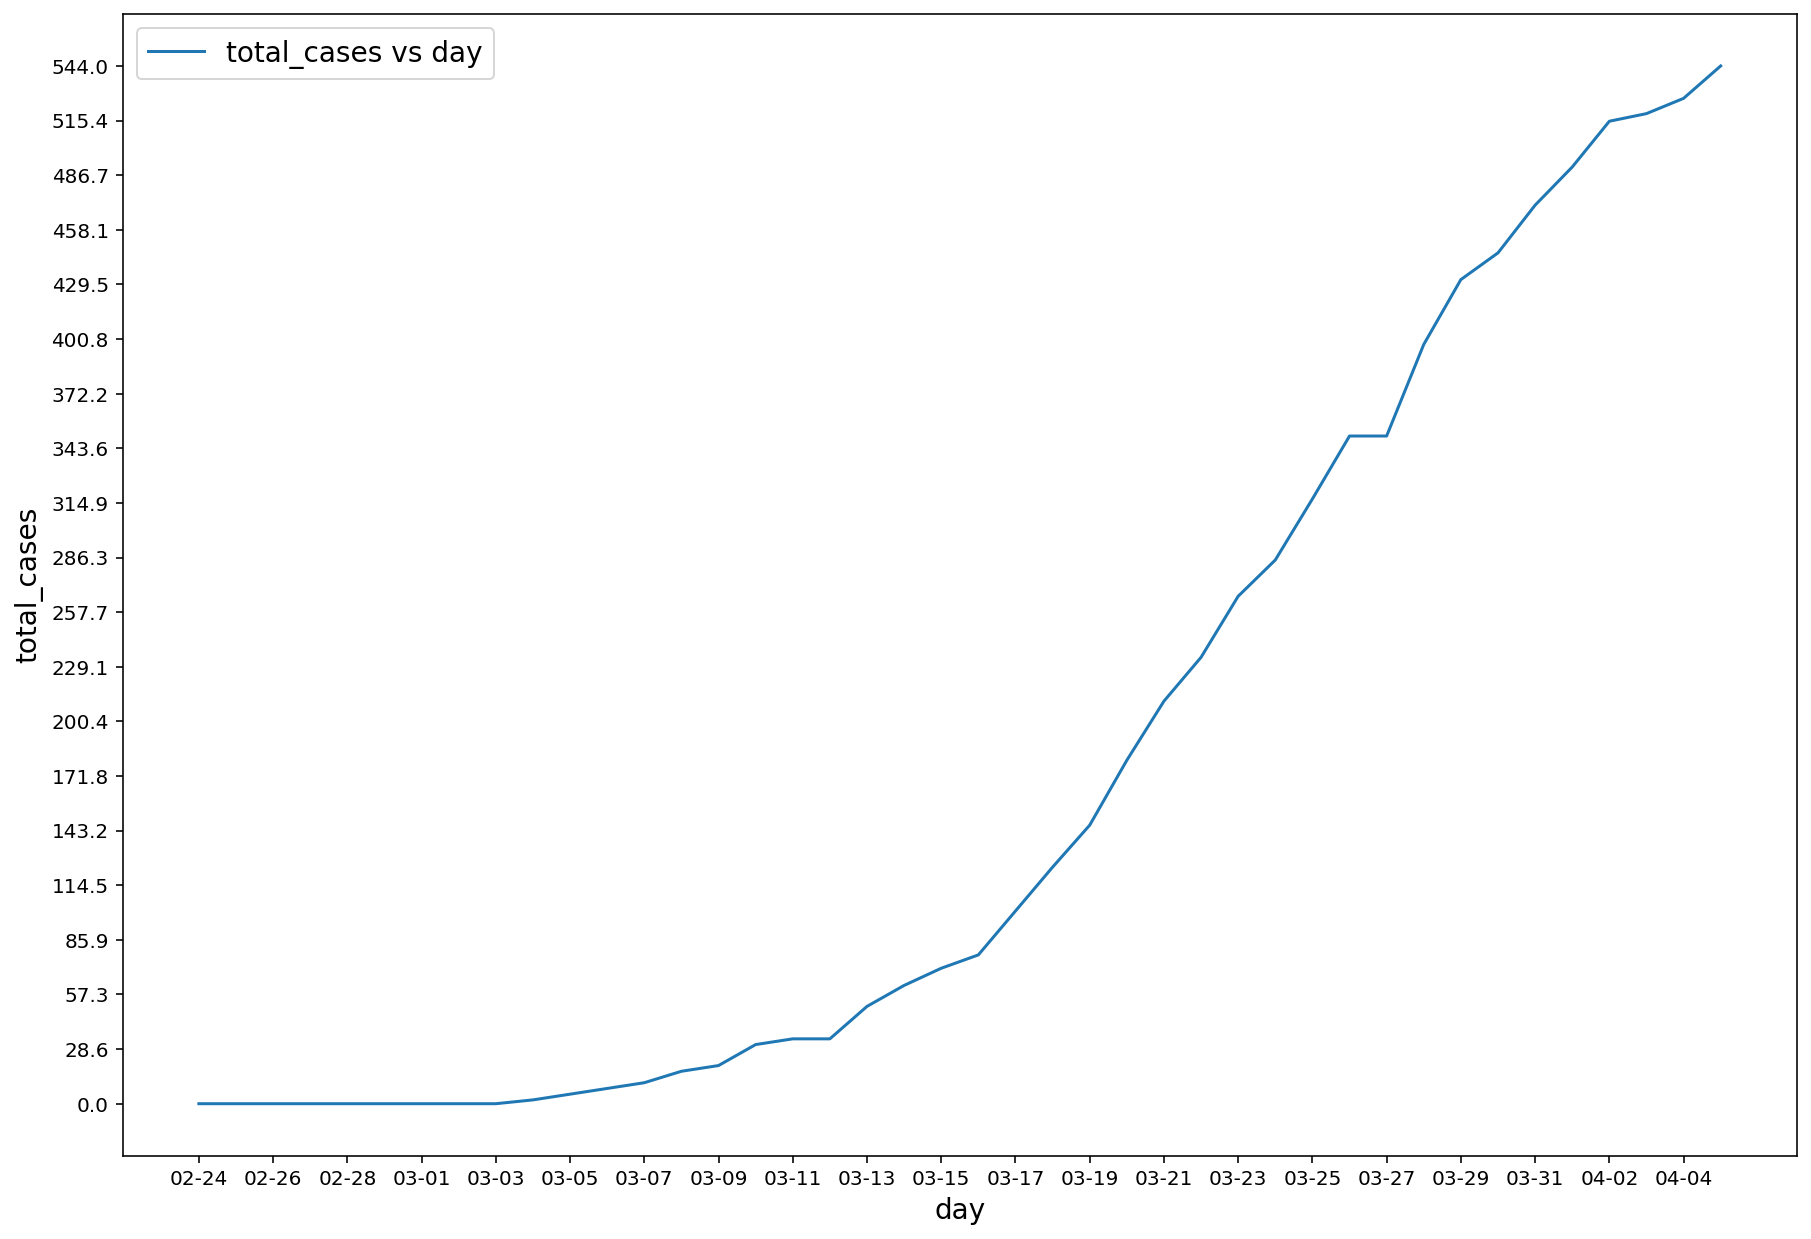

[]

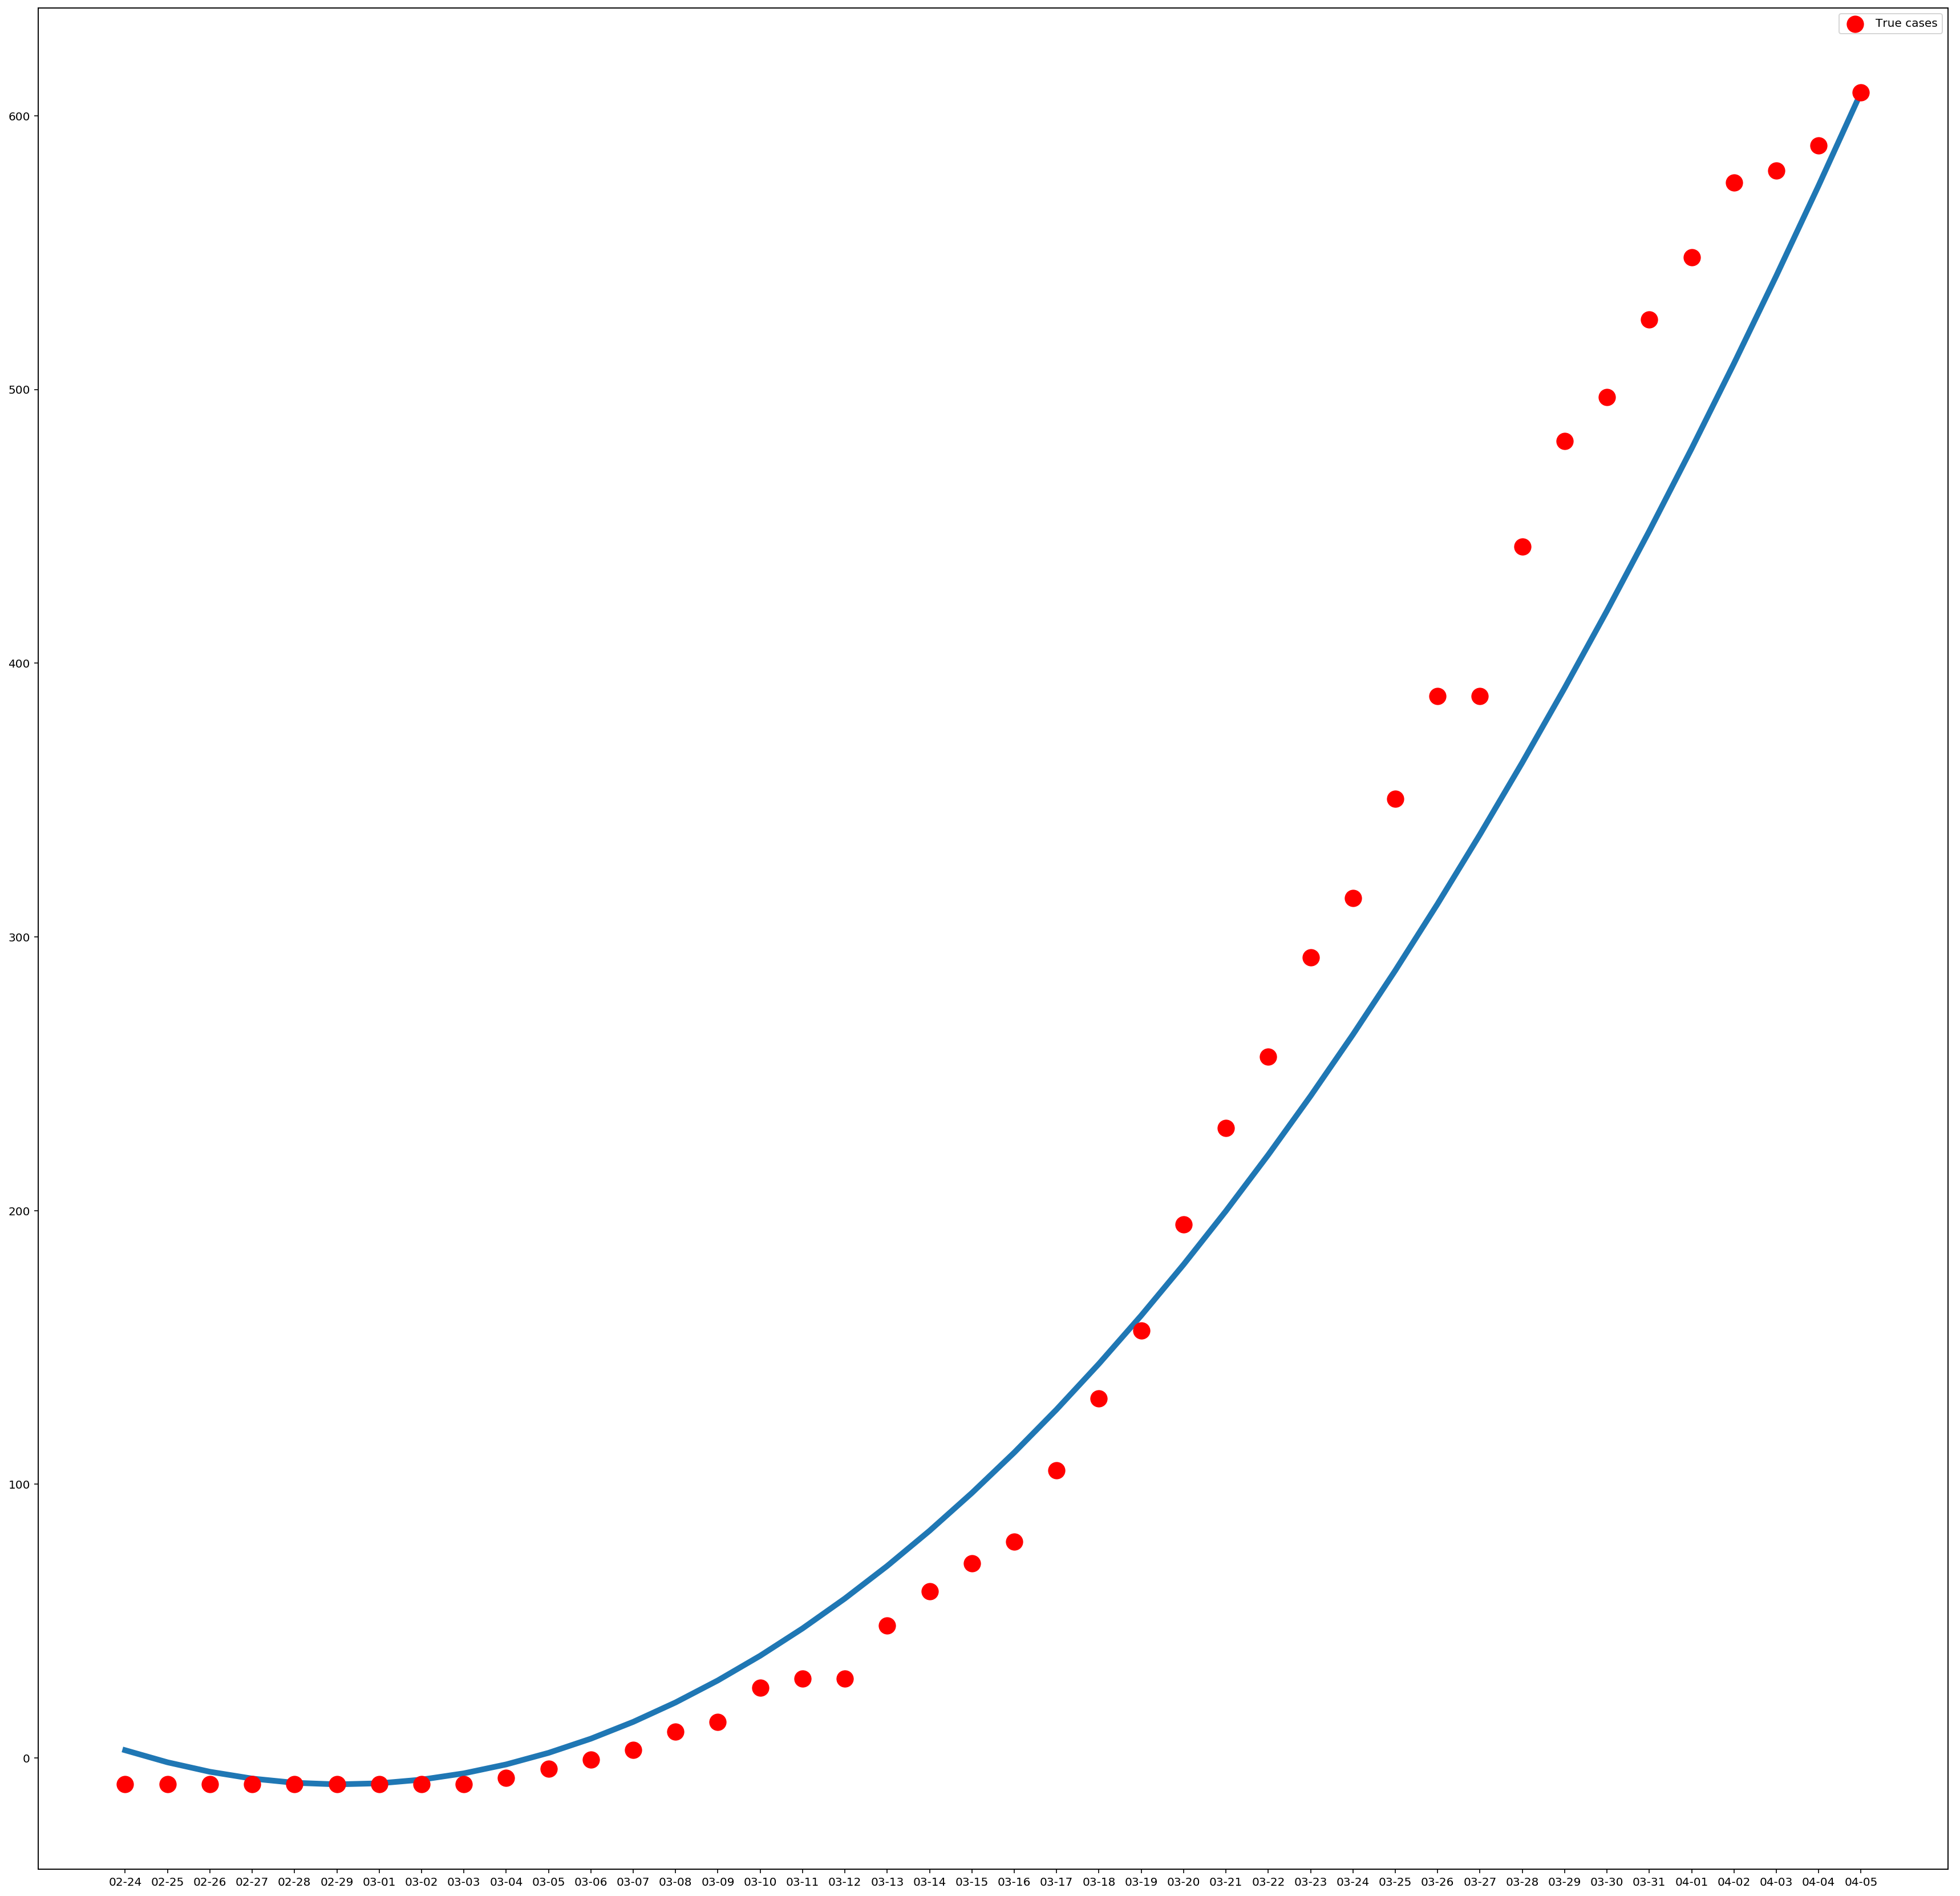

In [26]:
   #CELLA DA ELIMINARE
    
pisa=get_province('Pisa',provinces)
plot_df(pisa,'day','total_cases')
p=PolynomialFeatures(degree=2,include_bias=False)
y=pisa['total_cases']
X=np.arange(0,len(y)).reshape(-1,1)
X_pol=p.fit_transform(X)
lr=LinearRegression()
lr.fit(X_pol,y)
fig=plt.figure(figsize=(30,30))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
ax2.scatter(pisa['day'],pisa['total_cases'],c='r',label='True cases',s=200)
#x=np.arange(0,n_obs)
#fun=lr.coef_[0]*x+lr.coef_[1]*x**2+lr.intercept_
ax1.plot(lr.predict(X_pol),label='approximation',linewidth=5)
plt.legend(loc='best')
ax2.set_yticks([])
#ax2.set_xticks([])


In [27]:
#OLD

#def plot_approx(area,asc,ords,degree=2):
#    p=PolynomialFeatures(degree=degree,include_bias=False)
#    y=area[ords]
#    if asc=='day':
#        X=np.arange(0,len(y)).reshape(-1,1)
#    else:
#        X=area[asc].to_numpy().reshape(-1,1)
#    X_pol=p.fit_transform(X)
#    lr=LinearRegression()
#    lr.fit(X_pol,y)
#    plt.clf()
#    fig=plt.figure(figsize=(30,30))
#    ax1=fig.add_subplot(111)
#    ax2=ax1.twinx()
#    ax2.scatter(area[asc],area[ords],c='r',label='True values',s=200)
#    ax1.plot(X,lr.predict(X_pol),label='approximation',linewidth=5)
#    plt.legend(loc='upper left', fontsize="large")
#    ax2.set_yticks([])
#plot_approx(get_province('Pisa',provinces), "day", "total_cases")

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

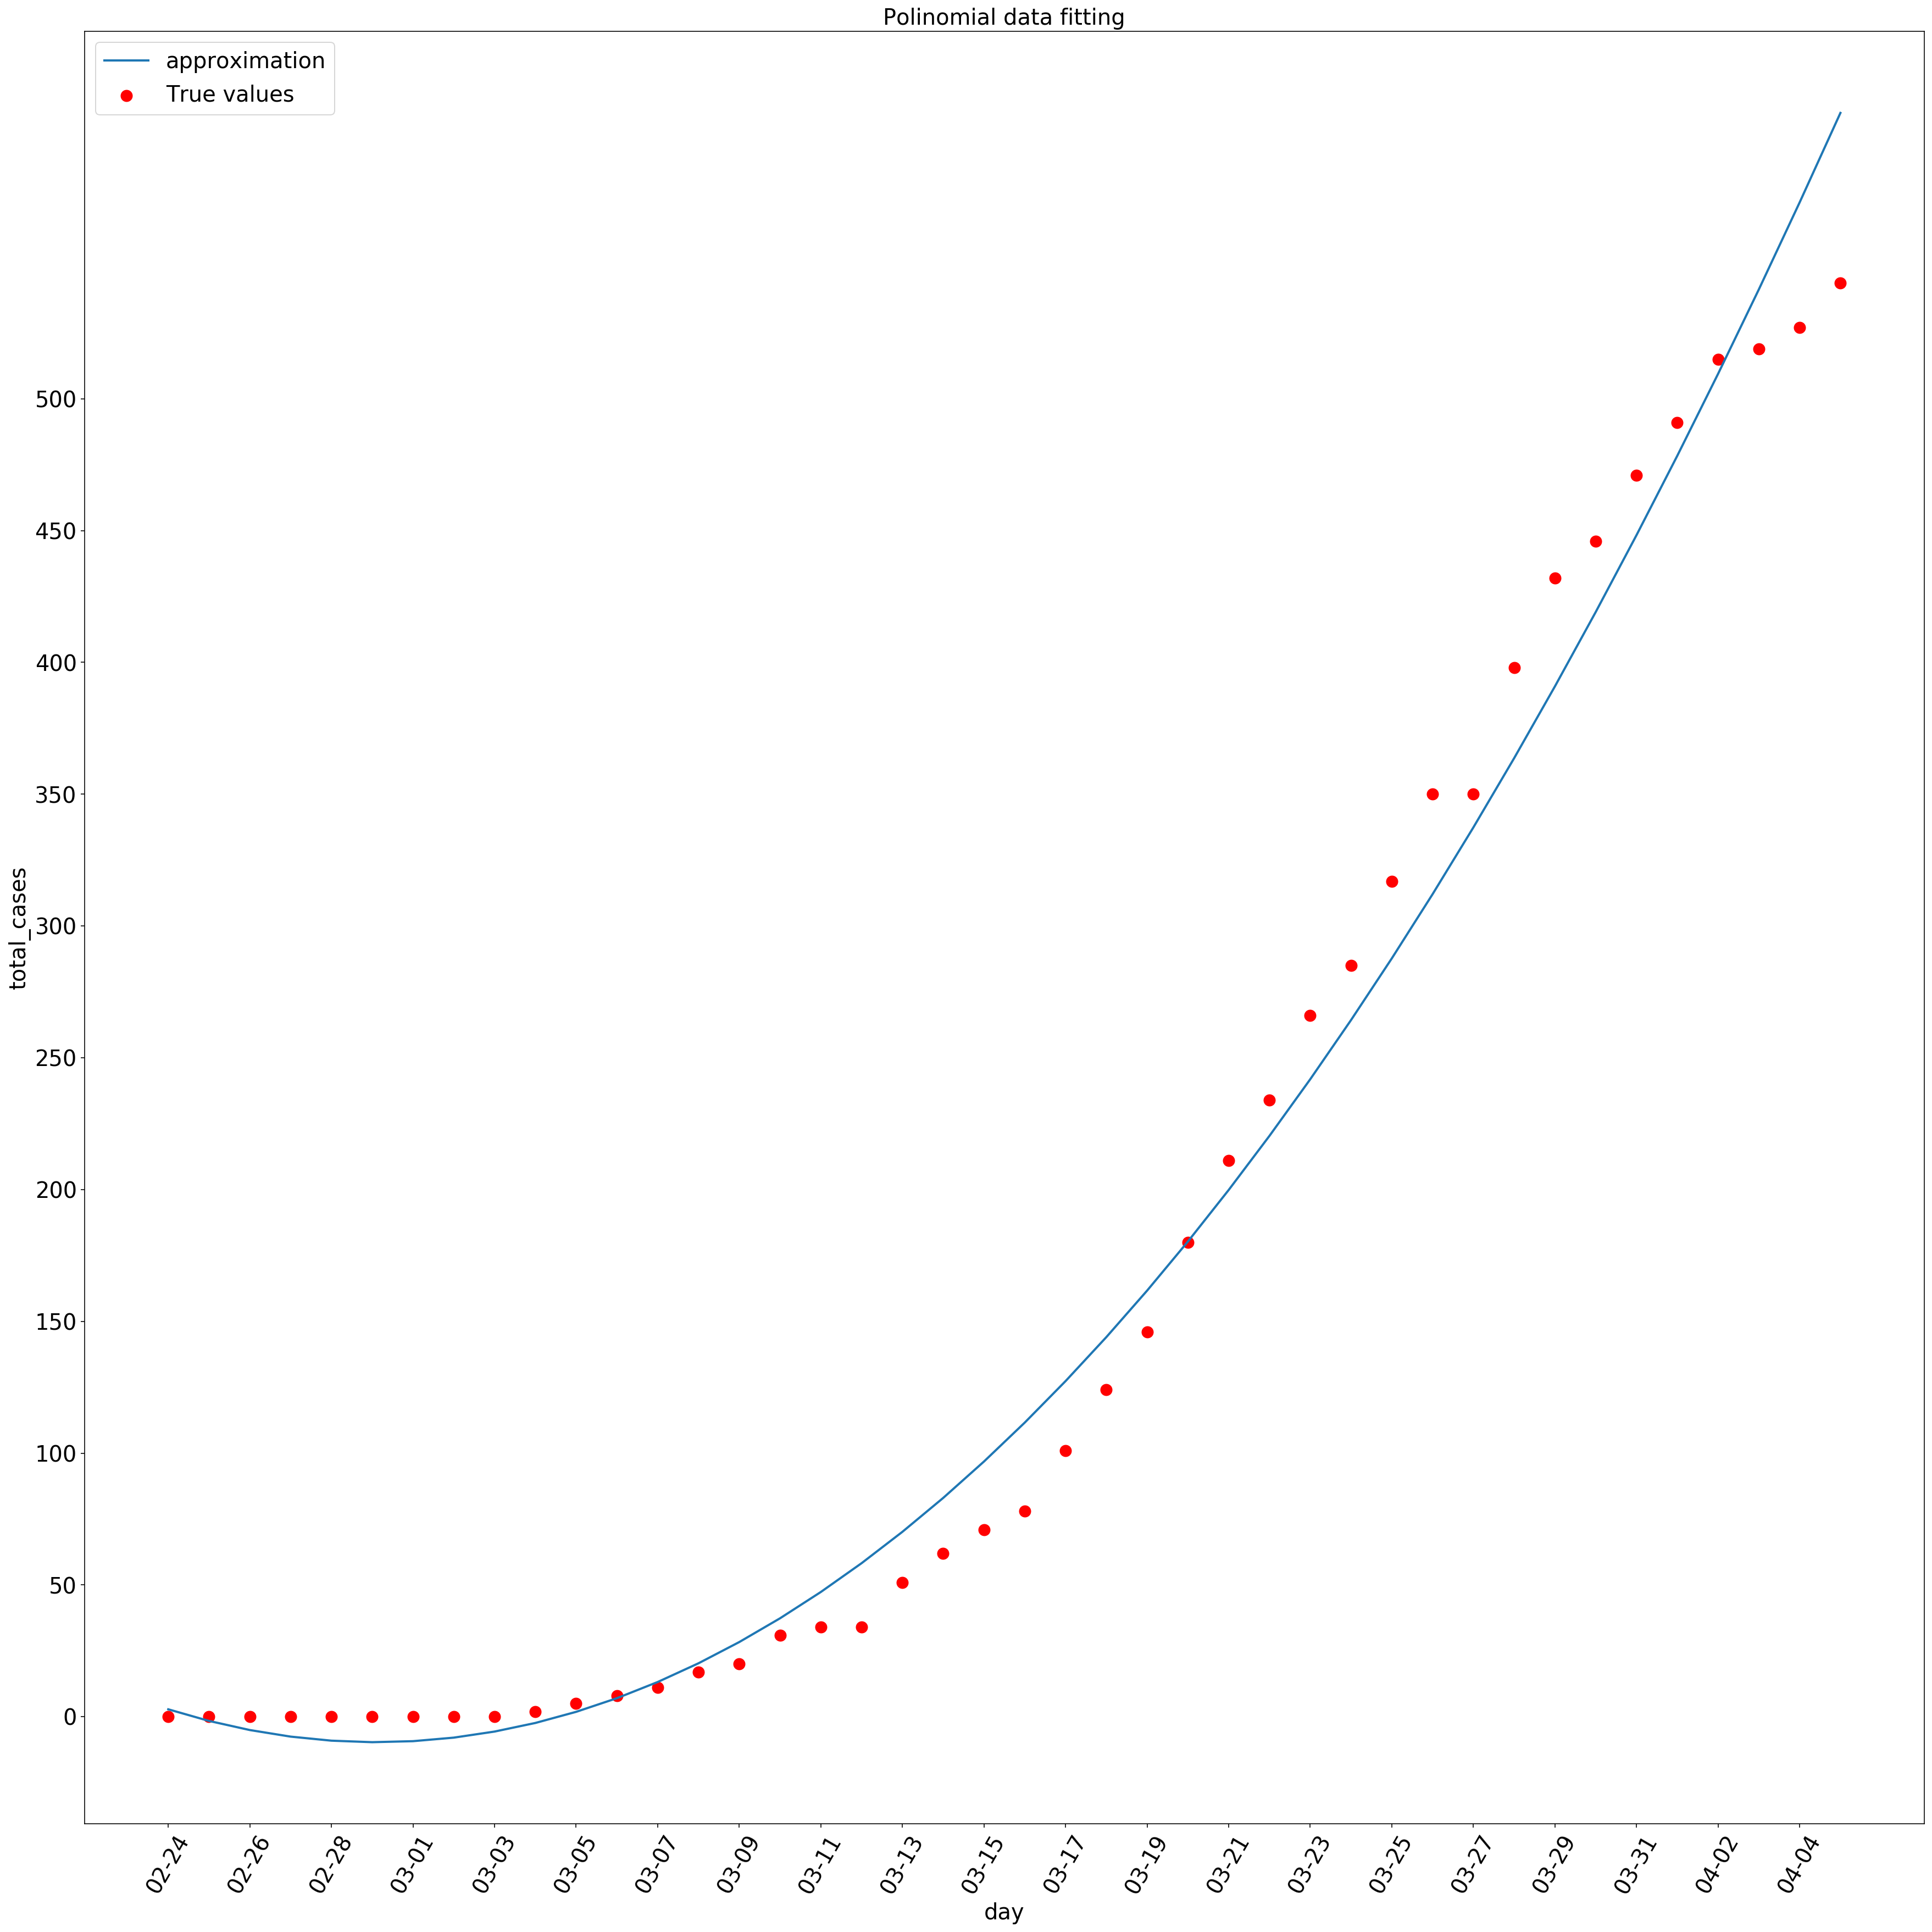

In [28]:
#Remind: quando chiamiamo questa funzione al posto del parametro "area" dobbiamo mettere un database
#generato da una funzione get, non uno di quelli originali. Esempio:
#plot_approx(get_province('Pisa',provinces), "day", "total_cases")
def plot_approx(area,asc,ords,degree=2,size=(30,30), plot=True):
    p=PolynomialFeatures(degree=degree,include_bias=False)
    y=area[ords]
    if asc=='day':
        X=np.arange(0,len(y)).reshape(-1,1)
    else:
        X=area[asc].to_numpy().reshape(-1,1)
    if plot:
        X_pol=p.fit_transform(X)
        lr=LinearRegression()
        lr.fit(X_pol,y)
        plt.clf()
        fig=plt.figure(figsize=size)
        plt.scatter(area[asc],area[ords],c='r',label='True values',s=100)
        ax1=plt.plot(X,lr.predict(X_pol),label='approximation',linewidth=2)
        plt.ylabel(ords, fontsize=20)
        plt.xlabel(asc, fontsize=20)
        plt.title('Polinomial data fitting', fontsize=20)
        plt.legend(loc='upper left', fontsize=20)
        plt.xticks(np.arange(len(X))[::2],fontsize=20, rotation=60)
        maxim=max(area[ords])
        step=maxim//10
        step=step-step%10
        plt.yticks(np.arange(maxim, step=step), fontsize=20)
    return X,y
x,y=plot_approx(get_province('Pisa',provinces), "day", "total_cases")

The training error is:  65.37918089523309
The validation error is:  75.02514688018707


(65.37918089523309, 75.02514688018707)

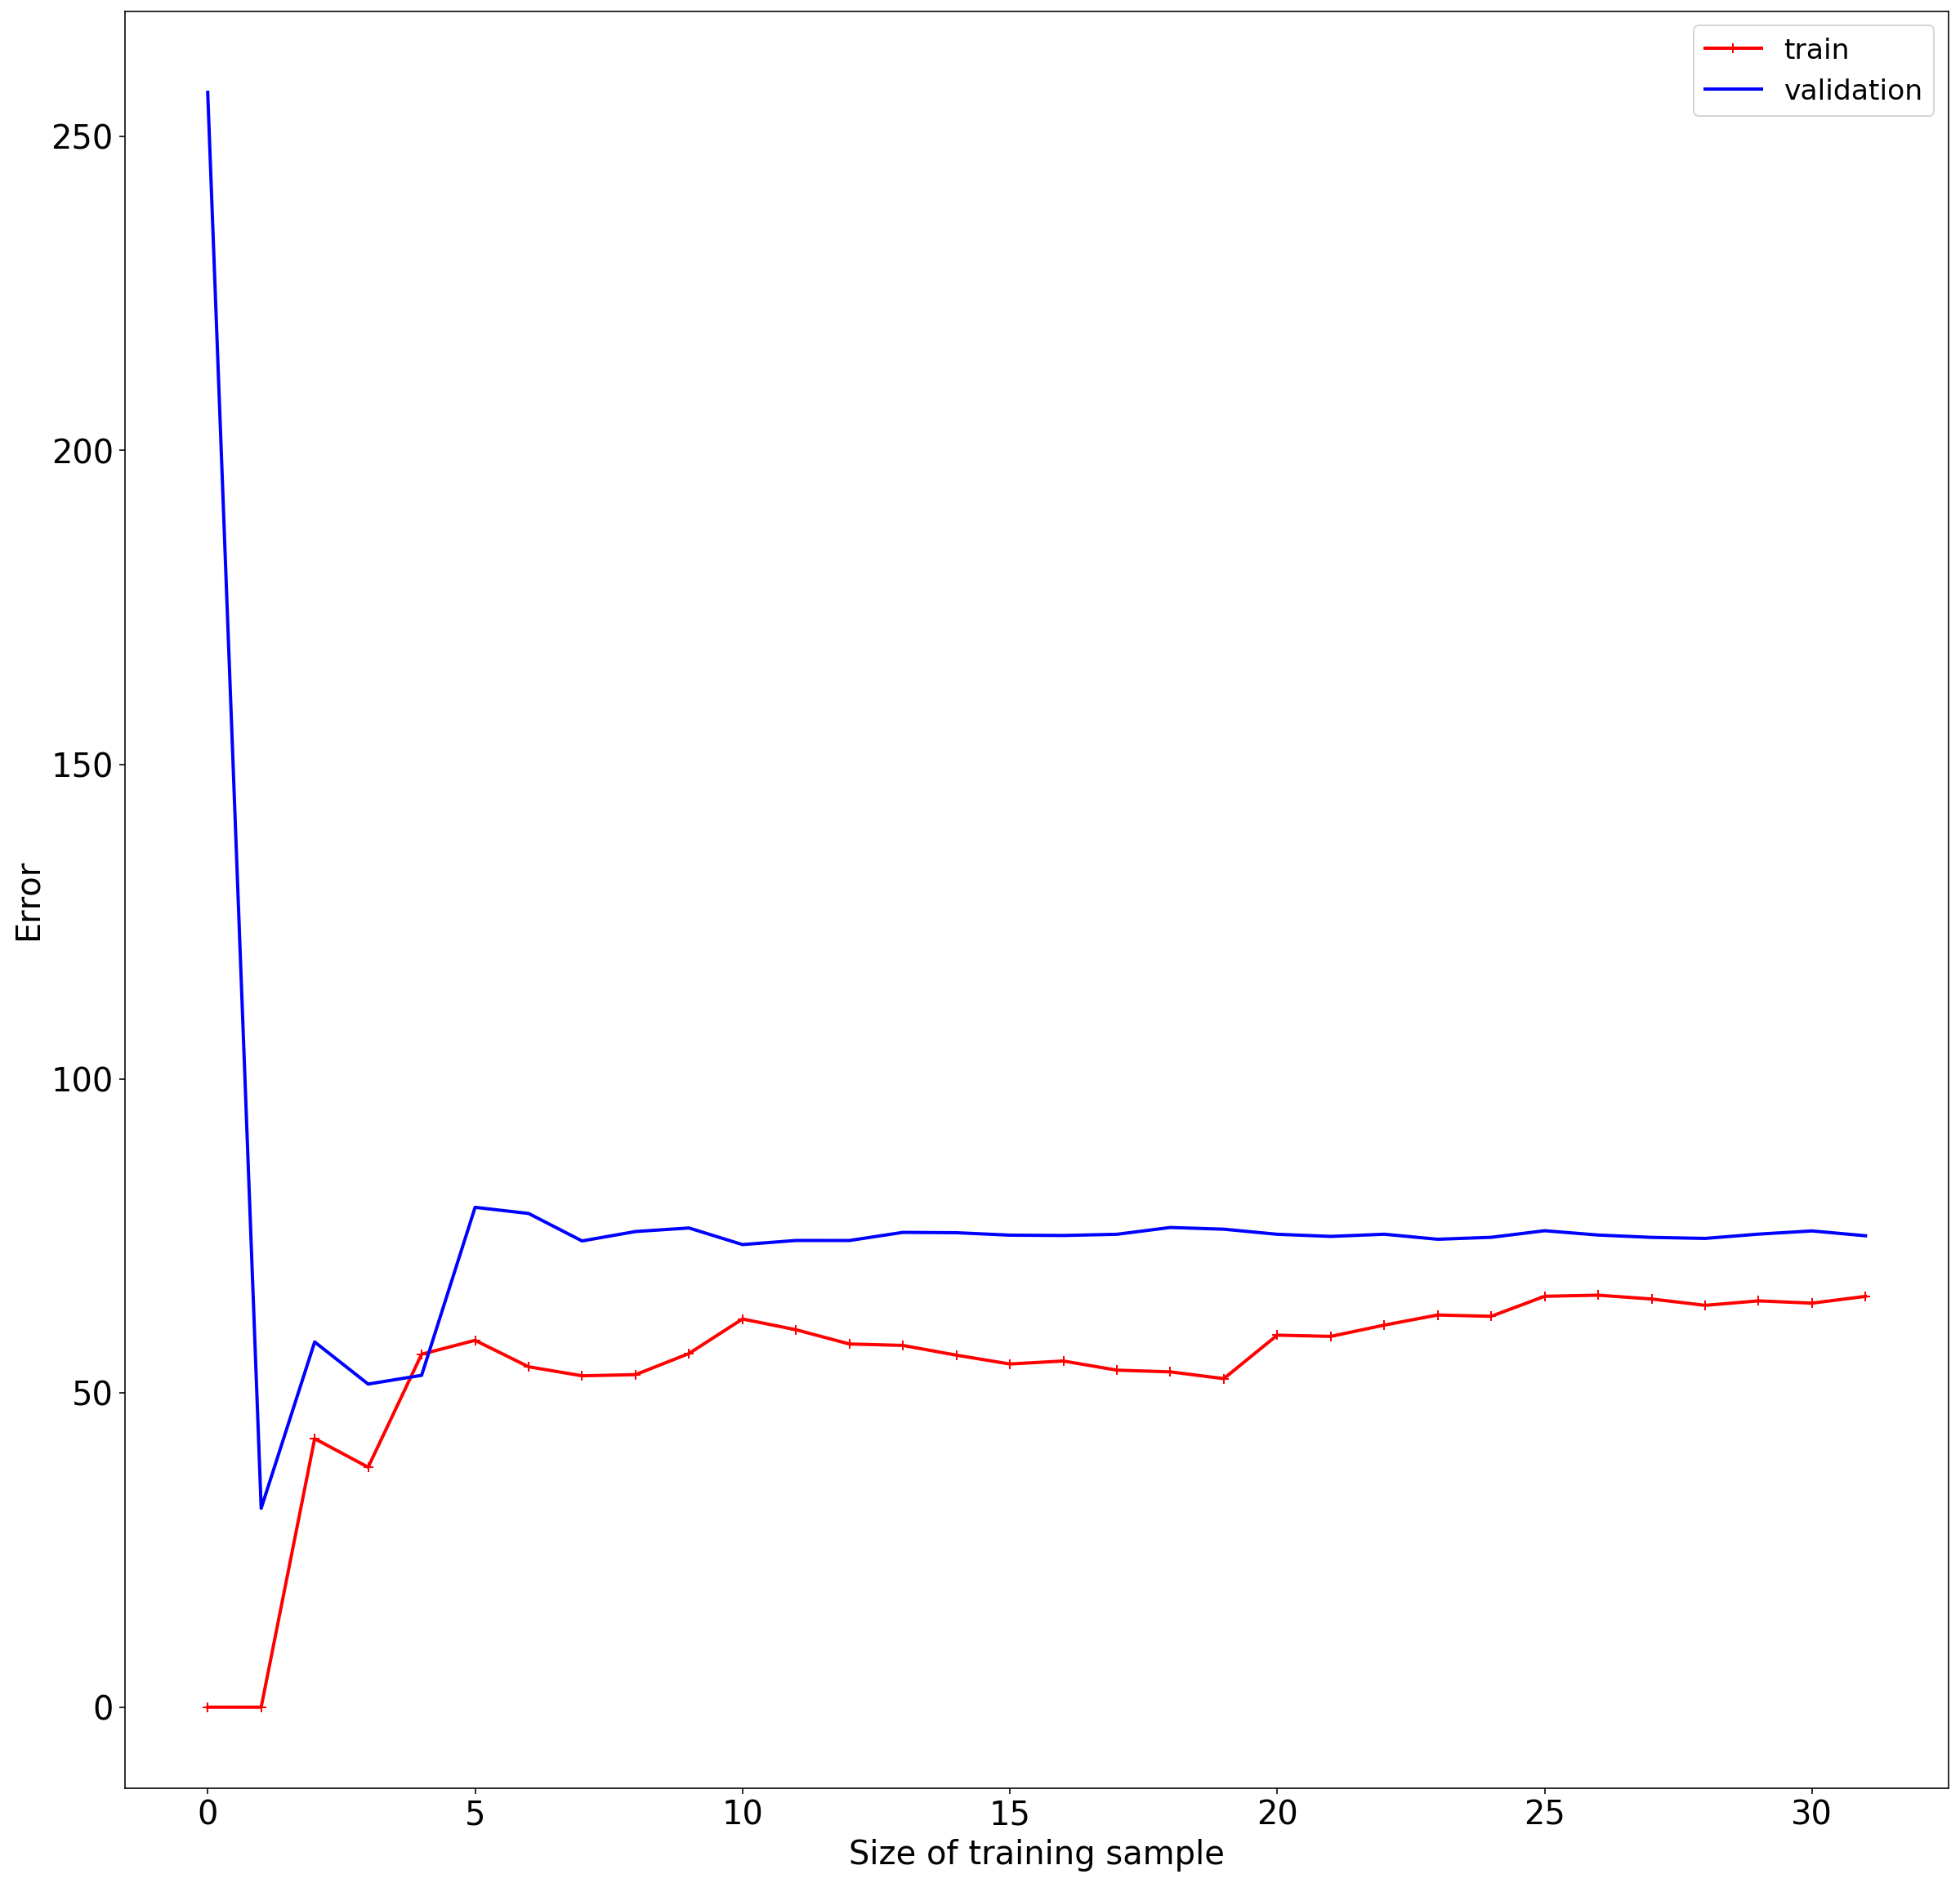

In [29]:
lr=LinearRegression()
plot_learning_curves(lr,X,y)


Now we will try to check which is the best degree for approximating these data

In [30]:
#OLD 
#    for i in range(10):
#        pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
#        if i==1 or i==5 or i==9:
#            plt.figure()
#            plot_approx(Lom,'ICU','total_cases',degree=i,  size=(20,20))
#            plt.title(f'Polynomial of degree {i}', size=20)
#            plot_learning_curves(pol_reg,X,y, size=(20,20))
#            plt.title(f'Learning curves, polynomial of degree {i}', size=20)

tr is:  5374.7459810151695
val is:  5647.278422690317
tr is:  2569.835714056321
val is:  2306.761741080108
tr is:  1632.2813820126462
val is:  3153.56289723942
tr is:  2110.2933001277697
val is:  663.8279843443016
tr is:  1736.5839066041053
val is:  976.7538222916758
tr is:  1942.2686094746828
val is:  1917.6949117158874
tr is:  1762.1663157338837
val is:  2268.3281986403476
tr is:  1420.8384112409508
val is:  883.0559781909867
tr is:  2161.216648096134
val is:  1518.4389321053488


3

<Figure size 432x288 with 0 Axes>

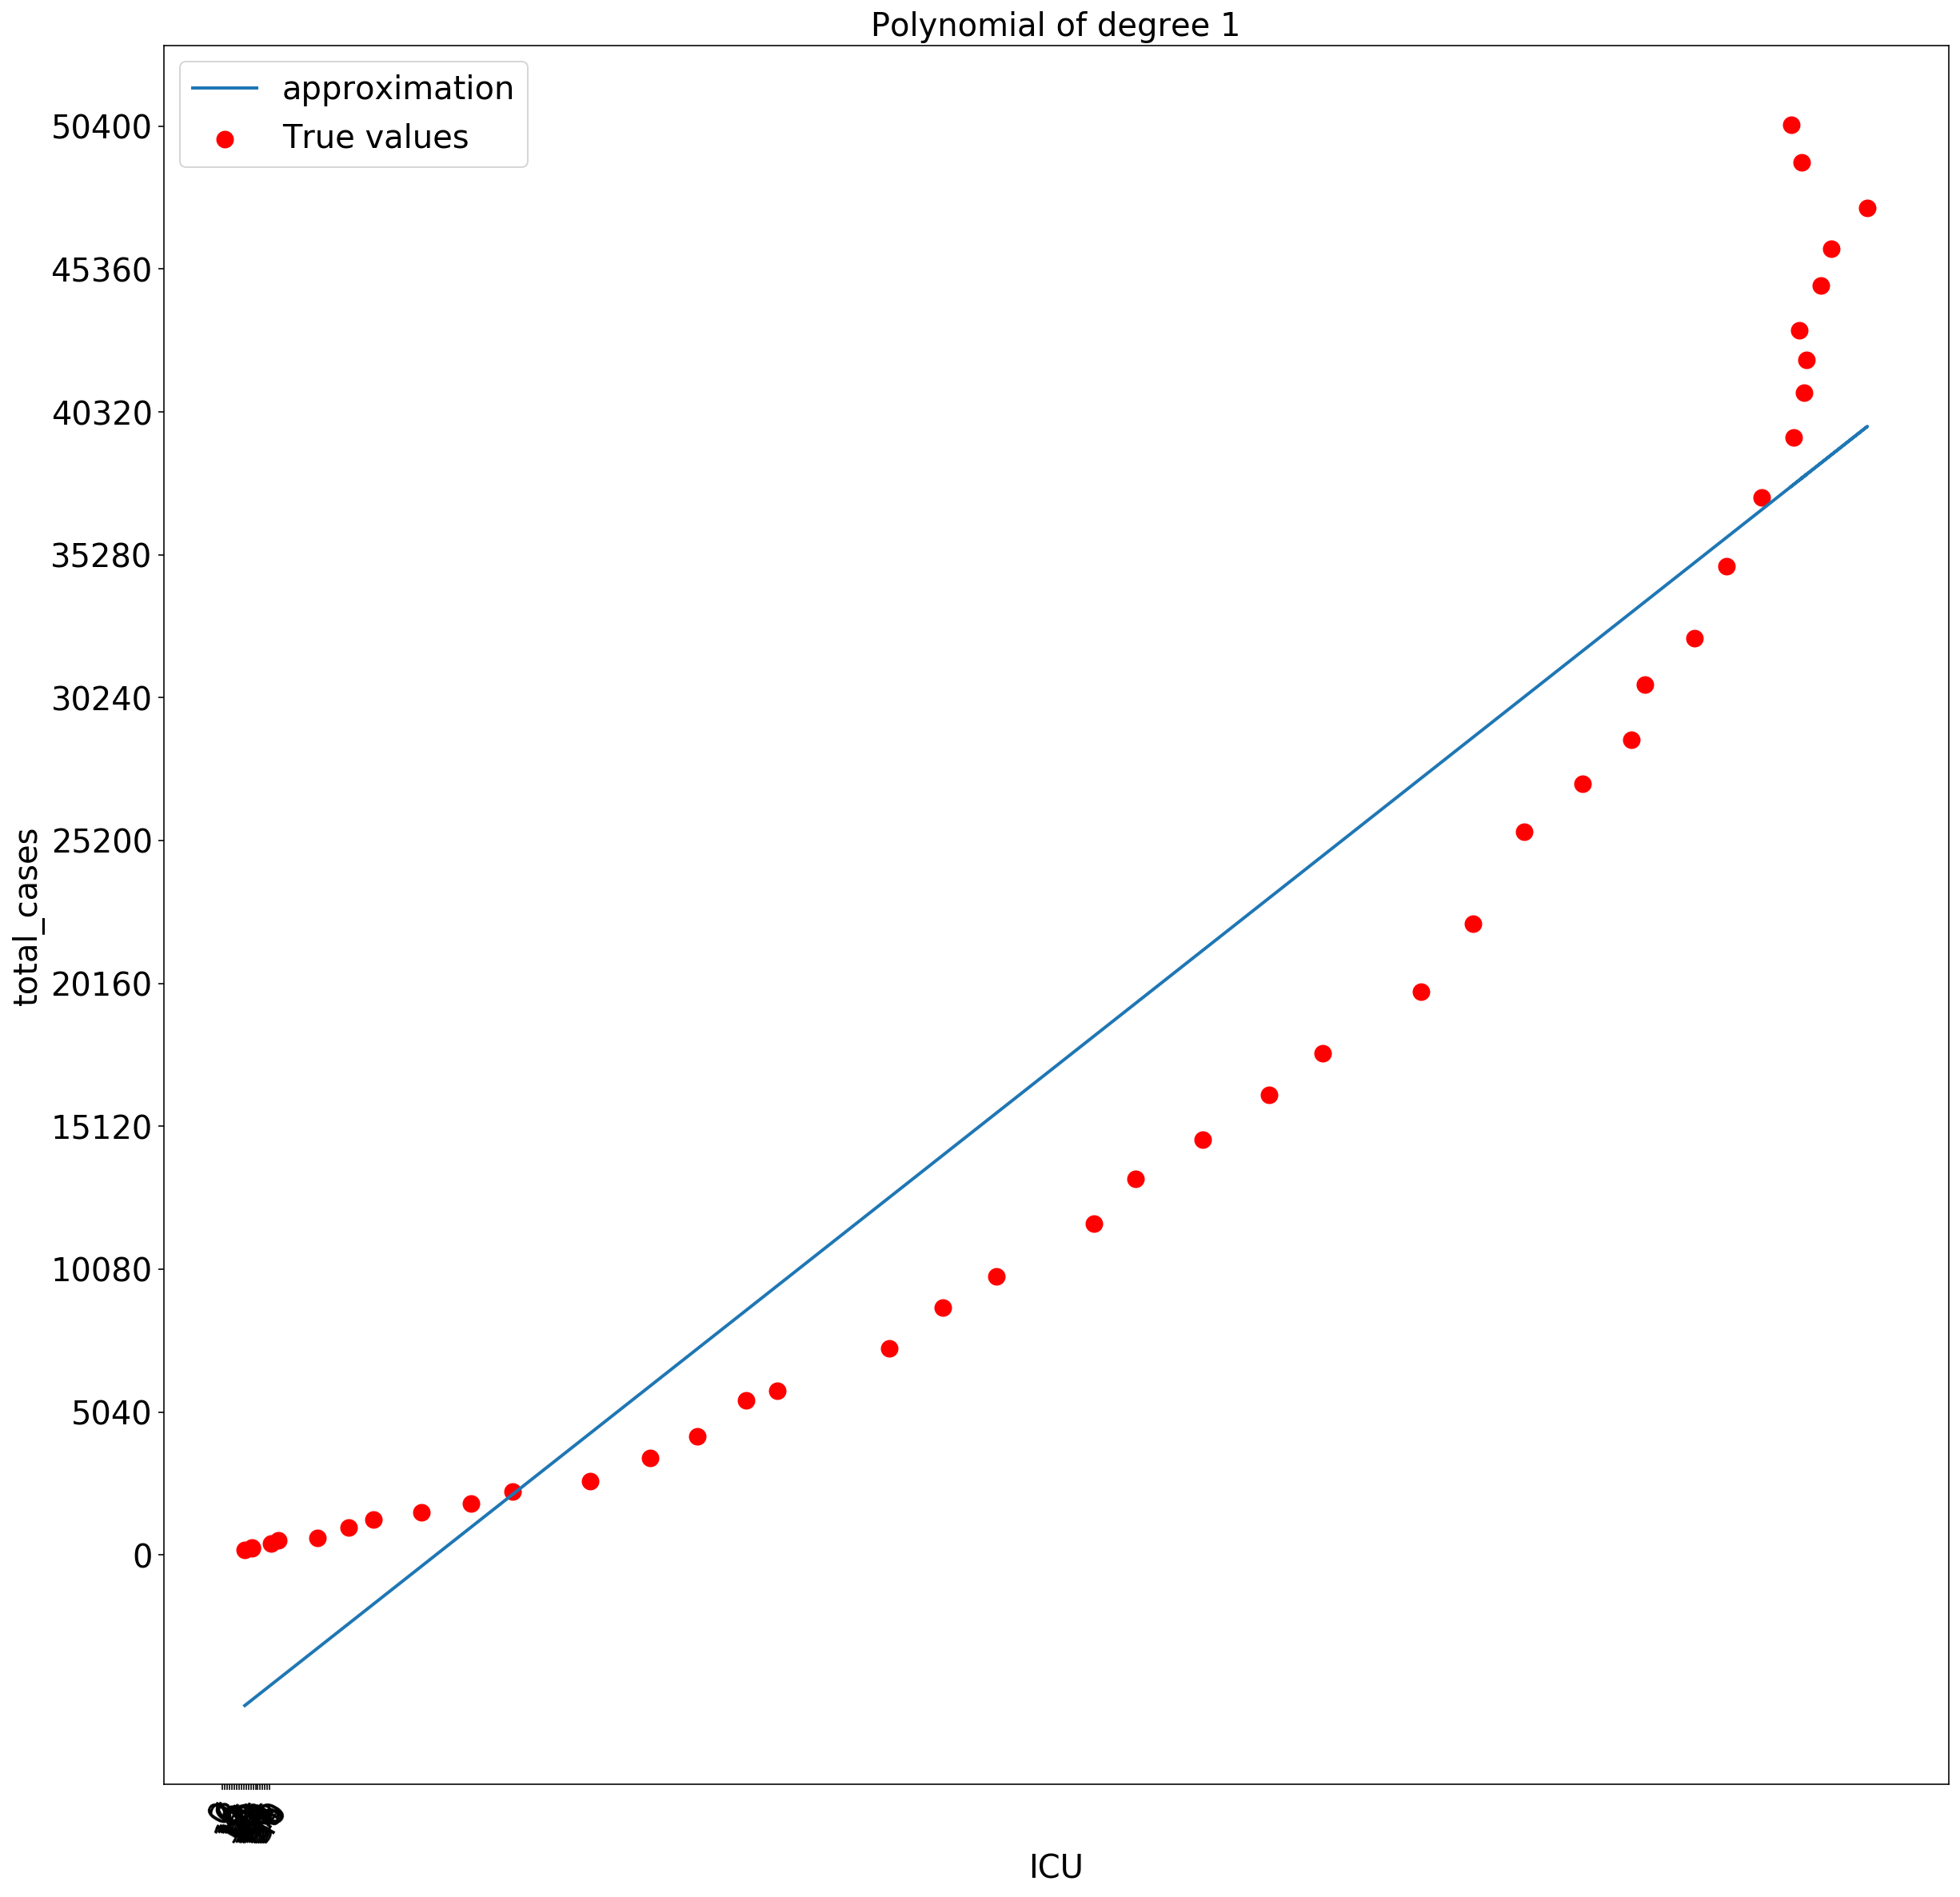

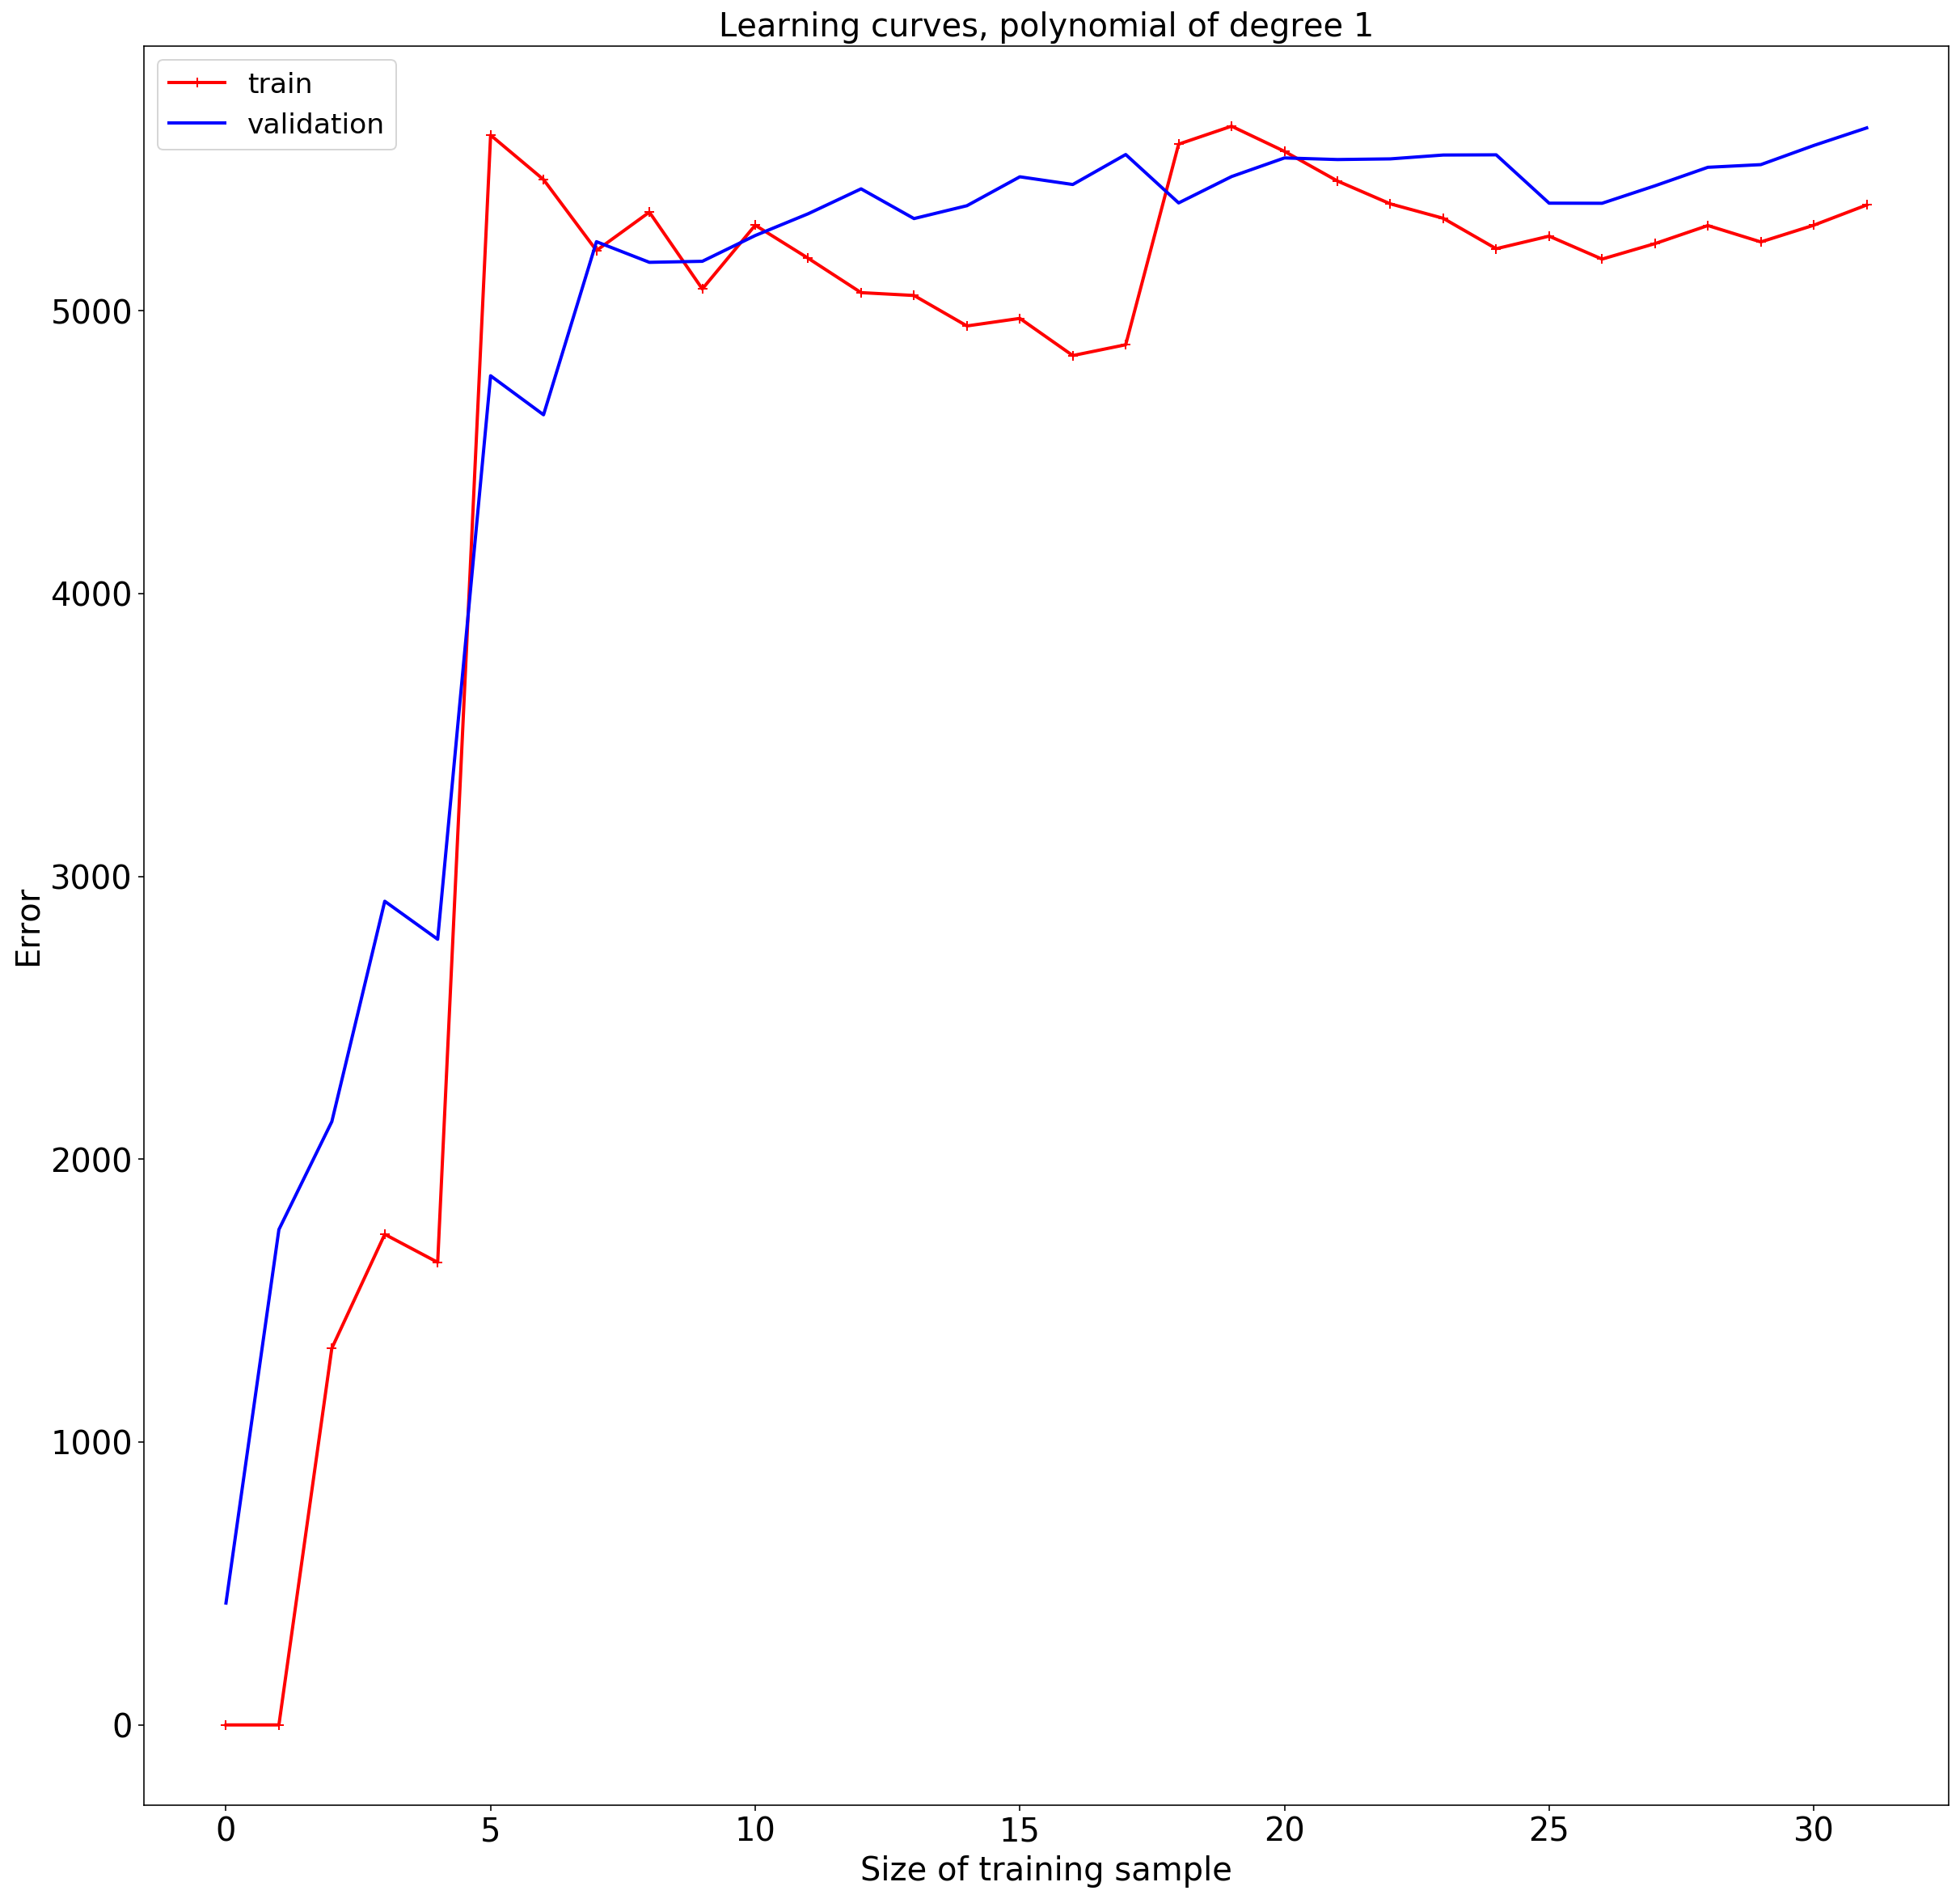

<Figure size 432x288 with 0 Axes>

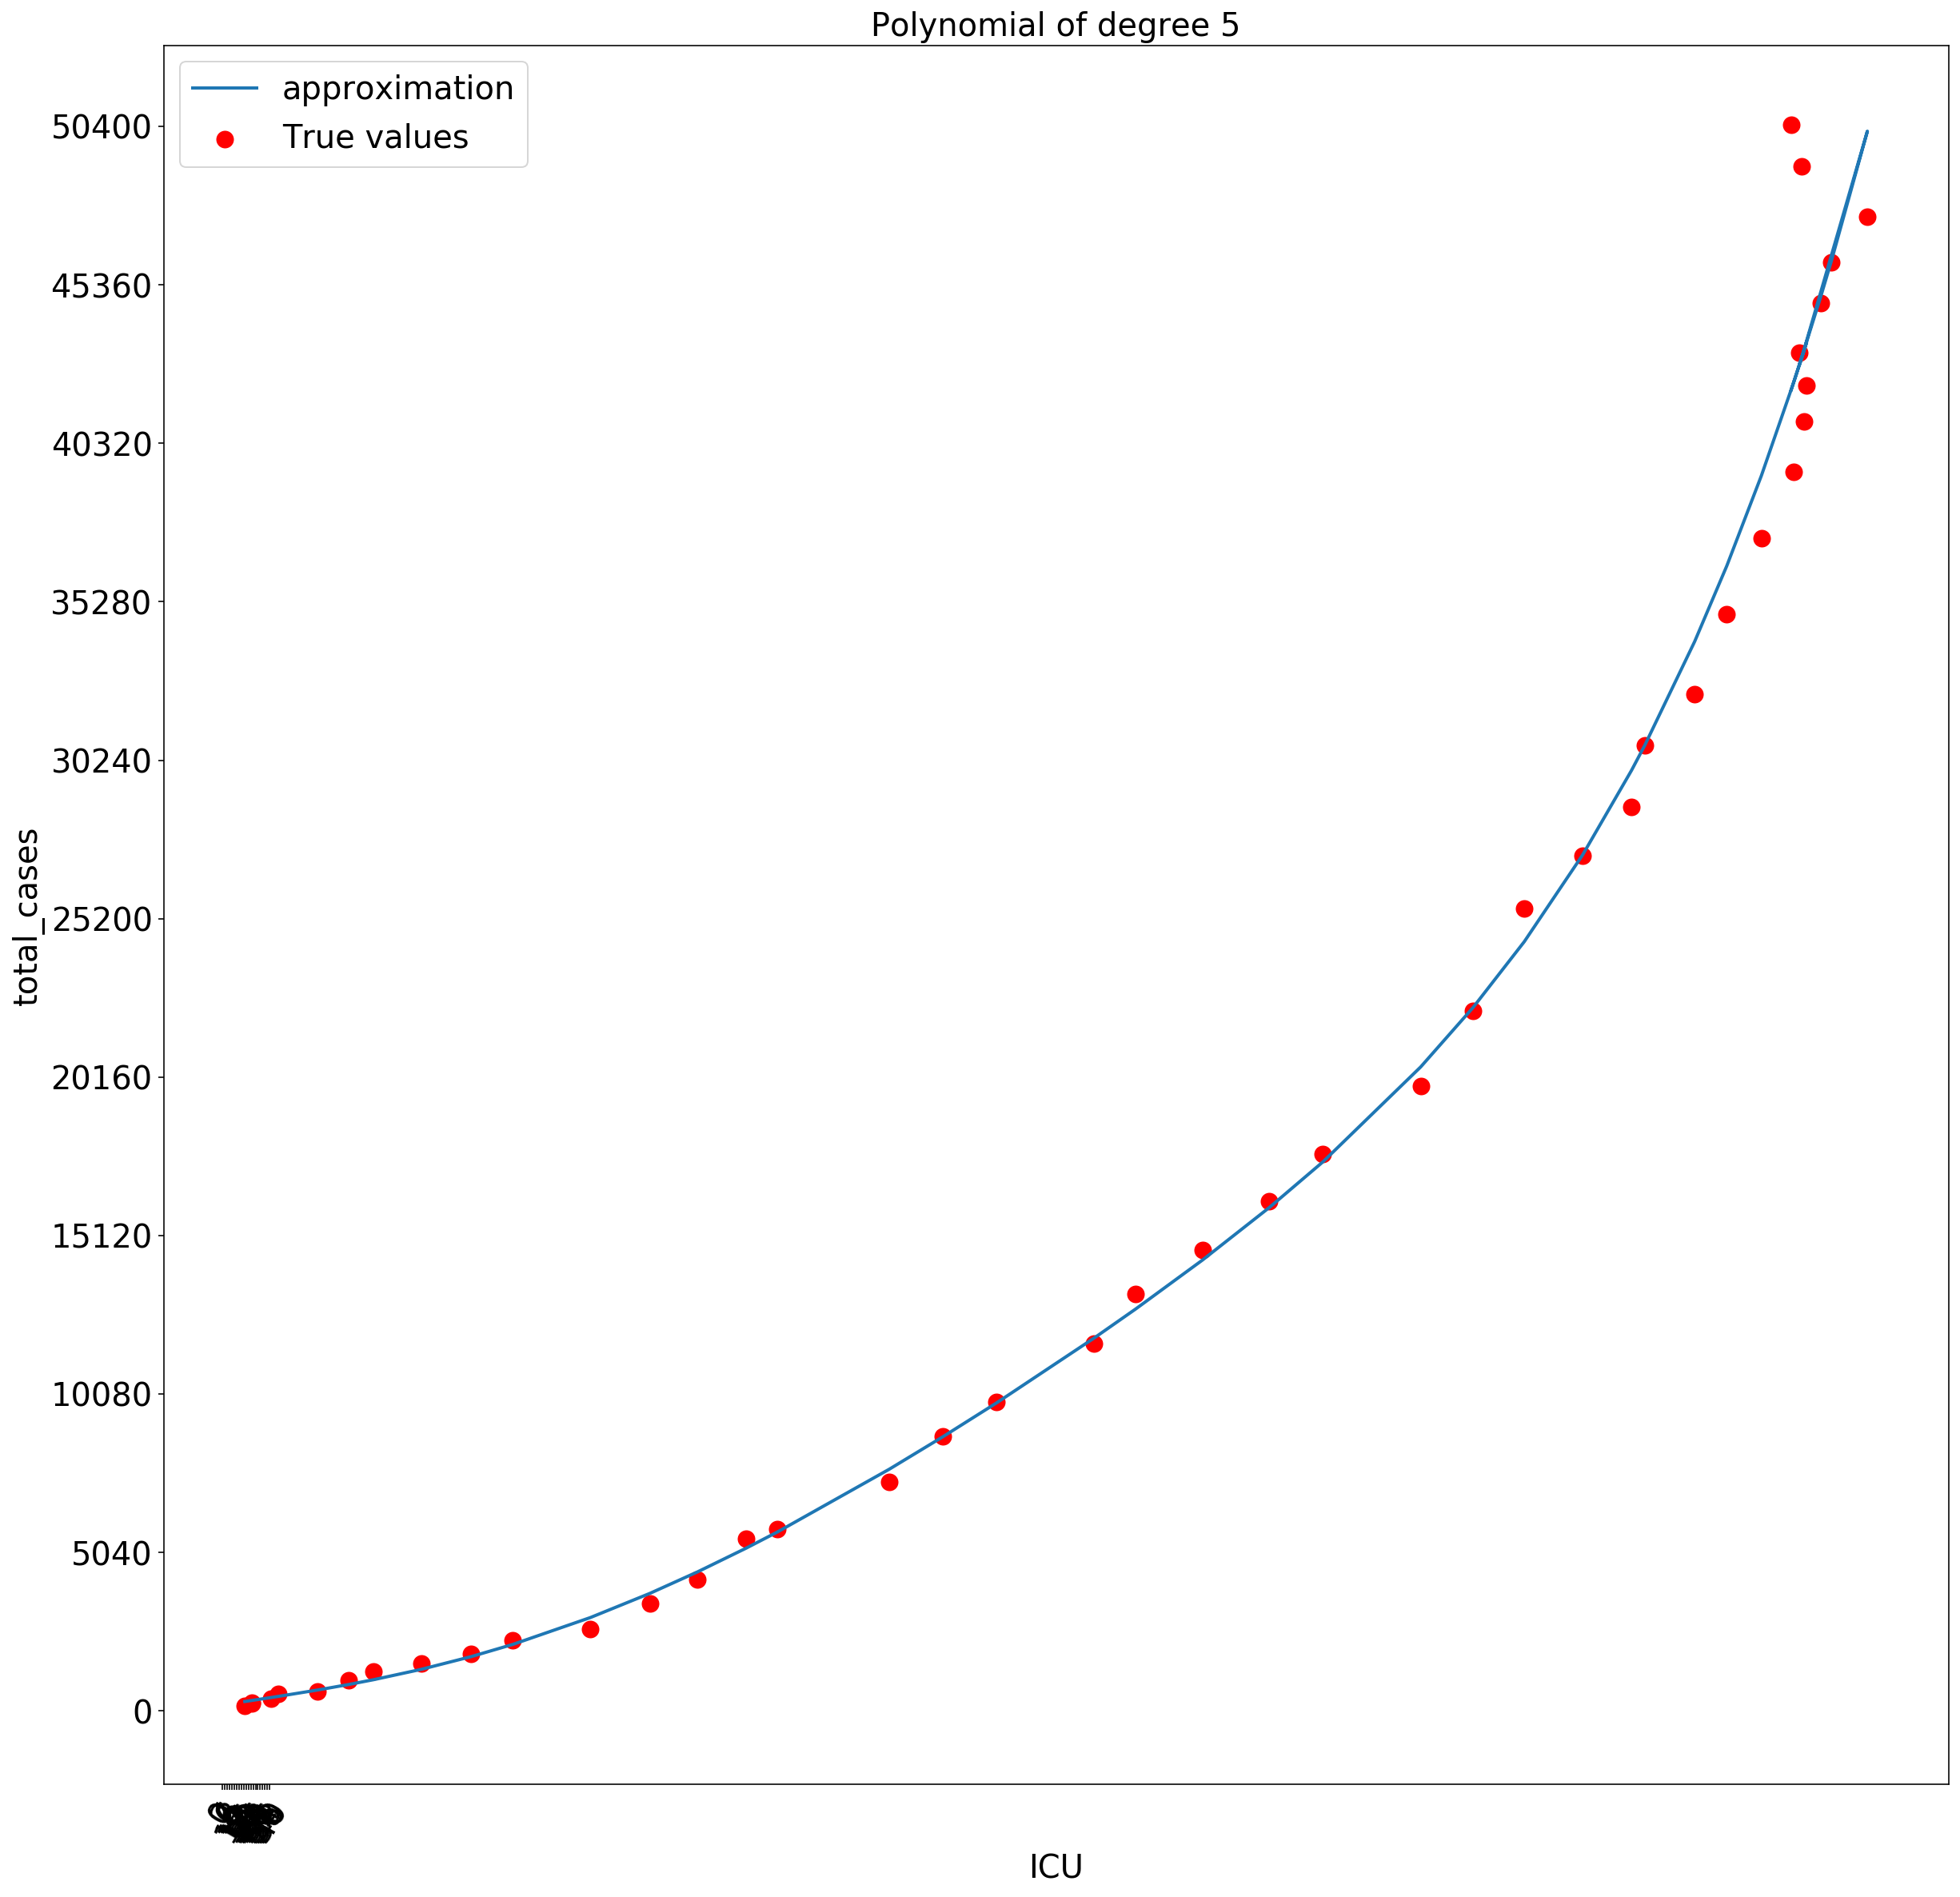

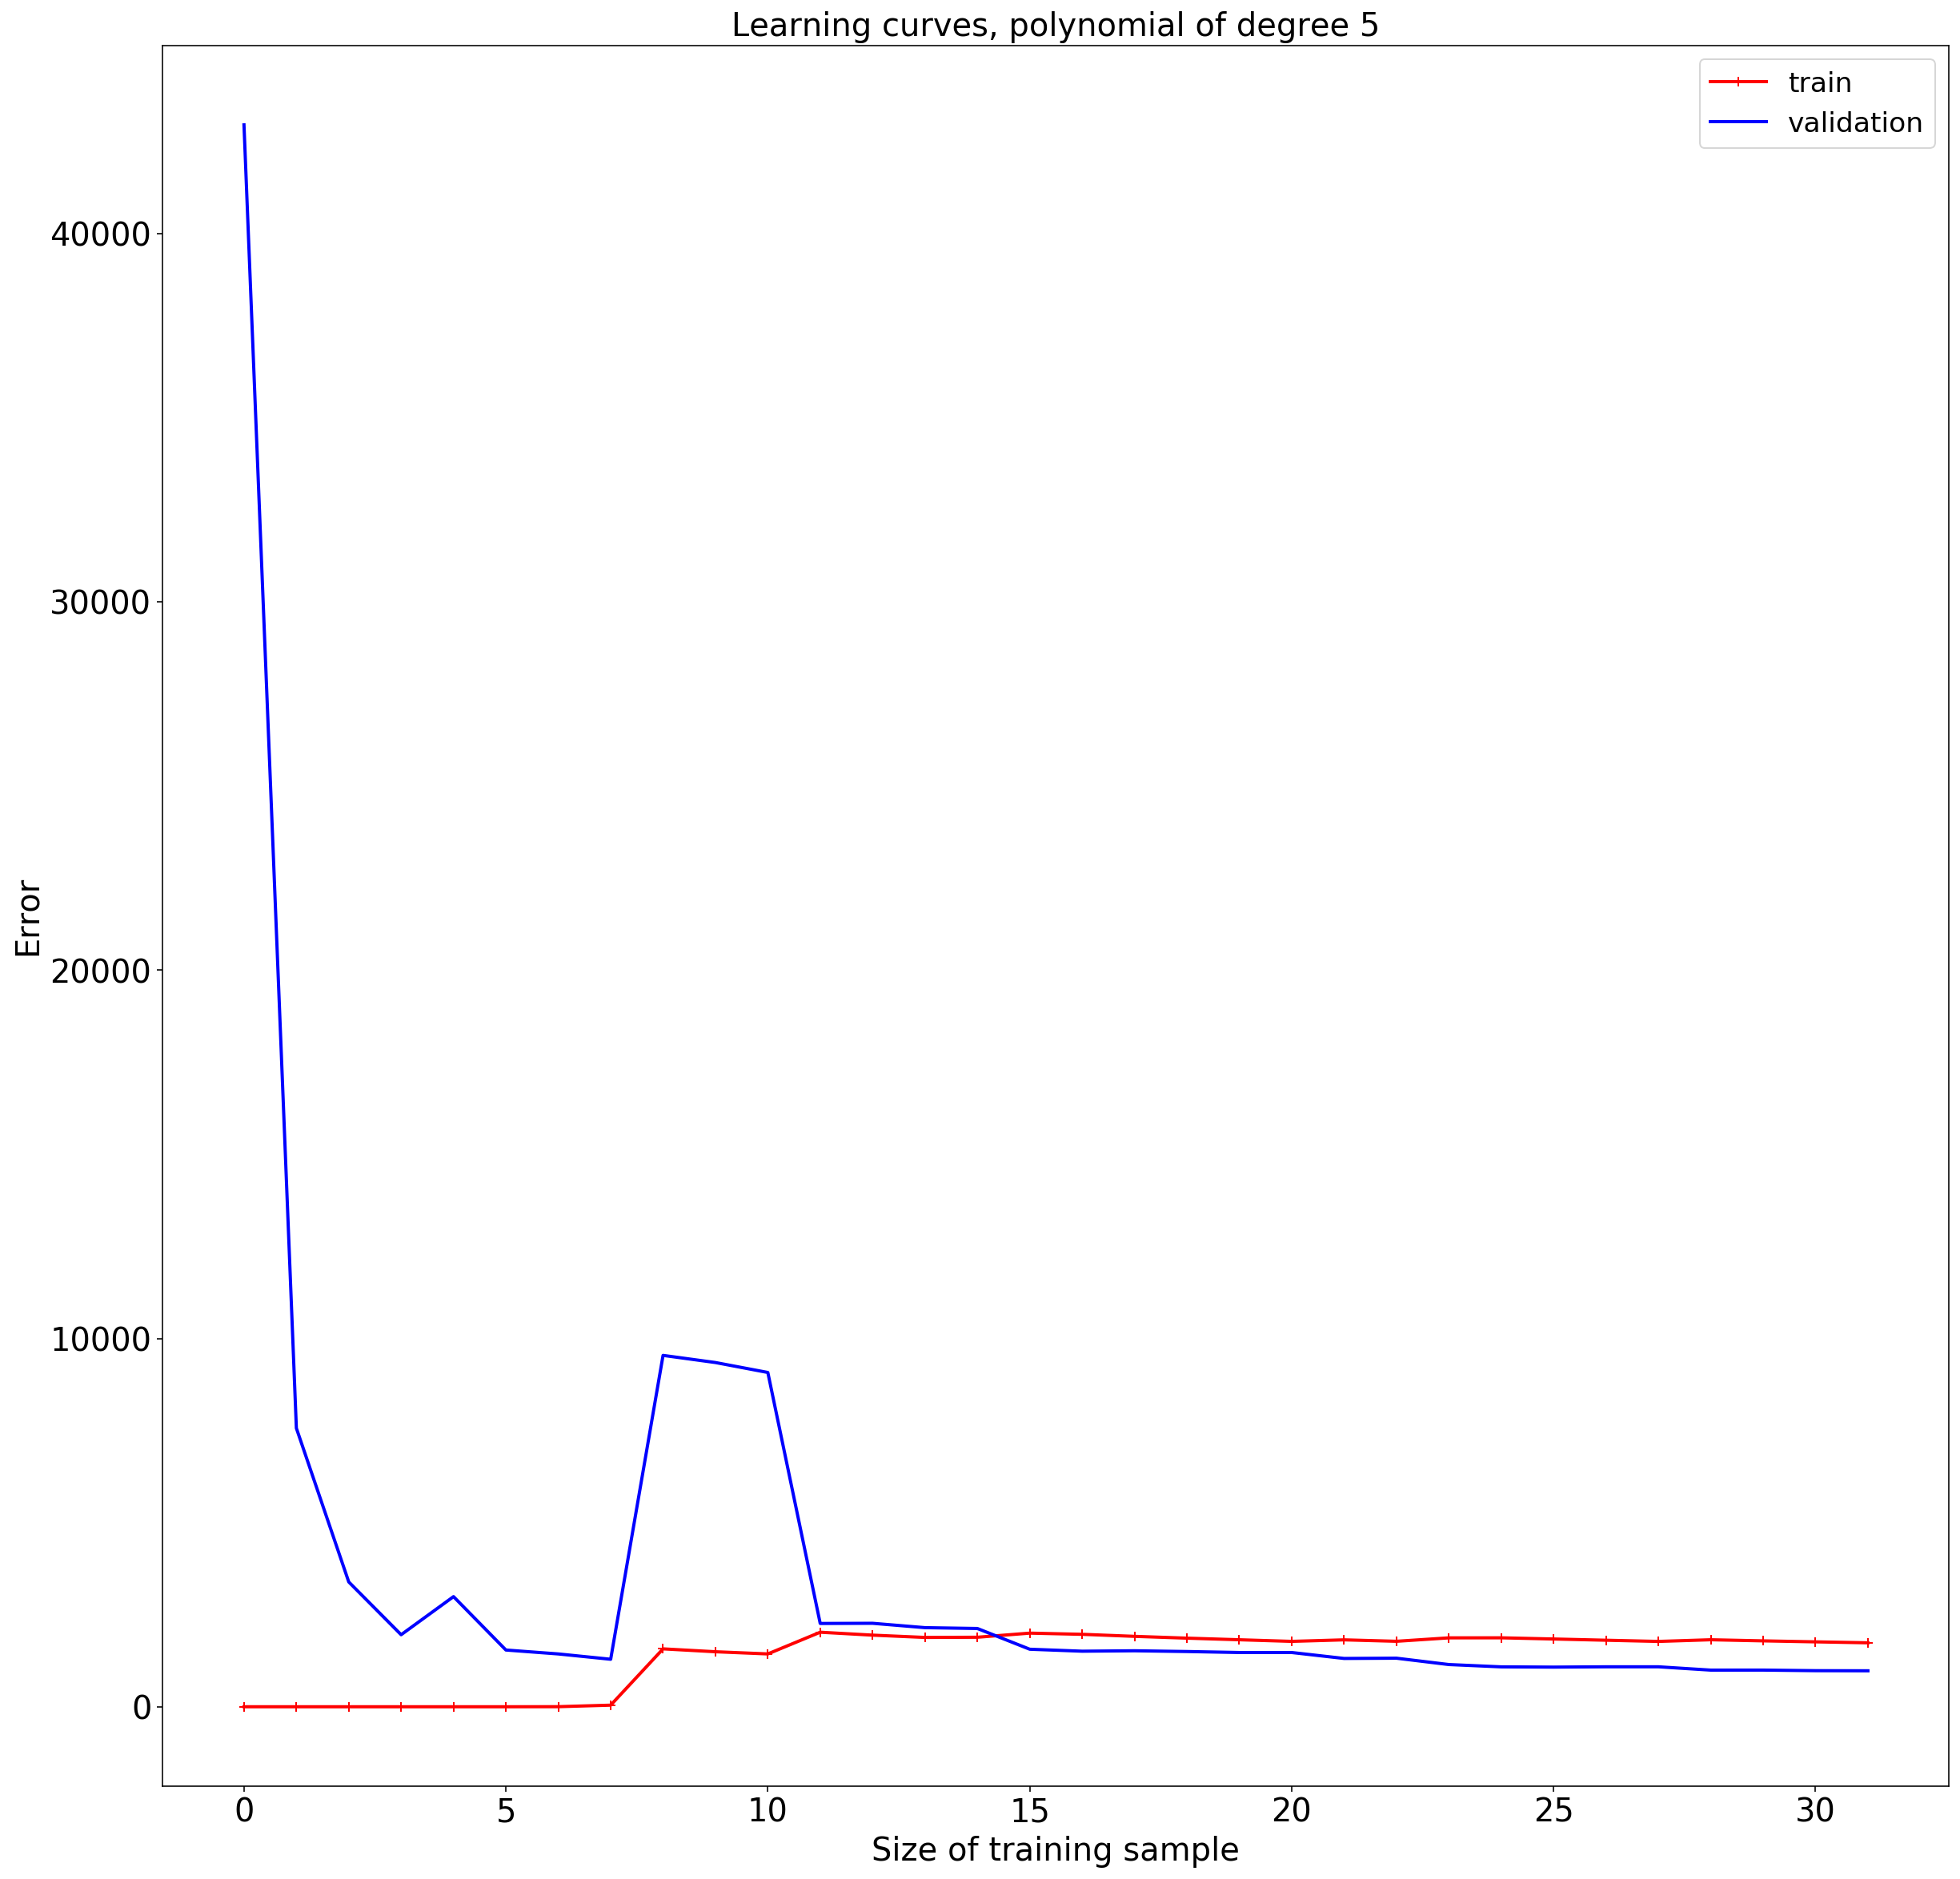

<Figure size 432x288 with 0 Axes>

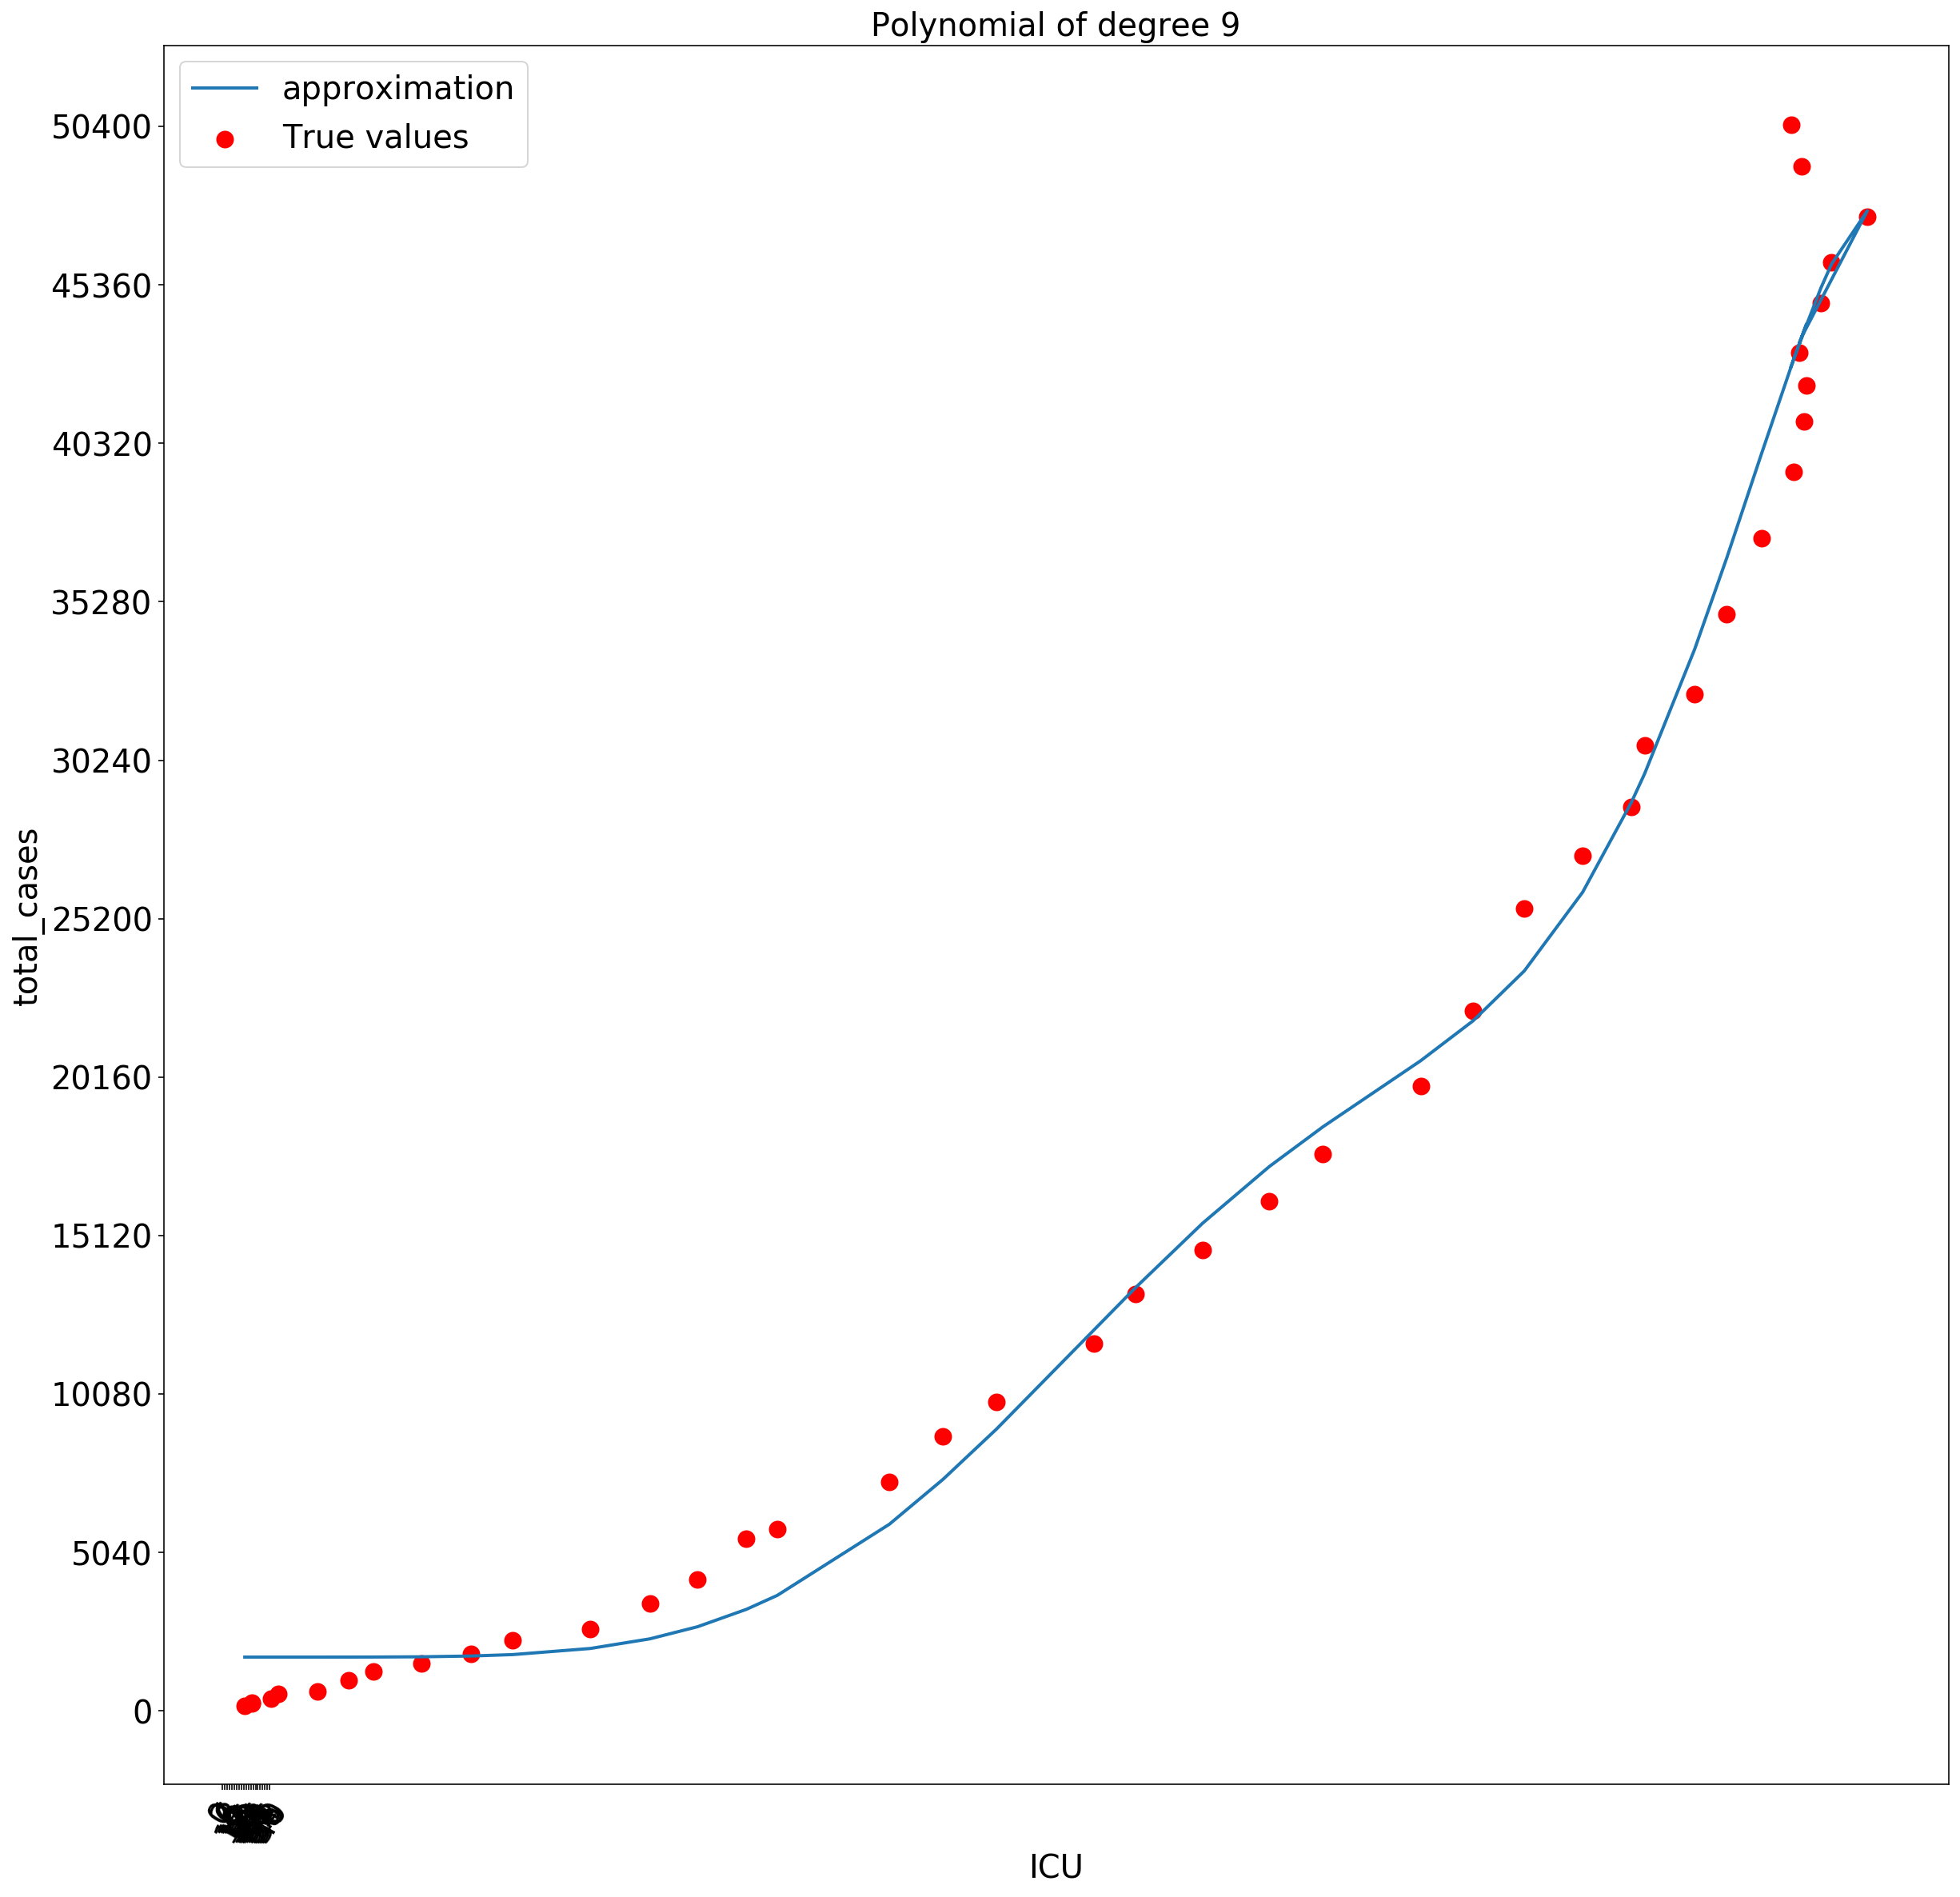

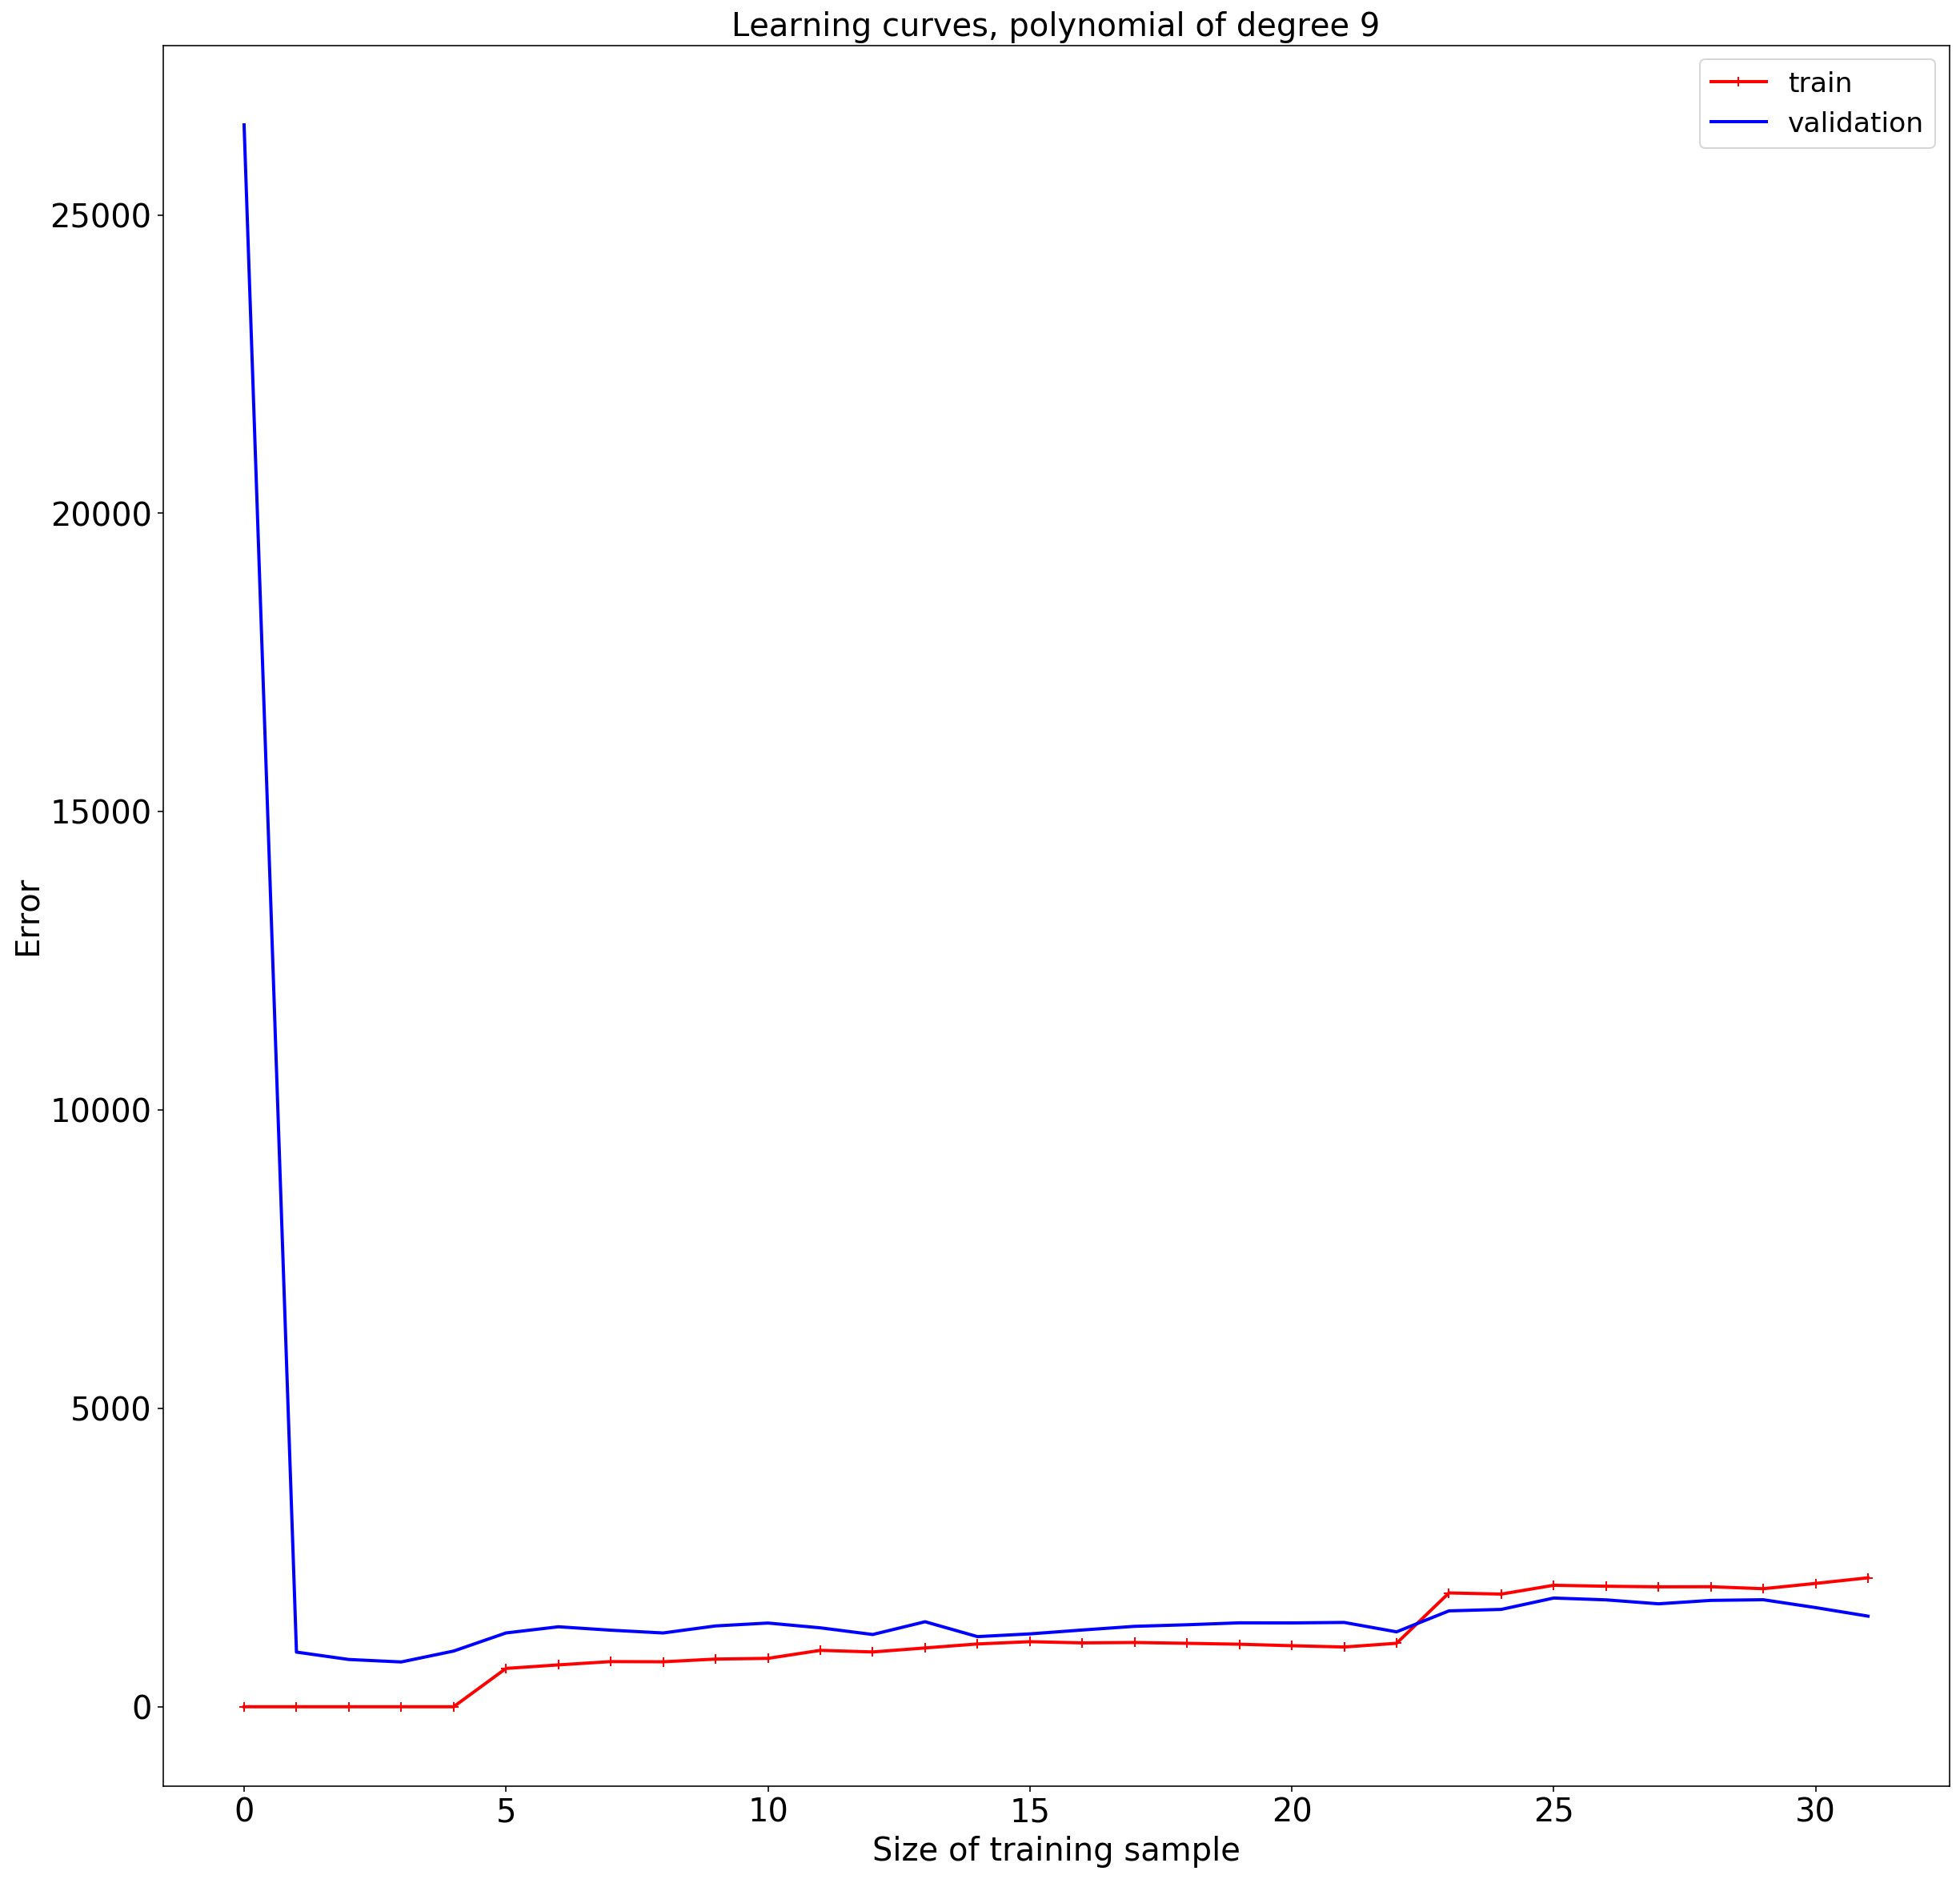

In [163]:
#Non-prone to errors version: X and y are returned by plot_approx
#New feature: explicitly says which is the best degree

#Ho anche disattivato il fatto che dicesse gli errori, ma son gusti
#Quasi quasi plotterei solo quello col degree migliore

#Dobbiamo scegliere l'esempio da tenere


def find_best_poly(df, feat_X, feat_y,verbose=False): 
    train_err_list=[]
    val_err_list=[]
    for i in range(1,10):
        pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
        if i==1 or i==5 or i==9:
            plt.figure()
            X,y=plot_approx(df,feat_X,feat_y,degree=i,  size=(20,20))
            plt.title(f'Polynomial of degree {i}', size=20)
            tr,val = plot_learning_curves(pol_reg,X,y, size=(20,20),verbose=False)
            plt.title(f'Learning curves, polynomial of degree {i}', size=20)
        else:
            X,y=plot_approx(df,feat_X,feat_y,degree=i,  size=(20,20),plot=False)
            tr, val = plot_learning_curves(pol_reg,X,y, size=(20,20), plot=False,verbose=False)
        train_err_list.append(tr)
        val_err_list.append(val)
    
    min_train=min(train_err_list)
    min_val=min(val_err_list)
    if verbose:
        print('The least training error is: ',min_train, " and was obtained with a polymonial of degree", train_err_list.index(min_train))
        print('The least validation error is: ',min_val, " and was obtained with a polymonial of degree", val_err_list.index(min_val))
    return

def short_find_best_poly(df,feat_X,feat_y):
    train_err_list=[]
    val_err_list=[]
    for i in range(1,10):
        pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
        X,y=plot_approx(df,feat_X,feat_y,degree=i,  size=(20,20),plot=False)
        tr, val = plot_learning_curves(pol_reg,X,y, size=(20,20), plot=False,verbose=False)
        train_err_list.append(tr)
        val_err_list.append(val)
    min_train=min(train_err_list)
    min_val=min(val_err_list)
    return val_err_list.index(min_val)

find_best_poly(Lom,'ICU','total_cases')

the following is an attempt to plot the approximation versus reality graph of a some data

<Figure size 432x288 with 0 Axes>

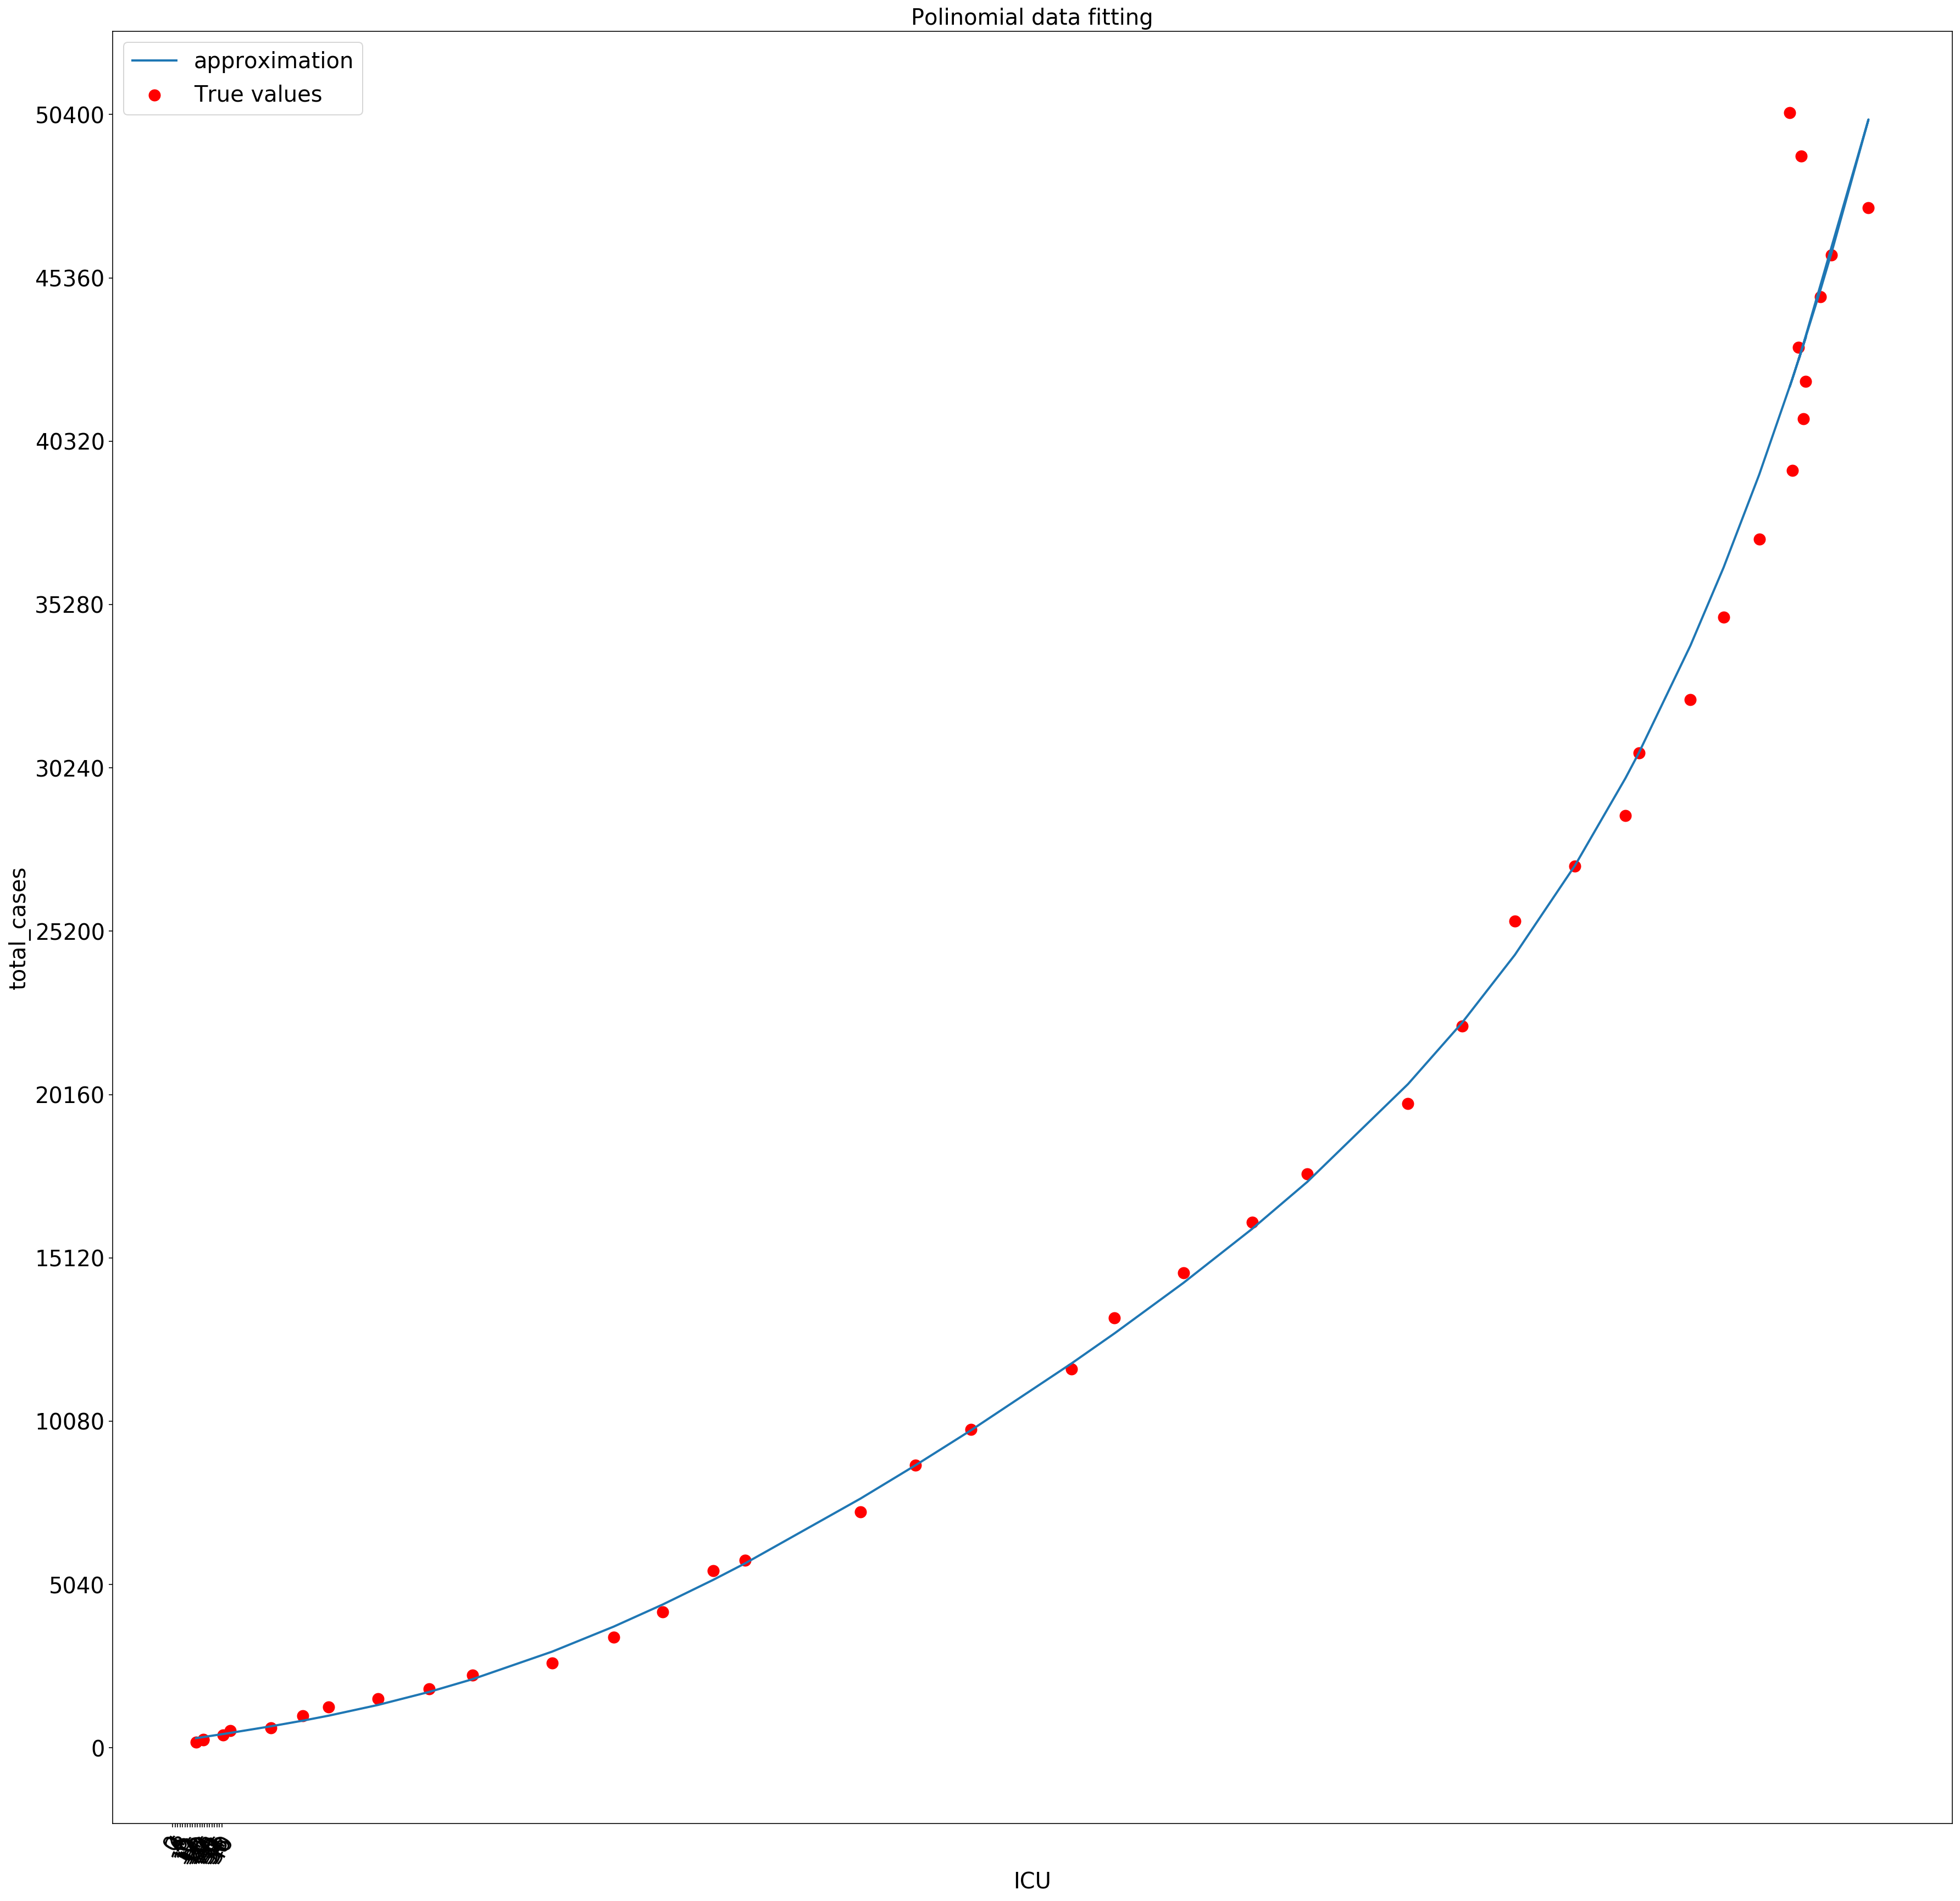

In [32]:
X,y=plot_approx(Lom,'ICU','total_cases',degree=5)

## Approximating total_positives al over the country

Function to smooth data as mean of the neighbors

In [33]:
def smooth(arr):
    a=np.array([0 for i in range(len(arr))])
    for i in range(len(a)):
        if i==0:
            a[i]=(arr[i]+arr[i+1])/2
        if i==len(arr)-1:
            a[i]=(arr[i]+arr[i-1])/2
        elif (i!=0 and i!=len(arr)-1):
            a[i]=(arr[i]+arr[i+1]+arr[i-1])/3
    return a

attempt to minimize with a logistic function (to clean and write formula)

In [241]:
#Ancora una volta, ho sdoppiato e provato con la Lombardia e i nuovi casi ma scarsi risultati
from scipy.optimize import curve_fit
import warnings
lom=get_region('Lombardia')
def logistic(x,L,k,x0,d):
    return L/(d+np.exp(-k*(x-x0)))

X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['new_positive'].to_numpy()[i] for i in range(len(country['new_positive']))],dtype=float)
y=smooth(yr)
init_vals=[max(y),np.median(x),1,np.min(x)]
y_err=np.ones(len(y))
m=np.argmax(yr)
y_err[m]=0.01

#y2=logisti
#init_vals2=[np.max(y),np.median(x),4]                                                      #try changng the power/y_err
best_vals,covar=curve_fit(logistic,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals)   #works better with no sigma
#best_vals,covar=curve_fit(gaussian,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals2)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in exp

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in true_divide



ValueError: operands could not be broadcast together with shapes (2646,) (42,) 

TypeError: logistic() missing 1 required positional argument: 'd'

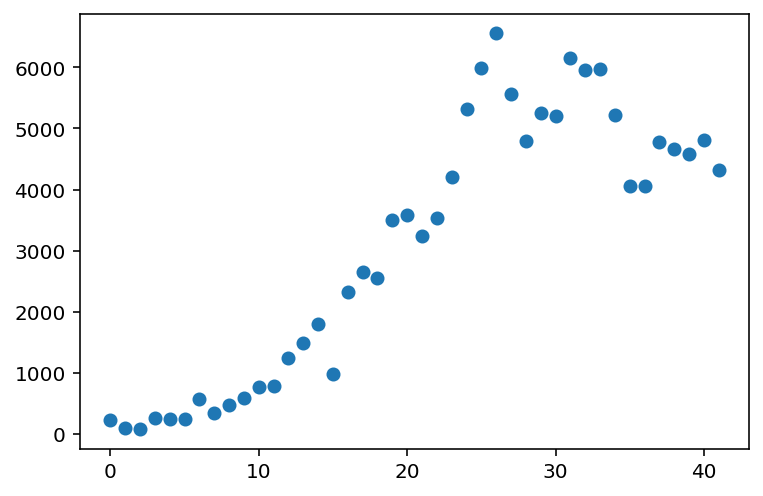

In [245]:
plt.scatter(X,yr)
plt.plot(X,logistic(X,*best_vals))

attempt to optimize trough a gompertz function which follows the distribution: 

$$f(x)=ae^{-be^{-cx}}$$

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


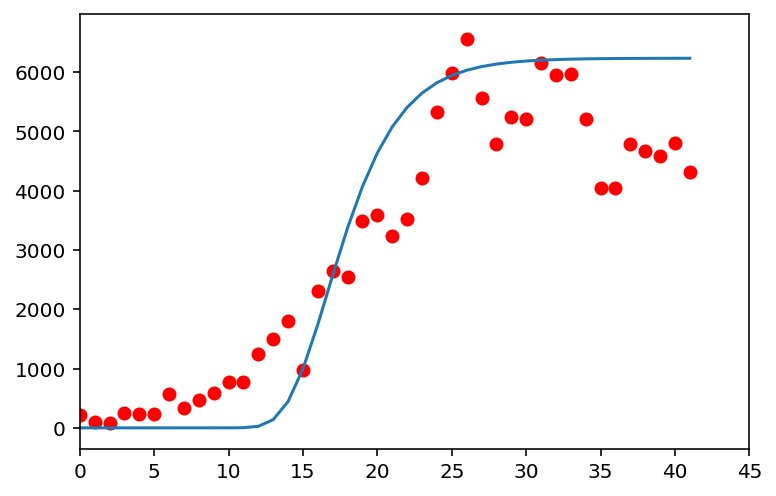

In [36]:
from scipy.optimize import curve_fit
import warnings
#####done with lombardy and its daily increment
#Lom=get_region('Lombardia',regions)
#####DONE WITH COUNTRY DATA
def gompertz(x,a,b,c):
    return a*np.exp(-b*np.exp(-c*x))
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['new_positive'].to_numpy()[i] for i in range(len(country['new_positive']))],dtype=float)
y=smooth(yr)
init_vals=[max(y),4,5]
y_err=np.ones(len(y))
m=np.argmax(yr)
y_err[m]=0.01
best_vals,covar=curve_fit(gompertz,xdata=X.flatten(),ydata=y.flatten(),p0=init_vals,sigma=y_err)  #try with 1/y 
                                                                                                #works better with y_err

plt.clf()
plt.plot(gompertz(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
#Il warning significa che si arriva ad un numero troppo grande
#Onestamente non so come migliorarlo
#ax.set_xlim([0,70])


This is the fit with a normal function

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


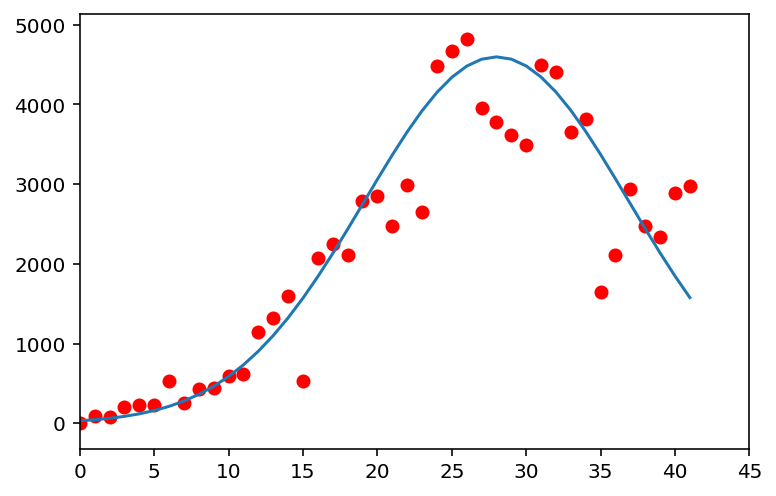

array([8.87908009e+00, 2.80118788e+01, 1.02314766e+05])

In [37]:
from scipy.optimize import curve_fit
import warnings
#####done with lombardy and its daily increment
Lom=get_region('Lombardia',regions)
def normal(x,sig,mi,h):
    a=(sig*np.sqrt(2*np.pi))**-1
    b=np.exp(-0.5*((x-mi)/sig)**2)
    return h*a*b
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['variation_total_positive'].to_numpy()[i] for i in range(len(country['variation_total_positive']))],dtype=float)
y=smooth(yr)   #try smooth and not smooth
init_vals=[np.var(y),40,7000]   #as the last changes there is not much effect
y_err=np.ones(len(y))*100   #setting the error of the maximum value of y smaller than all the others
m=np.argmax(yr)             #may try setting the error of more vaues as the maximum so that the higher
                            #the value the better the fit exploiting argsort and setting the same for more indices
y_err[m]=0.0001
best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=y.flatten(),p0=init_vals,sigma=y_err**0.3)
                            #sigma stores the errors, as an array, each point is related to its possible error
                            #works better with y_err**0.3
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
best_vals

In [38]:
np.argsort(y)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12, 14, 13, 15, 16,
       17, 36, 18, 37, 35, 39, 38, 19, 22, 20, 40, 21, 41, 34, 23, 29, 28,
       30, 24, 33, 31, 32, 27, 26, 25])

In [39]:
#Dobbiamo decidere se renderla interattiva. Se si, questa è la base di partenza
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
@interact
def show_cities_with_more_than(column=['total_cases', 'ICU'], x=(10, 1000)):
    return regions.loc[regions[column] > x]

day         region        lat       long  hospitalized_symptoms  ICU  \
93   02-28      Lombardia  45.466794   9.190347                    235   47   
114  02-29      Lombardia  45.466794   9.190347                    256   80   
135  03-01      Lombardia  45.466794   9.190347                    406  106   
156  03-02      Lombardia  45.466794   9.190347                    478  127   
177  03-03      Lombardia  45.466794   9.190347                    698  167   
..     ...            ...        ...        ...                    ...  ...   
877  04-05        Toscana  43.769231  11.255889                   1111  276   
878  04-05    P.A. Trento  46.068935  11.121231                    352   80   
879  04-05         Umbria  43.106758  12.388247                    159   45   
880  04-05  Valle d'Aosta  45.737503   7.320149                     96   23   
881  04-05         Veneto  45.434905  12.338452                   1674  329   

     total_hospitalized  home_isolation  total_positive  \
93                  282             192             474   
114                 336             216             552   
135                 512             375             887   
156                 605             472            1077   
177                 865             461            1326   
..                  ...             ...             ...   
877                1387            3798            5185   
878                 432            1363            1795   
879                 204             694             898   
880                 119             457             576   
881                2003            7406            9409   

     variation_total_positive  new_positive  recovered  deceased  total_cases  \
93                        125           128         40        17          531   
114                        78            84         40        23          615   
135                       335           369         73        24          984   
156                       190           270        139        38         1254   
177                       249           266        139        55         1520   
..                        ...           ...        ...       ...          ...   
877                       131           176        337       325         5847   
878                        42            65        273       217         2285   
879                       -29            29        298        43         1239   
880                        16            34        115        91          782   
881                       316           402       1186       631        11226   

      tests  
93     4835  
114    5723  
135    6879  
156    7925  
177    9577  
..      ...  
877   51006  
878   10476  
879   12448  
880    2390  
881  140910  

[379 rows x 15 columns]

In [40]:
#Questo in teoria permetterebbe di fare grafici interattivi ma nel mio pc non riesce a runnare
import cufflinks as cf
import chart_studio.plotly 
chart_studio.tools.set_credentials_file(username='simonegiancola09', api_key='IByMdM8xp6HDdYUdfCKo')
#from plotly.offline import iplot
df=regions
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    
    fig=df.iplot(asFigure=True, kind='scatter', x=x, y=y, mode='markers', xTitle=x.title(), yTitle=y.title())
    fig.show()

up next:


    1. problemi vari da risolvere
    2. a link I found for data fitting: https://lmfit.github.io/lmfit-py/model.html BLEAH
    3.generalizzazione/interattivizzazione
    4. interactive widgets https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
    5. check magic commands
    7. USE BINDER FOR SHARING
    8. check here https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
    10. Verificare consistency e decenza di tutti i plots
    11. Gli indici/i paragoni che riteniamo interessanti li abbiamo messi?
    12. Fare descrizioni testuali-spiegare che si tratta di un esercizio senza valenza statistica/epidemiologica
    13. Pubblicare. Poi, PDA sul nuovo database
    14. previsione lower bound della fine di tutti i malati (aka 0 casi assoluti)
    
    

## Approximating ICU patients

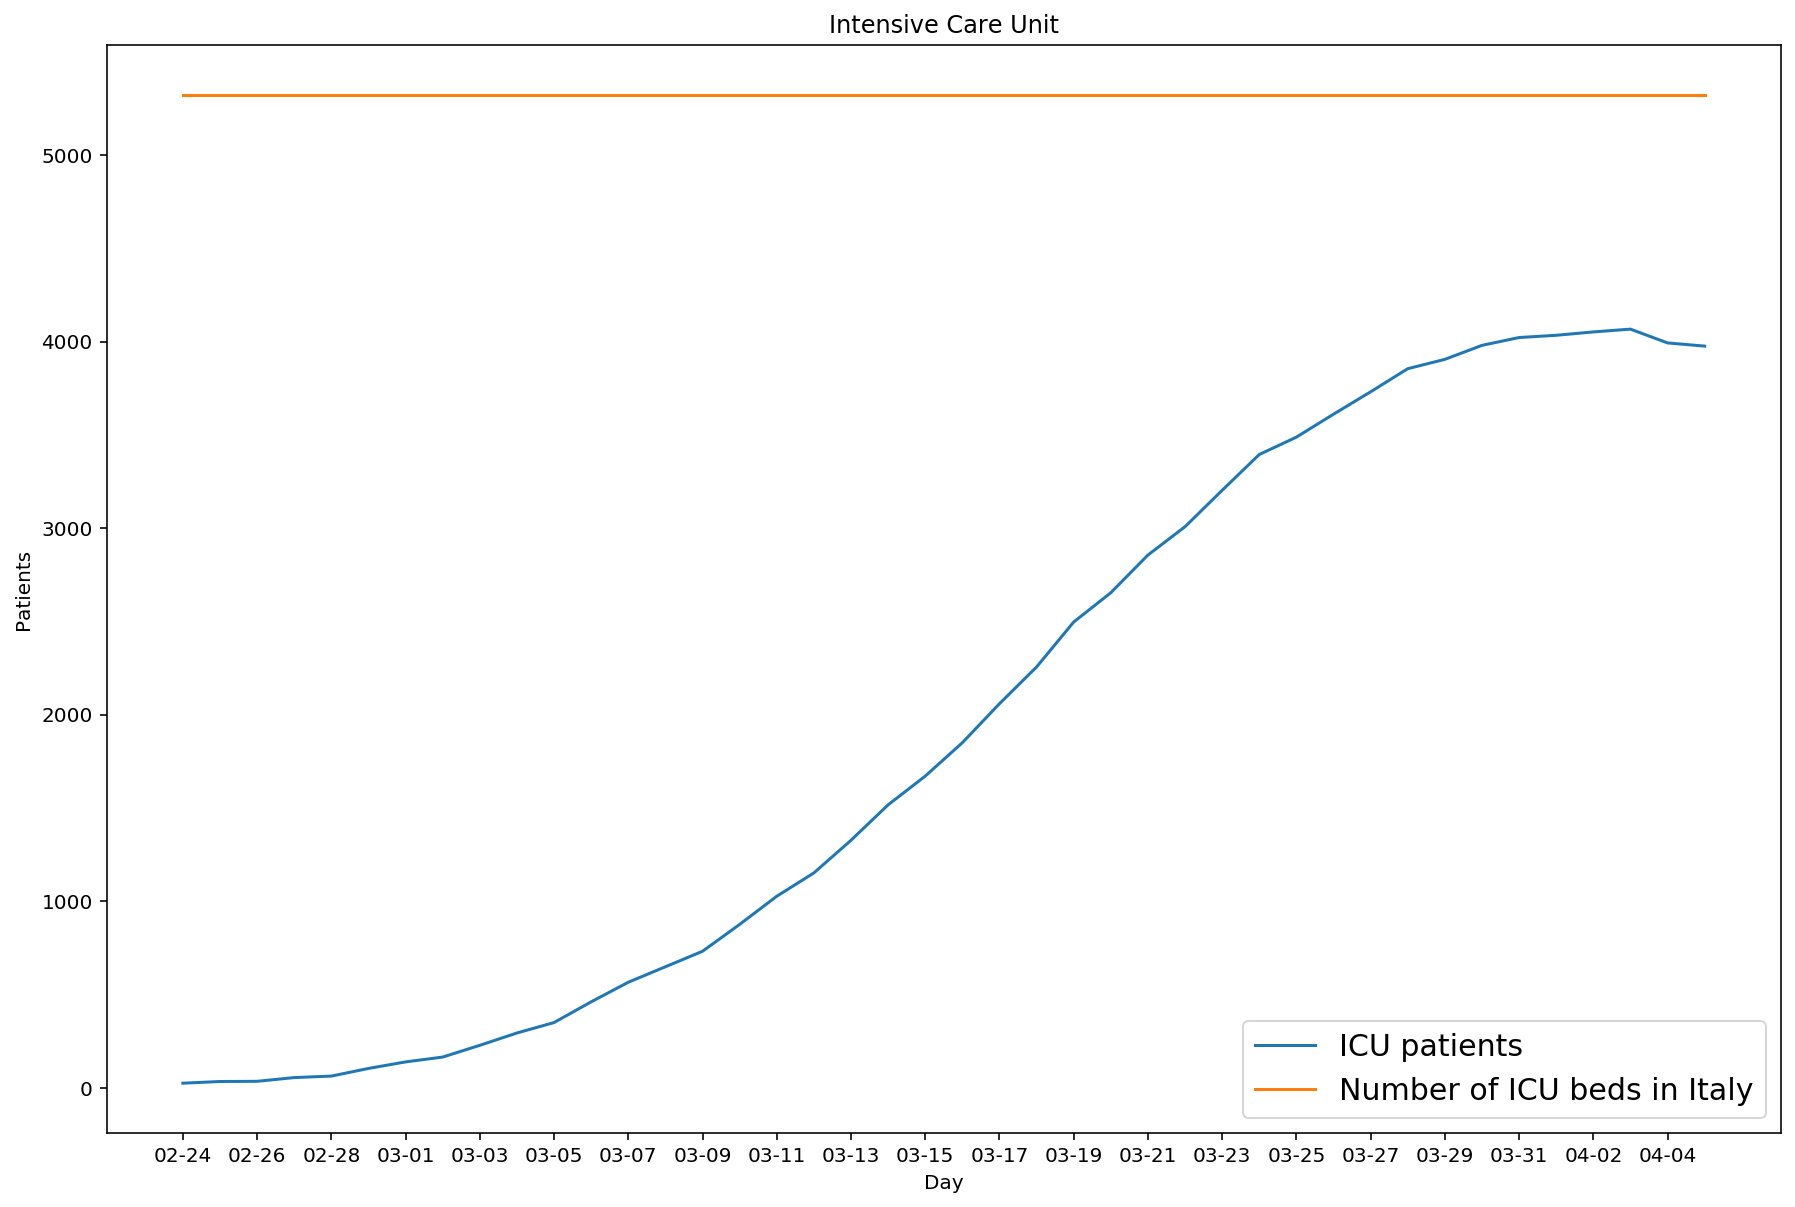

In [41]:
#Cella ripetuta ma forse qui sta meglio!
#5324 at the beginning of the epidemy
max_icu=[5324 for i in range(len(country))]
fig,ax1=plt.subplots(figsize=(15,10))
plt.title('Intensive Care Unit')
ax1.set_xlabel("Day")
ax1.set_ylabel("Patients")
ax1.set_xticks(np.arange(len(country))[::2])
ax1.plot(country["day"],country["ICU"], label="ICU patients")
ax1.plot(max_icu, label="Number of ICU beds in Italy")
ax1.legend(loc='lower right',fontsize=15)


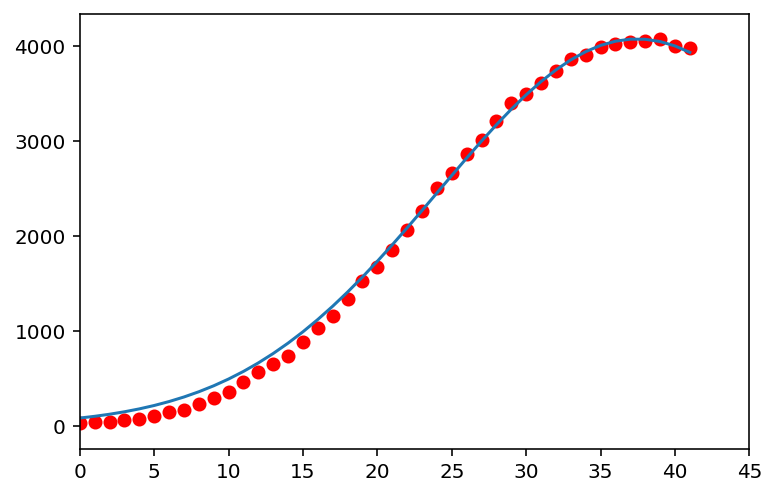

array([1.33391515e+01, 3.74495991e+01, 1.36124037e+05])

In [42]:
#ICU APPROXIMATION - NORMAL
#Both logistic and Gompertz do not decrease. Instead, let's try a Gaussian
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['ICU'].to_numpy()[i] for i in range(len(country['ICU']))],dtype=float)
#yr=smooth(yr)   #try smooth and not smooth
init_vals=[np.var(yr),np.mean(yr),700]   #as the last changes there is not much effect
best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=yr.flatten(),p0=init_vals,sigma=1/yr.flatten())
                            #sigma stores the errors, as an array, each point is related to its possible error
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   
plt.show()
best_vals

If we believe in the Gaussian approximation for the ICU patients, we would get to 0 ICU beds occupied in approximately
75 days from the day-0 (which is, for this analysis, 02-24), hence the 9th of May. 

74.89919815388554

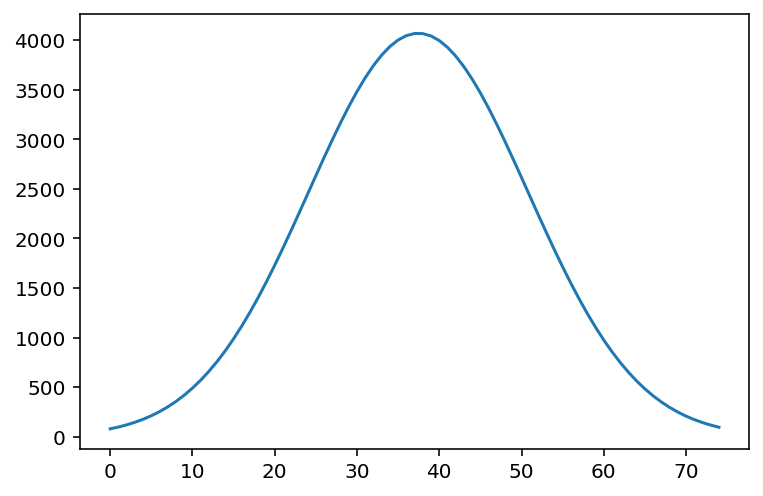

In [43]:
#Such value is two times the mean of the Gaussian approximation we found. 
X=np.arange(best_vals[1]*2)
plt.plot(X,normal(X,best_vals[0],best_vals[1],best_vals[2]))
best_vals[1]*2

## Recovered and deceased analysis

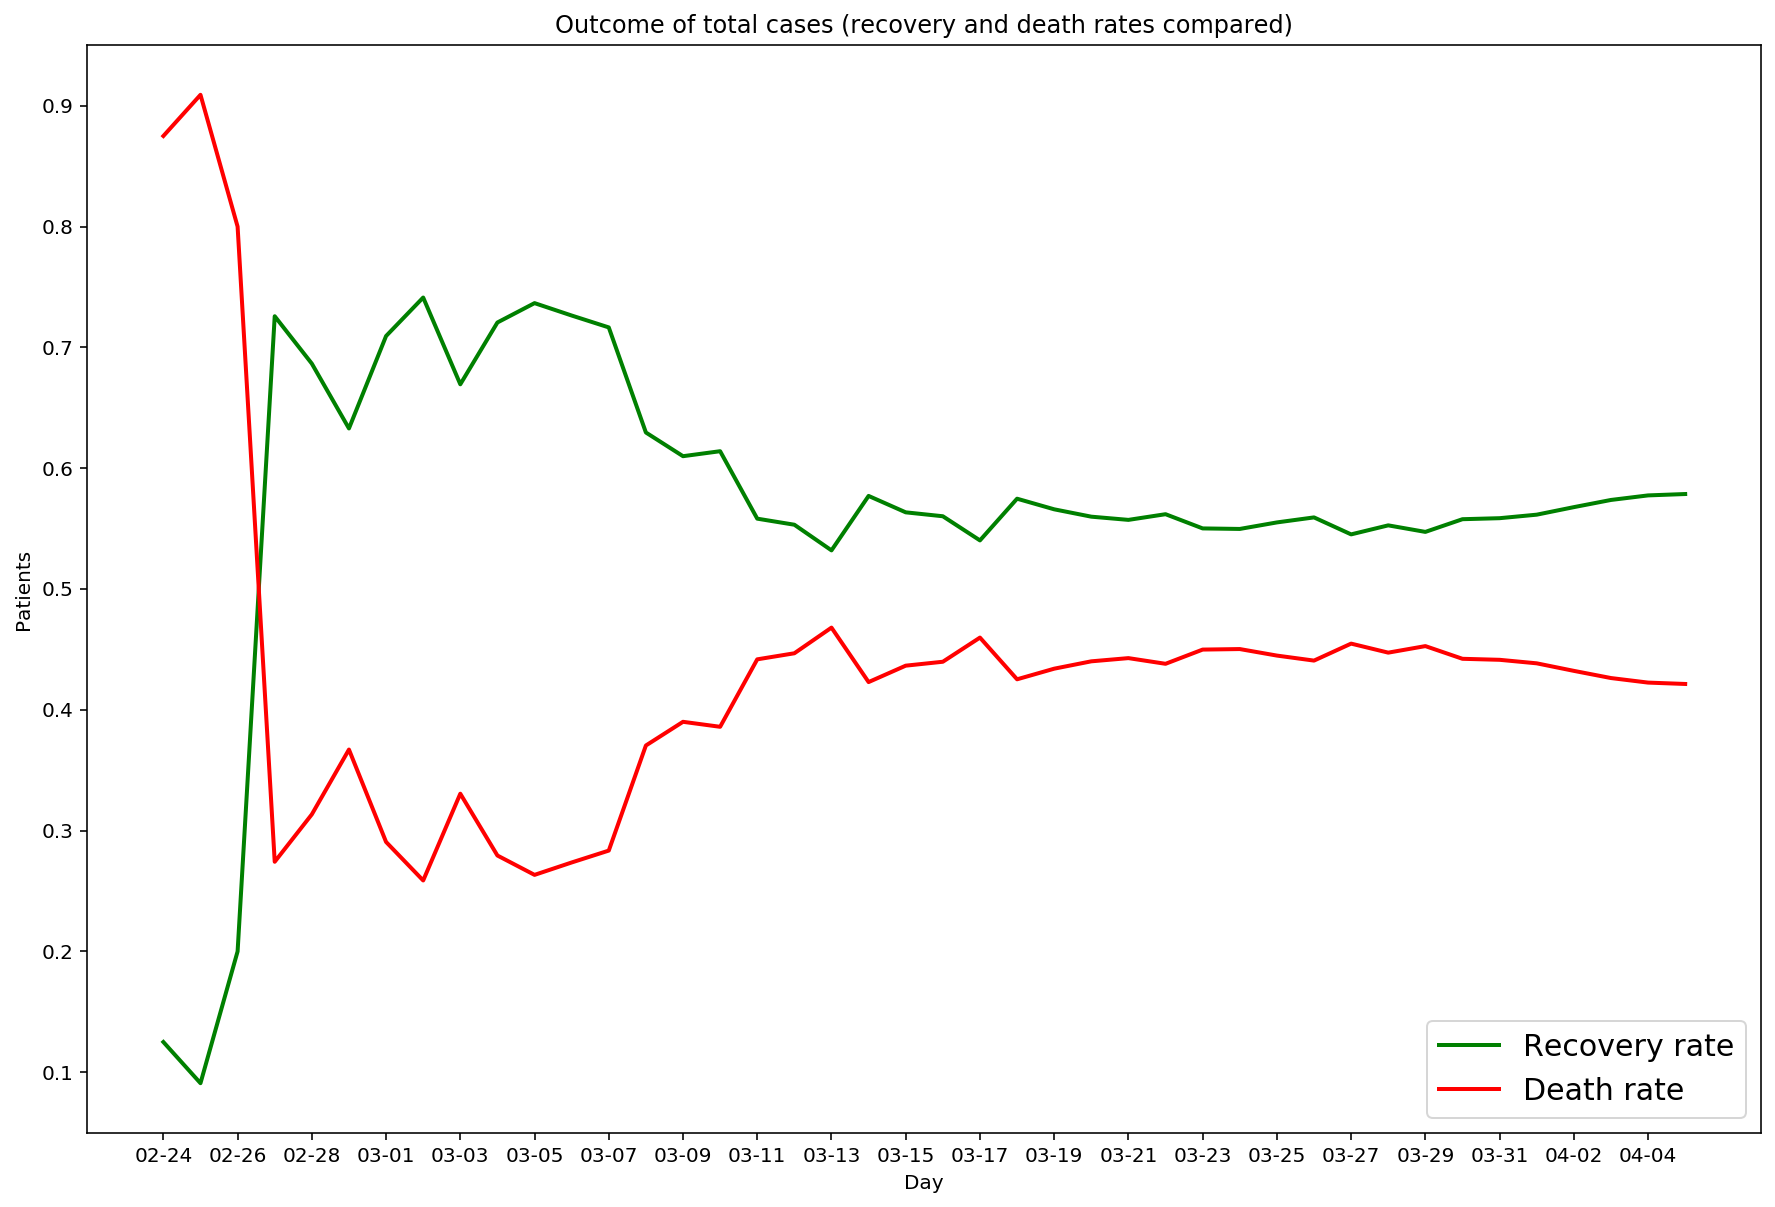

In [44]:
exited=country["deceased"]+country["recovered"]

fig,ax1=plt.subplots(figsize=(15,10))
plt.title('Outcome of total cases (recovery and death rates compared)')
ax1.set_xlabel("Day")
ax1.set_ylabel("Patients")
ax1.set_xticks(np.arange(len(country))[::2])
ax1.plot(country["day"],country["recovered"]/exited, label="Recovery rate", c="green", linewidth=2)
ax1.plot(country["day"],country["deceased"]/exited, label="Death rate", c="r", linewidth=2)
ax1.legend(loc='lower right',fontsize=15)

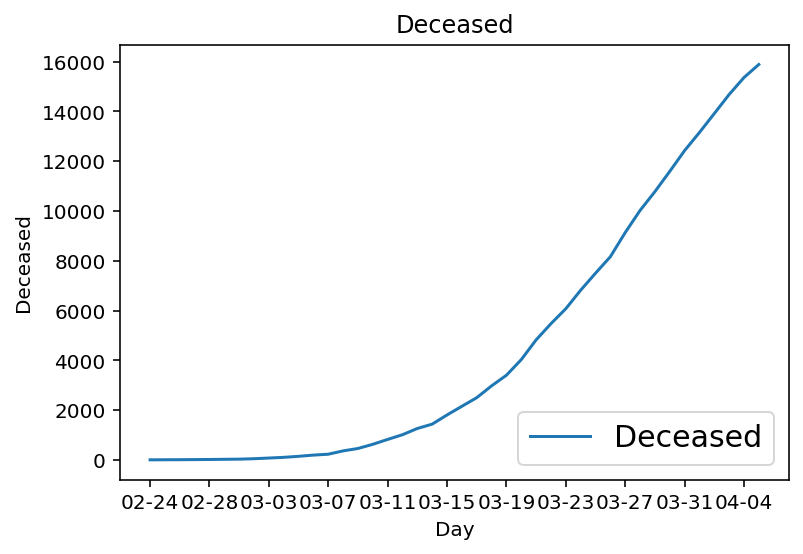

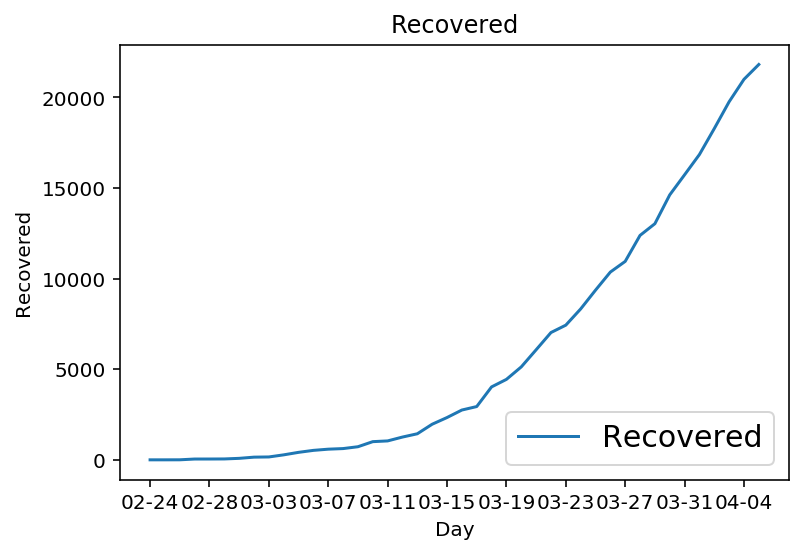

In [45]:
#Firstly, let's plot the deceased and recovered trends to try to guess which function best fit the data
fig,ax1=plt.subplots()
plt.title('Deceased')
ax1.set_xlabel("Day")
ax1.set_ylabel("Deceased")
ax1.set_xticks(np.arange(len(country))[::4])
ax1.plot(country["day"],country["deceased"], label="Deceased")
ax1.legend(loc='lower right',fontsize=15)

fig,ax2=plt.subplots()
plt.title('Recovered')
ax2.set_xlabel("Day")
ax2.set_ylabel("Recovered")
ax2.set_xticks(np.arange(len(country))[::4])
ax2.plot(country["day"],country["recovered"], label="Recovered")
ax2.legend(loc='lower right',fontsize=15)


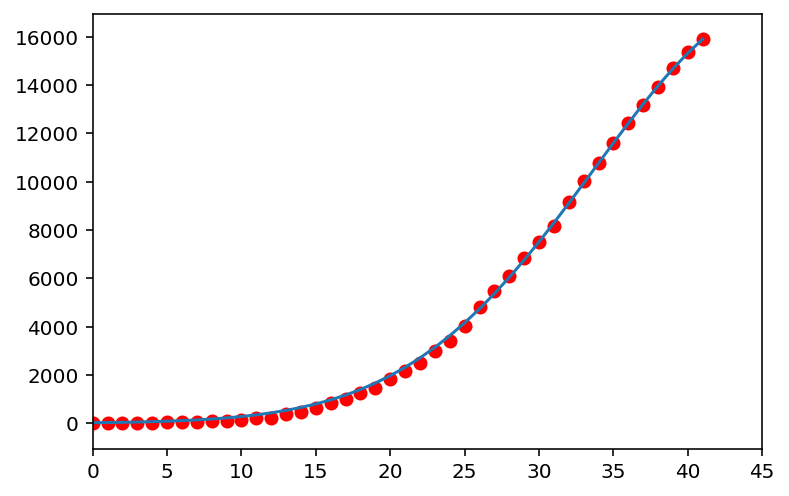

array([1.26345750e+01, 4.63874881e+01, 5.51299467e+05])

In [46]:
#We choose the normal because...

#DECEASED APPROXIMATION - NORMAL
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['deceased'].to_numpy()[i] for i in range(len(country['deceased']))],dtype=float)
#By inspection, some good initial values are the variance and the mean of a smoothed version of the 
#variation of total cases
y_init=np.array([country['variation_total_positive'].to_numpy()[i] for i in range(len(country['variation_total_positive']))],dtype=float)
y_init=smooth(y_init)
init_vals=[np.var(y_init),np.mean(y_init),700]
best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=yr.flatten(),p0=init_vals,sigma=1/yr.flatten())
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   
plt.show()
best_vals

92.77497614801982

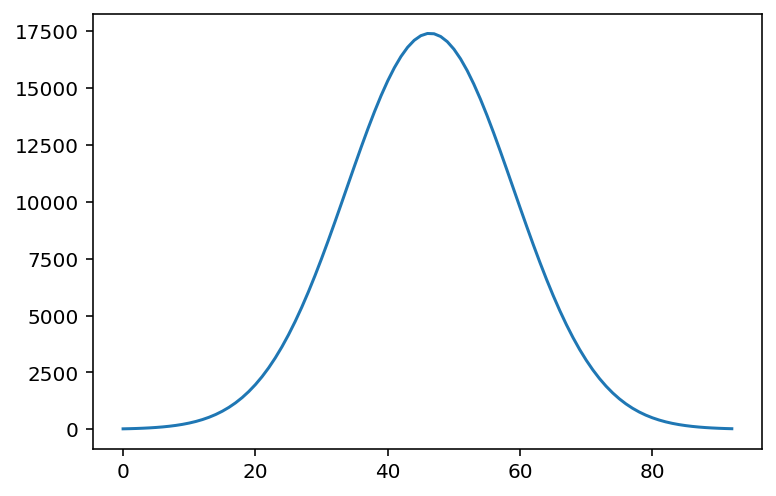

In [47]:
#If we believe in the Gaussian approximation for the deceased, we would get to 0 deaths in approximately
#93 days from the day-0 (which is, for this analysis, 02-24), hence the 27th of May. 
#(We know that the deaths are not going to get to zero but it gives a grasp on when they are going to
#decrease significantly)
#Such value is two times the mean of the Gaussian approximation we found. 

X=np.arange(best_vals[1]*2)
plt.plot(X,normal(X,best_vals[0],best_vals[1],best_vals[2]))
best_vals[1]*2

<Figure size 432x288 with 0 Axes>

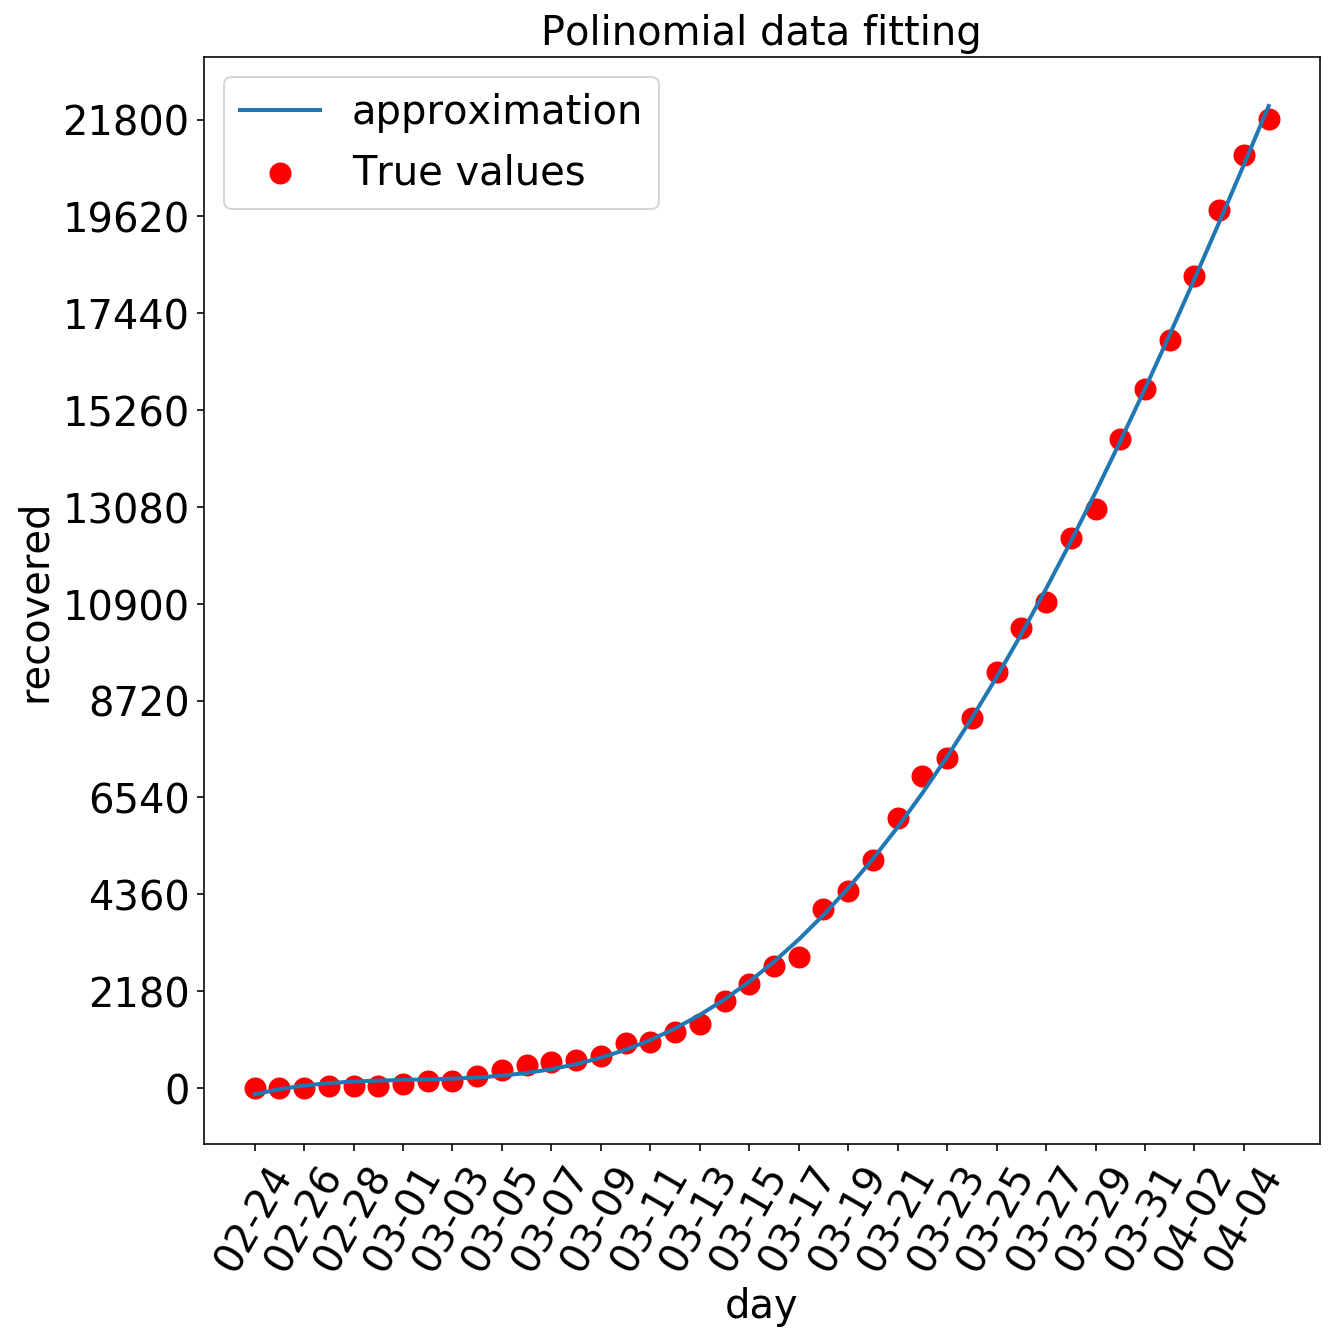

In [48]:
#Since we're optimistic, we approximate the recovered as a polynomial. By inspection, a fourth degree
#is fitting quite well the data.

X,y=plot_approx(country,"day","recovered",degree=4,  size=(10,10),plot=True)

## Es Simo - questa roba la puoi usare o cancellare

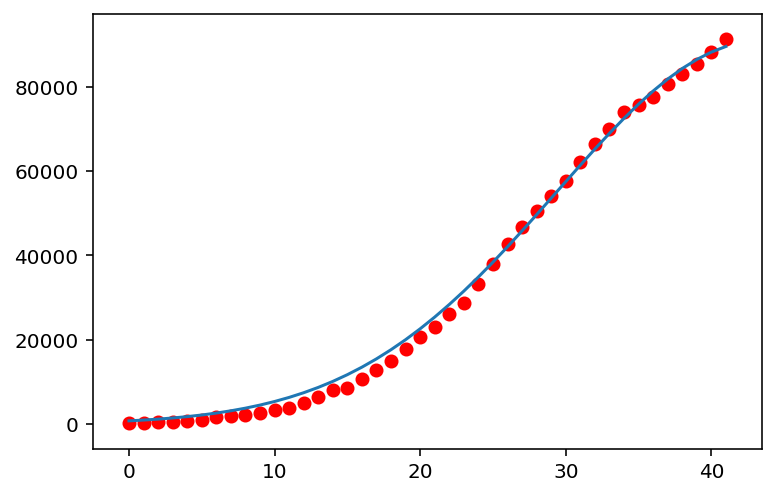

array([1.40589425e+01, 4.34592082e+01, 3.20315787e+06])

In [49]:
#APPROSSIMAZIONE DEI TOTALI ATTUALMENTE POSITIVI


X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['total_positive'].to_numpy()[i] for i in range(len(country['total_positive']))],dtype=float)
#y=smooth(yr)   #try smooth and not smooth
init_vals=[np.std(yr),10,7000]   #as the last changes there is not much effect

best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=yr.flatten(),p0=init_vals,sigma=1/yr.flatten())
                            #sigma stores the errors, as an array, each point is related to its possible error
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
best_vals

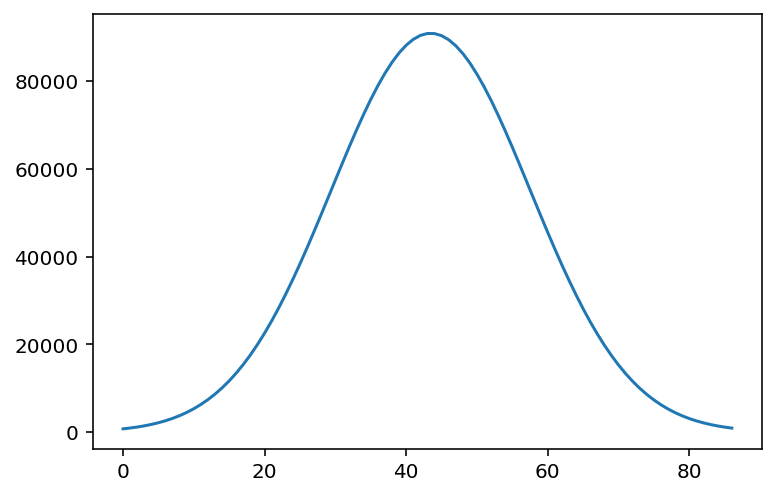

In [50]:
X=np.arange(best_vals[1]*2)
tot_pos_estimated=normal(X,best_vals[0],best_vals[1],best_vals[2])
plt.plot(X,tot_pos_estimated)

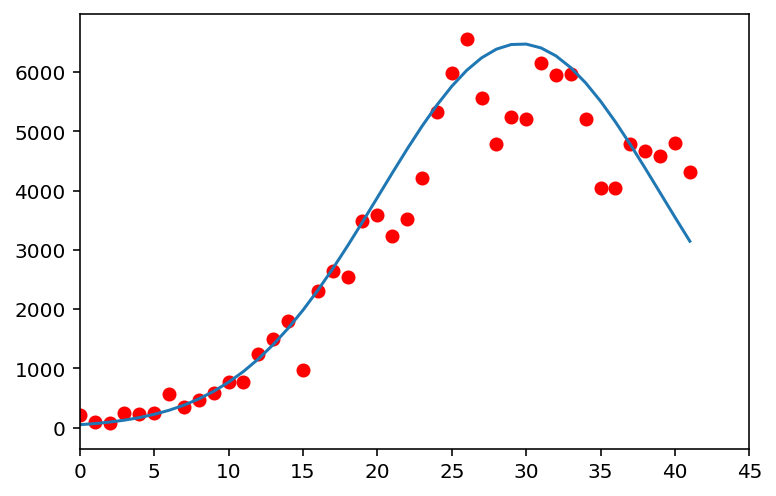

array([9.48687448e+00, 2.95976725e+01, 1.54127042e+05])

In [51]:
#5% di loro muoiono

#2972 attualmente variazione

#APPRORXIMATION NEW POSITIVES


from scipy.optimize import curve_fit
import warnings
#####done with lombardy and its daily increment
def normal(x,sig,mi,h):
    a=(sig*np.sqrt(2*np.pi))**-1
    b=np.exp(-0.5*((x-mi)/sig)**2)
    return h*a*b
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['new_positive'].to_numpy()[i] for i in range(len(country['new_positive']))],dtype=float)
y=smooth(yr)   #try smooth and not smooth
init_vals=[np.var(y),40,7000]   #as the last changes there is not much effect
y_err=np.ones(len(y))*100   #setting the error of the maximum value of y smaller than all the others
m=np.argmax(yr)             #may try setting the error of more values as the maximum so that the higher
                            #the value the better the fit exploiting argsort and setting the same for more indices
y_err[m]=0.0001
best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=y.flatten(),p0=init_vals,sigma=y_err**0.3)
                            #sigma stores the errors, as an array, each point is related to its possible error
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
best_vals


In [112]:
def get_normal_app(df,asc,ords,sigma_power=1,plot=False,sm=True,init_vals=None):
    if asc=='day':
        X=np.arange(len(df[asc]),dtype=float)
    yr=np.array([df[ords].to_numpy()[i] for i in range(len(df[ords]))],dtype=float)
    if sm:
        yr=smooth(yr)
    best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=yr.flatten(),
                              p0=init_vals,sigma=1/yr.flatten()**sigma_power)
    if plot:
        plt.clf()
        plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
        plt.xlim([0,45])
        plt.scatter(X,yr, color="red")
        plt.show()
    return best_vals

def get_logistic_app(df,asc,ords,sigma_power=1,plot=False,sm=True,init_vals=None):
    if asc=='day':
        X=np.arange(len(df[asc]),dtype=float)    
    yr=np.array([df[ords].to_numpy()[i] for i in range(len(df[ords]))],dtype=float)
    if sm:
        yr=smooth(yr)
    best_vals,covar=curve_fit(logistic,xdata=X.flatten(),ydata=yr.flatten(),
                              p0=init_vals,sigma=1/yr.flatten()**sigma_power)
    if plot:
        plt.clf()
        plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
        plt.xlim([0,45])
        plt.scatter(X,yr, color="red")
        plt.show()
    return best_vals
def get_gompertz_app(df,asc,ords,sigma_power=1,plot=False,sm=True,init_vals=None):
    if asc=='day':
        X=np.arange(len(df[asc]),dtype=float)    
    yr=np.array([df[ords].to_numpy()[i] for i in range(len(df[ords]))],dtype=float)
    if sm:
        yr=smooth(yr)
    best_vals,covar=curve_fit(gompertz,xdata=X.flatten(),ydata=yr.flatten(),
                              p0=init_vals,sigma=1/yr.flatten()**sigma_power)
    if plot:
        plt.clf()
        plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
        plt.xlim([0,45])
        plt.scatter(X,yr, color="red")
        plt.show()
    return best_vals


        

    
    

In [335]:
from datetime import timedelta
from datetime import date
def count_end(df,decease_rate=None):
    start=date.fromisoformat('2020-02-24')
    tod=date.today()
    day=date.today()
    #the starting input for the functions
    x=len(df['day']) 
    tot=df['total_positive'].iloc[-1]
    #deceased approx
    dec=compute_increase(df,'deceased')
    dec_param=get_normal_app(dec,'day','increase')
    #recovery approx
    rec=compute_increase(df,'recovered')
    #deg_rec=short_find_best_poly(rec,'day','increase')
    print(deg_rec)
    p=PolynomialFeatures(degree=3,include_bias=False)
    X=np.arange(len(rec['increase'])).reshape(-1,1)
    X_pol=p.fit_transform(X)
    lr=LinearRegression()
    lr.fit(X,rec['increase'])
    #variation_total_positive approx as a normal
    pos_param=get_normal_app(df,'day','new_positive')
    a=True
    b=True
    while tot>0:
        day+=timedelta(days=1)
        x+=1
        new_pos=np.floor(normal(x,*pos_param))
        #new_rec=np.ceil(lr.predict(p.fit_transform(np.array([x]).reshape(-1,1))))
        new_rec=np.ceil(lr.predict(np.array([x]).reshape(-1,1)))

        new_dec=np.floor(normal(x,*dec_param))
        if new_pos==0 and a:
            a=False
            print('the number of new positive cases becomes zero at the following day',day)
            print('which is exactly', (day-tod).days,' days from now')
        if new_dec==0 and b:
            b=False
            print('Deaths become approximately zero at the following day',day)
            print('which is exactly', (day-tod).days,' days from now')
        tot+=new_pos-new_rec-new_dec
    print('The number of positive cases will become 0 at the following day:', day)
    print('which is exactly', (day-tod).days,' days from now')
    
    print('our approximations:')
    fig,axs=plt.subplots(3,figsize=(10,10))
    axs[0].plot(normal(np.arange(x),*dec_param))
    axs[0].scatter(x=np.arange(len(dec['increase'])),y=dec['increase'])
    axs[0].set_title('Deceased approximation')
    axs[1].plot(normal(np.arange(x),*pos_param))
    axs[1].scatter(x=np.arange(len(df['new_positive'])),y=df['new_positive'])
    axs[1].set_title('new positive approximation')
    axs[2].plot(lr.predict((np.arange(x)).reshape(-1,1)))
    axs[2].scatter(x=np.arange(len(rec['increase'])),y=rec['increase'])
    axs[2].set_title('recovered approximation')

    
        
        
    return 

5
Deaths become approximately zero at the following day 2020-05-05
which is exactly 29  days from now
the number of new positive cases becomes zero at the following day 2020-05-13
which is exactly 37  days from now
The number of positive cases will become 0 at the following day: 2020-05-27
which is exactly 51  days from now
our approximations:


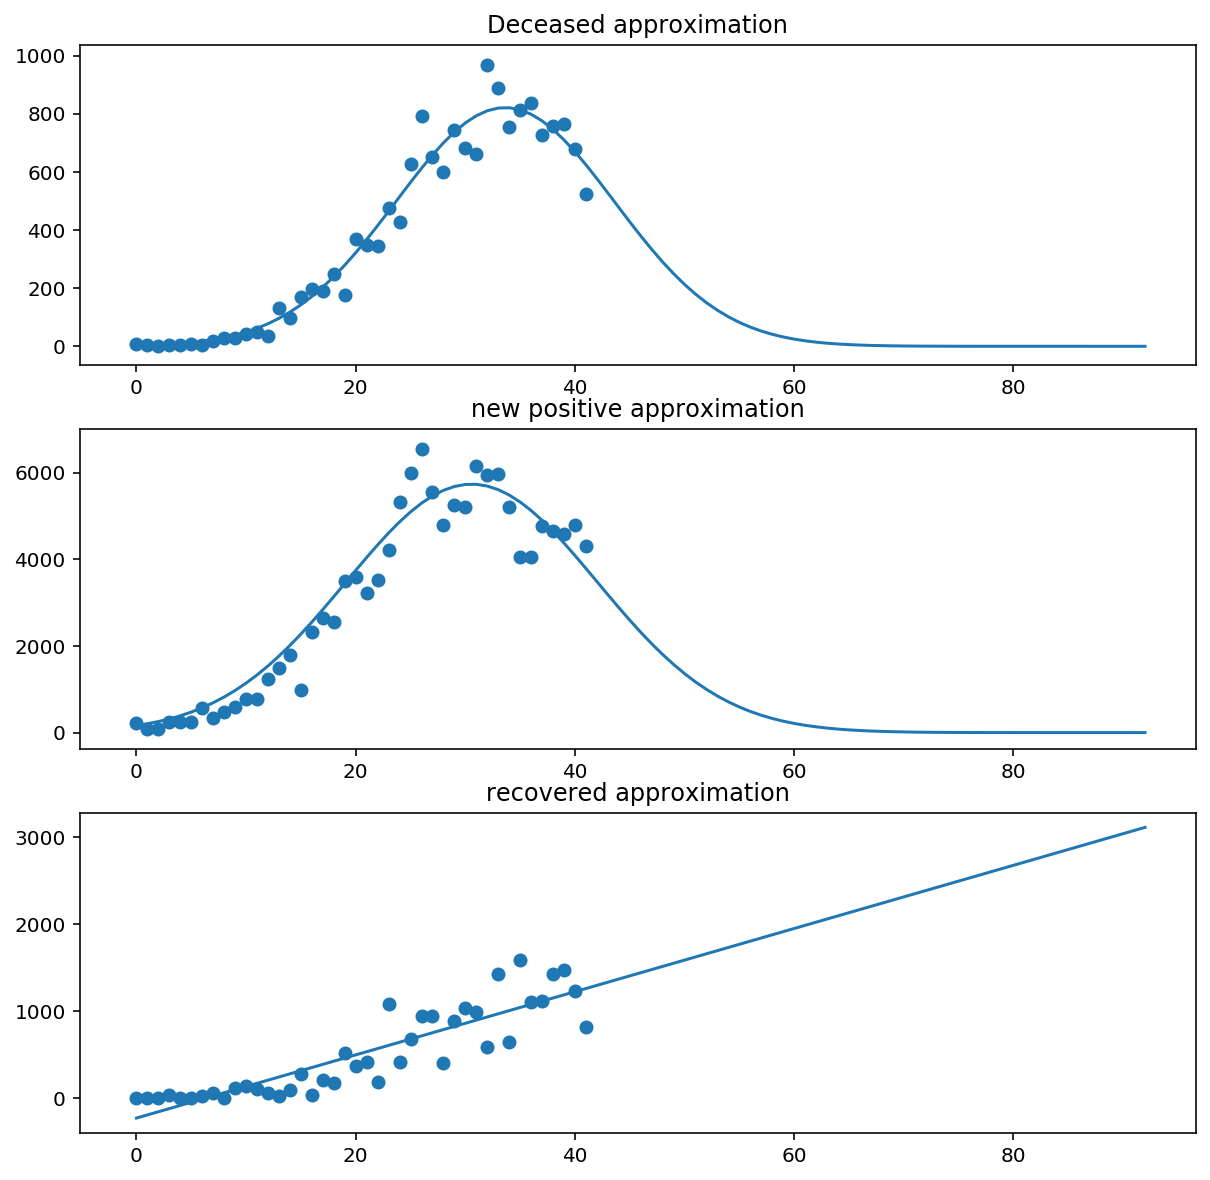

In [336]:
count_end(country)

In [322]:
axs[0].scatter(x,x)
plt.show()